In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"


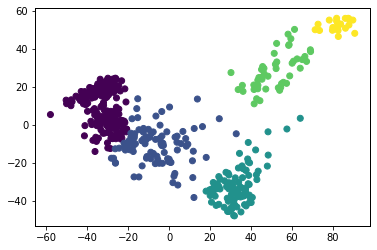

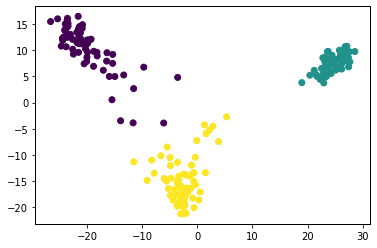

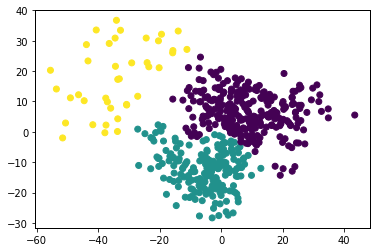

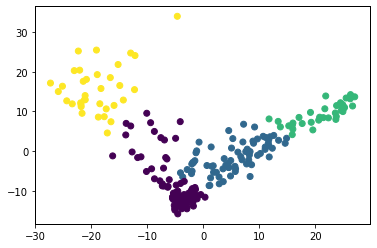

In [3]:
%run -i 'load_data.py'

In [4]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

In [5]:
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
import rpy2
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri as rpyn
from statsmodels.stats.multitest import multipletests
dt = rpy2.robjects.packages.importr('diptest')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

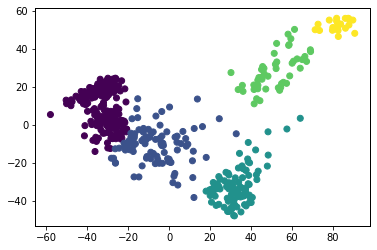

In [6]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=5)
ac_clusters = ac.fit_predict(chen_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(chen_pca.PC1, chen_pca.PC2, c=ac_clusters)
plt.show()

chen_pca_clust = chen_pca.copy()
chen_pca_clust['AC'] = ac_clusters

chen_clust_filter = []
for cluster in chen_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = chen_pca_clust.index[chen_pca_clust.AC == cluster]
    
    chen_filter = process_subpop(clust_subpop, chen_PSI, chen_mrna_counts, mrna_per_event_chen, 
                                 chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    chen_clust_filter.append(chen_filter)
    


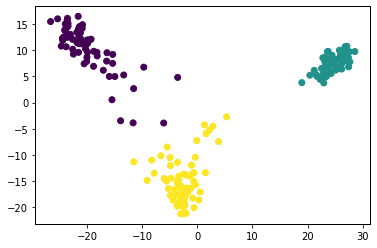

In [7]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac_clusters = ac.fit_predict(song_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(song_pca.PC1, song_pca.PC2, c=ac_clusters)
plt.show()

song_pca_clust = song_pca.copy()
song_pca_clust['AC'] = ac_clusters

song_clust_filter = []
for cluster in song_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = song_pca_clust.index[song_pca_clust.AC == cluster]
    
    song_filter = process_subpop(clust_subpop, song_PSI, song_mrna_counts, mrna_per_event_song, 
                                 song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    song_clust_filter.append(song_filter)
    
    


In [8]:
song_iPSC_filtered = process_subpop(song_iPSC, song_PSI, song_mrna_counts, 
                                    mrna_per_event_song, song_read_counts, 
                                       song_coverage_tab['SJ_coverage'], 0.1, 10)
song_NPC_filtered = process_subpop(song_NPC, song_PSI, song_mrna_counts, 
                                  mrna_per_event_song, song_read_counts, 
                                       song_coverage_tab['SJ_coverage'], 0.1, 10)

song_MN_filtered = process_subpop(song_MN, song_PSI, song_mrna_counts, 
                                  mrna_per_event_song, song_read_counts, 
                                       song_coverage_tab['SJ_coverage'], 0.1, 10)



In [9]:
lescroart_E6_filtered = process_subpop(lescroart_E6, lescroart_PSI, lescroart_mrna_counts, 
                                    mrna_per_event_lescroart, lescroart_read_counts, 
                                       lescroart_coverage_tab['SJ_coverage'], 0.1, 10)
lescroart_E7_filtered = process_subpop(lescroart_E7, lescroart_PSI, lescroart_mrna_counts, 
                                  mrna_per_event_lescroart, lescroart_read_counts, 
                                       lescroart_coverage_tab['SJ_coverage'], 0.1, 10)



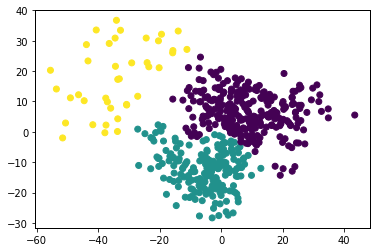

In [10]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac_clusters = ac.fit_predict(lescroart_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(lescroart_pca.PC1, lescroart_pca.PC2, c=ac_clusters)
plt.show()

lescroart_pca_clust = lescroart_pca.copy()
lescroart_pca_clust['AC'] = ac_clusters

lescroart_clust_filter = []
for cluster in range(3):
    clust_subpop = lescroart_pca_clust.index[lescroart_pca_clust.AC == cluster]
    
    lescroart_filter = process_subpop(clust_subpop, lescroart_PSI, lescroart_mrna_counts, mrna_per_event_lescroart, 
                                 lescroart_read_counts, lescroart_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    lescroart_clust_filter.append(lescroart_filter)
    
  

In [11]:
trapnell_M00_filtered = process_subpop(trapnell_M00, trapnell_PSI, trapnell_mrna_counts, 
                                    mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)
trapnell_M24_filtered = process_subpop(trapnell_M24, trapnell_PSI, trapnell_mrna_counts, 
                                  mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)
trapnell_M48_filtered = process_subpop(trapnell_M48, trapnell_PSI, trapnell_mrna_counts, 
                                    mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)
trapnell_M72_filtered = process_subpop(trapnell_M72, trapnell_PSI, trapnell_mrna_counts, 
                                  mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)


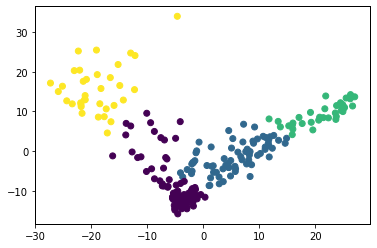

In [12]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4)
ac_clusters = ac.fit_predict(trapnell_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(trapnell_pca.PC1, trapnell_pca.PC2, c=ac_clusters)
plt.show()

trapnell_pca_clust = trapnell_pca.copy()
trapnell_pca_clust['AC'] = ac_clusters

trapnell_clust_filter = []
for cluster in trapnell_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = trapnell_pca_clust.index[trapnell_pca_clust.AC == cluster]
    
    trapnell_filter = process_subpop(clust_subpop, trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
                                 trapnell_read_counts, trapnell_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    trapnell_clust_filter.append(trapnell_filter)
    
    


In [13]:
song_modalities = pd.read_csv('../../../data/song/song_event_modalities.tab', sep='\t', index_col = 0)

In [14]:
print((song_modalities.iPSC == 'bimodal').sum())
print((len(song_modalities) - (song_modalities.iPSC == '-').sum()))
print((song_modalities.iPSC == 'bimodal').sum() / (len(song_modalities) - (song_modalities.iPSC == '-').sum()))

2835
8895
0.31871838111298484


In [15]:
print((song_modalities.NPC == 'bimodal').sum())
print((len(song_modalities) - (song_modalities.NPC == '-').sum()))
print((song_modalities.NPC == 'bimodal').sum() / (len(song_modalities) - (song_modalities.NPC == '-').sum()))

1981
6539
0.3029515216393944


In [16]:
print((song_modalities.MN == 'bimodal').sum())
print((len(song_modalities) - (song_modalities.MN == '-').sum()))
print((song_modalities.MN == 'bimodal').sum() / (len(song_modalities) - (song_modalities.MN == '-').sum()))

1131
4156
0.27213666987487967


In [17]:
song_outrigger = pd.read_csv('song_outrigger_psi.tab', index_col = 0)

In [18]:
outrigger_iPSC = [x for x in list(song_outrigger.index) if x[0] == 'P']
outrigger_NPC = [x for x in list(song_outrigger.index) if ((x[0] == 'C') or (x[0] == 'N'))]
outrigger_MN = [x for x in list(song_outrigger.index) if x[0] == 'M']

In [19]:
print(song_iPSC_filtered[0].shape)
print(song_NPC_filtered[0].shape)
print(song_MN_filtered[0].shape)

(102, 62)
(49, 70)
(47, 70)


In [20]:
song_iPSC_filtered[0].mean(axis=1).min()

0.10145187285206692

In [21]:
song_iPSC_filtered[0].shape

(102, 62)

In [22]:
song_PSI.loc[song_iPSC_filtered[0].index, song_iPSC_filtered[0].columns].mean(axis=1).max()

0.8996632229622492

In [23]:
assert np.all([x in song_iPSC_unfiltered.index for x in song_iPSC_filtered[0].index])
assert np.all([x in song_NPC_unfiltered.index for x in song_NPC_filtered[0].index])
assert np.all([x in song_MN_unfiltered.index for x in song_MN_filtered[0].index])

NameError: name 'song_iPSC_unfiltered' is not defined

In [25]:
suma_iPSC = 0
suma_iPSC_unfiltered = 0
suma_iPSC_filtered_all = 0
suma_iPSC_filtered = 0
suma_iPSC_outrigger = 0
suma_iPSC_outrigger_total = 0

for evento in song_iPSC_unfiltered.index:
        
    q25_unfiltered = song_iPSC_unfiltered.loc[evento].quantile(0.25)
    q75_unfiltered = song_iPSC_unfiltered.loc[evento].quantile(0.75)
    if (q25_unfiltered <= 0.25) and (q75_unfiltered >= 0.75):
        suma_iPSC_unfiltered += 1
        
    if evento in song_iPSC_filtered[0].index:
        
        q25_filtered_all = song_PSI.loc[evento, song_iPSC].quantile(0.25)
        q75_filtered_all = song_PSI.loc[evento, song_iPSC].quantile(0.75)        
        if (q25_filtered_all <= 0.25) and (q75_filtered_all >= 0.75):
            suma_iPSC_filtered_all += 1
            
        q25_filtered = song_iPSC_filtered[0].loc[evento].quantile(0.25)
        q75_filtered = song_iPSC_filtered[0].loc[evento].quantile(0.75)
        if (q25_filtered <= 0.25) and (q75_filtered >= 0.75):
            suma_iPSC_filtered += 1
       
    if evento in song_modalities.index:
        suma_iPSC_outrigger_total += 1
        outrigger_event = song_modalities.loc[evento, 'song_annotation']
        
        q25_outrigger = song_outrigger.loc[outrigger_iPSC, outrigger_event].quantile(0.25)
        q75_outrigger = song_outrigger.loc[outrigger_iPSC, outrigger_event].quantile(0.75)
        
        if (q25_outrigger <= 0.25) and (q75_outrigger >= 0.75):
            suma_iPSC_outrigger += 1
            

NameError: name 'song_iPSC_unfiltered' is not defined

In [26]:
from scipy.stats import hypergeom
def hyper_test(M, n, N, k):
    
    hpd = hypergeom(M, n, N)
    p_depleted = hpd.cdf(k)
    p_enriched = hpd.sf(k-1)
    
    return p_depleted, p_enriched

In [27]:
def get_proportions(PSI_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, psi_int = 0.1, mrna_min = 10,
                   outrigger_tab = '', outrigger_modalities = '', outrigger_subpop = ''):
    
    PSI_filtered = process_subpop(subpop, PSI_tab, mrna_counts, 
                                    mrna_per_event, read_counts, coverage_tab['SJ_coverage'], psi_int, mrna_min)
    
    PSI_observed = (PSI_tab[subpop].isna().mean(axis = 1) <= 0.5)
    PSI_int = (np.abs(0.5-PSI_tab[subpop].mean(axis = 1)) <= (0.5-psi_int))
    PSI_unfiltered = PSI_tab.loc[(PSI_observed & PSI_int), subpop]
    
    assert np.all([x in PSI_unfiltered.index for x in PSI_filtered[0].index])
    
    suma = len(PSI_unfiltered.index)
    suma_f = len(PSI_filtered[0].index)
    suma_unfiltered = 0
    suma_filtered_all = 0
    suma_filtered = 0
    suma_outrigger = 0
    suma_outrigger_total = 0

    for evento in PSI_unfiltered.index:

        q25_unfiltered = PSI_unfiltered.loc[evento].quantile(0.25)
        q75_unfiltered = PSI_unfiltered.loc[evento].quantile(0.75)
        if (q25_unfiltered <= 0.25) and (q75_unfiltered >= 0.75):
            suma_unfiltered += 1

        if evento in PSI_filtered[0].index:

            q25_filtered_all = PSI_tab.loc[evento, subpop].quantile(0.25)
            q75_filtered_all = PSI_tab.loc[evento, subpop].quantile(0.75)        
            if (q25_filtered_all <= 0.25) and (q75_filtered_all >= 0.75):
                suma_filtered_all += 1

            q25_filtered = PSI_filtered[0].loc[evento].quantile(0.25)
            q75_filtered = PSI_filtered[0].loc[evento].quantile(0.75)
            if (q25_filtered <= 0.25) and (q75_filtered >= 0.75):
                suma_filtered += 1

        if len(outrigger_modalities) >= 1:
            if evento in outrigger_modalities.index:
                suma_outrigger_total += 1
                outrigger_event = outrigger_modalities.loc[evento, 'song_annotation']

                q25_outrigger = outrigger_tab.loc[outrigger_subpop, outrigger_event].quantile(0.25)
                q75_outrigger = outrigger_tab.loc[outrigger_subpop, outrigger_event].quantile(0.75)

                if (q25_outrigger <= 0.25) and (q75_outrigger >= 0.75):
                    suma_outrigger += 1


    p_deplete = hyper_test(suma, suma_unfiltered, suma_f, suma_filtered)[0]
                    
    
    return suma, suma_f, suma_unfiltered, suma_filtered_all, suma_filtered, suma_outrigger, suma_outrigger_total, p_deplete


In [28]:
get_proportions(song_PSI, song_iPSC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                psi_int = 0.1, mrna_min = 10,
                   outrigger_tab = song_outrigger, outrigger_modalities = song_modalities, outrigger_subpop = outrigger_iPSC)

(1266, 102, 269, 0, 0, 235, 1125, 8.14419171834066e-12)

In [29]:
269/616

0.4366883116883117

In [30]:
177/579

0.30569948186528495

In [31]:
get_proportions(song_PSI, song_MN, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

(188, 20, 85, 8, 4, 0, 0, 0.01345020242302973)

In [32]:
get_proportions(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

(457, 43, 173, 6, 3, 0, 0, 1.7139526385648574e-06)

In [33]:
get_proportions(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

(452, 97, 108, 2, 0, 0, 0, 6.425484125955408e-14)

In [34]:
def test_dset(PSI_tab, subpop_list, mrna_counts, mrna_per_event, read_counts, coverage_tab, psi_int = 0.1, mrna_min = 10):
    total = []
    bimodal_total = []
    filtered = []
    bimodal_filtered = []
    pvals = []
    for subpop in subpop_list:
        proport = get_proportions(PSI_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, 
                                  psi_int = psi_int, mrna_min = mrna_min)
        
        total.append(proport[0])
        bimodal_total.append(proport[2])
        filtered.append(proport[1])
        bimodal_filtered.append(proport[4])
        pvals.append(proport[7])
        
    return total, bimodal_total, filtered, bimodal_filtered, pvals



In [35]:
total = [] 
bimodal_total = [] 
filtered = [] 
bimodal_filtered = [] 
pvals =[] 


cells_in_cluster = []

cells_in_cluster.extend([len(x) for x in [chen_ES2i, chen_ES, chen_Epi, chen_MN]])
cells_in_cluster.extend([len(x) for x in [lescroart_E6, lescroart_E7]])
cells_in_cluster.extend([len(x) for x in [trapnell_M00, trapnell_M24, trapnell_M48, trapnell_M72]])
cells_in_cluster.extend([len(x) for x in [song_iPSC, song_NPC, song_MN]])
cells_in_cluster.append(len(shalek_PSI.columns))


chen_processed = test_dset(chen_PSI, [chen_ES2i, chen_ES, chen_Epi, chen_MN], chen_mrna_counts, mrna_per_event_chen, 
          chen_read_counts, chen_coverage_tab, psi_int = 0.2, mrna_min = 10)

lescroart_processed = test_dset(lescroart_PSI, [lescroart_E6, lescroart_E7], lescroart_mrna_counts, mrna_per_event_lescroart, 
          lescroart_read_counts, lescroart_coverage_tab, psi_int = 0.2, mrna_min = 10)

trapnell_processed = test_dset(trapnell_PSI, [trapnell_M00, trapnell_M24, trapnell_M48, trapnell_M72], 
                               trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, 
                               trapnell_coverage_tab, psi_int = 0.2, mrna_min = 10)

song_processed = test_dset(song_PSI, [song_iPSC, song_NPC, song_MN], song_mrna_counts, mrna_per_event_song, 
          song_read_counts, song_coverage_tab, psi_int = 0.2, mrna_min = 10)

shalek_processed = test_dset(shalek_PSI, [shalek_PSI.columns], shalek_mrna_counts, mrna_per_event_shalek, 
          shalek_read_counts, shalek_coverage_tab, psi_int = 0.2, mrna_min = 10)


total.extend(chen_processed[0])
total.extend(lescroart_processed[0])
total.extend(trapnell_processed[0])
total.extend(song_processed[0])
total.extend(shalek_processed[0])

bimodal_total.extend(chen_processed[1])
bimodal_total.extend(lescroart_processed[1])
bimodal_total.extend(trapnell_processed[1])
bimodal_total.extend(song_processed[1])
bimodal_total.extend(shalek_processed[1])

filtered.extend(chen_processed[2])
filtered.extend(lescroart_processed[2])
filtered.extend(trapnell_processed[2])
filtered.extend(song_processed[2])
filtered.extend(shalek_processed[2])

bimodal_filtered.extend(chen_processed[3])
bimodal_filtered.extend(lescroart_processed[3])
bimodal_filtered.extend(trapnell_processed[3])
bimodal_filtered.extend(song_processed[3])
bimodal_filtered.extend(shalek_processed[3])

pvals.extend(chen_processed[4])
pvals.extend(lescroart_processed[4])
pvals.extend(trapnell_processed[4])
pvals.extend(song_processed[4])
pvals.extend(shalek_processed[4])

In [36]:
pval_adj = multipletests(pvals, method='fdr_bh')[1]

In [37]:
multipletests(pvals, method='fdr_bh')[1]

array([2.24891944e-13, 7.40688854e-14, 5.42303852e-14, 2.99941712e-06,
       1.92559117e-05, 8.54808619e-06, 3.78624411e-08, 1.74408166e-05,
       5.62715841e-05, 1.00992824e-06, 3.56664708e-14, 2.42221528e-06,
       1.34502024e-02, 6.22819992e-05])

In [38]:
multipletests(pvals+[0.049, 0.15], method='fdr_bh')

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False]),
 array([2.57019365e-13, 8.46501547e-14, 6.19775831e-14, 3.42790528e-06,
        2.20067562e-05, 9.76924136e-06, 4.32713613e-08, 1.99323619e-05,
        6.43103818e-05, 1.15420370e-06, 4.07616809e-14, 2.76824603e-06,
        1.53716599e-02, 7.11794276e-05, 5.22666667e-02, 1.50000000e-01]),
 0.0032006977101884937,
 0.003125)

In [39]:
cell_type = ['mES2i', 'mES', 'Epi', 'Motor neuron', 'Heart E6.75', 'Heart E7.25', 
             'Myoblast 00h', 'Myoblast 24h', 'Myoblast 48h', 'Myoblast 72h',
             'iPSC', 'NPC', 'Motor neuron', 'BMDC']
dataset = ['Chen']*4 + ['Lescroart']*2 + ['Trapnell']*4 + ['Song']*3 + ['Shalek']
organism = ['Mouse']*6+['Human']*7+['Mouse']

In [40]:
bimodality_table = pd.DataFrame()
bimodality_table['dataset'] = dataset
bimodality_table['organism'] = organism
bimodality_table['cell_type'] = cell_type
bimodality_table['cells_in_cluster'] = cells_in_cluster
bimodality_table['total_exons'] = total
bimodality_table['bimodal_exons'] = bimodal_total
bimodality_table['bimodal_percent'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_total)/np.array(total)]
bimodality_table['selected_exons'] = filtered
bimodality_table['selected_bimodal'] = bimodal_filtered
bimodality_table['bimodal_percent_selected'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_filtered)/np.array(filtered)]
bimodality_table['p-val'] = pvals
bimodality_table['p-val (adj)'] = pval_adj

In [41]:
bimodality_table.to_csv('selected_int_exons.csv', index=False, header=True)

In [42]:
bimodality_table

dataset organism     cell_type  cells_in_cluster  total_exons  \
0        Chen    Mouse         mES2i               111          452   
1        Chen    Mouse           mES               120          381   
2        Chen    Mouse           Epi               183          476   
3        Chen    Mouse  Motor neuron                74          457   
4   Lescroart    Mouse   Heart E6.75               172          286   
5   Lescroart    Mouse   Heart E7.25               341          291   
6    Trapnell    Human  Myoblast 00h                58          342   
7    Trapnell    Human  Myoblast 24h                70          254   
8    Trapnell    Human  Myoblast 48h                70          213   
9    Trapnell    Human  Myoblast 72h                33          284   
10       Song    Human          iPSC                62          616   
11       Song    Human           NPC                70          220   
12       Song    Human  Motor neuron                70          188   
13     Shalek    Mouse          BMDC                13          149   

    bimodal_exons bimodal_percent  selected_exons  selected_bimodal  \
0             108          23.89%              97                 0   
1             110          28.87%              81                 0   
2             120          25.21%              98                 0   
3             173          37.86%              43                 3   
4              77          26.92%              33                 0   
5              78           26.8%              36                 0   
6             141          41.23%              32                 0   
7             104          40.94%              30                 2   
8              90          42.25%              22                 1   
9             102          35.92%              37                 1   
10            269          43.67%              55                 0   
11            105          47.73%              28                 2   
12             85          45.21%              20                 4   
13             51          34.23%              27                 1   

   bimodal_percent_selected         p-val   p-val (adj)  
0                      0.0%  6.425484e-14  2.248919e-13  
1                      0.0%  1.587190e-14  7.406889e-14  
2                      0.0%  7.747198e-15  5.423039e-14  
3                     6.98%  1.713953e-06  2.999417e-06  
4                      0.0%  1.512964e-05  1.925591e-05  
5                      0.0%  5.495198e-06  8.548086e-06  
6                      0.0%  1.352230e-08  3.786244e-08  
7                     6.67%  1.245773e-05  1.744082e-05  
8                     4.55%  4.823279e-05  5.627158e-05  
9                      2.7%  4.328264e-07  1.009928e-06  
10                     0.0%  2.547605e-15  3.566647e-14  
11                    7.14%  1.211108e-06  2.422215e-06  
12                    20.0%  1.345020e-02  1.345020e-02  
13                     3.7%  5.783328e-05  6.228200e-05

In [43]:
chen_clusters = []
for cluster in chen_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = chen_pca_clust.index[chen_pca_clust.AC == cluster]
    chen_clusters.append(clust_subpop)
    
    
lescroart_clusters = []
for cluster in range(3):
    clust_subpop = lescroart_pca_clust.index[lescroart_pca_clust.AC == cluster]
    lescroart_clusters.append(clust_subpop)
    
trapnell_clusters = []
for cluster in trapnell_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = trapnell_pca_clust.index[trapnell_pca_clust.AC == cluster]
    trapnell_clusters.append(clust_subpop)
    

song_clusters = []
for cluster in song_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = song_pca_clust.index[song_pca_clust.AC == cluster]
    song_clusters.append(clust_subpop)
    
 

In [44]:
total = [] 
bimodal_total = [] 
filtered = [] 
bimodal_filtered = [] 
pvals =[]

cells_in_cluster = []

cells_in_cluster.extend([len(x) for x in chen_clusters])
cells_in_cluster.extend([len(x) for x in lescroart_clusters])
cells_in_cluster.extend([len(x) for x in trapnell_clusters])
cells_in_cluster.extend([len(x) for x in song_clusters])
cells_in_cluster.append(len(shalek_PSI.columns))


chen_processed = test_dset(chen_PSI, chen_clusters, chen_mrna_counts, mrna_per_event_chen, 
          chen_read_counts, chen_coverage_tab, psi_int = 0.2, mrna_min = 10)

lescroart_processed = test_dset(lescroart_PSI, lescroart_clusters, lescroart_mrna_counts, mrna_per_event_lescroart, 
          lescroart_read_counts, lescroart_coverage_tab, psi_int = 0.2, mrna_min = 10)

trapnell_processed = test_dset(trapnell_PSI, trapnell_clusters, 
                               trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, 
                               trapnell_coverage_tab, psi_int = 0.2, mrna_min = 10)

song_processed = test_dset(song_PSI, song_clusters, song_mrna_counts, mrna_per_event_song, 
          song_read_counts, song_coverage_tab, psi_int = 0.2, mrna_min = 10)

shalek_processed = test_dset(shalek_PSI, [shalek_PSI.columns], shalek_mrna_counts, mrna_per_event_shalek, 
          shalek_read_counts, shalek_coverage_tab, psi_int = 0.2, mrna_min = 10)


total.extend(chen_processed[0])
total.extend(lescroart_processed[0])
total.extend(trapnell_processed[0])
total.extend(song_processed[0])
total.extend(shalek_processed[0])

bimodal_total.extend(chen_processed[1])
bimodal_total.extend(lescroart_processed[1])
bimodal_total.extend(trapnell_processed[1])
bimodal_total.extend(song_processed[1])
bimodal_total.extend(shalek_processed[1])

filtered.extend(chen_processed[2])
filtered.extend(lescroart_processed[2])
filtered.extend(trapnell_processed[2])
filtered.extend(song_processed[2])
filtered.extend(shalek_processed[2])

bimodal_filtered.extend(chen_processed[3])
bimodal_filtered.extend(lescroart_processed[3])
bimodal_filtered.extend(trapnell_processed[3])
bimodal_filtered.extend(song_processed[3])
bimodal_filtered.extend(shalek_processed[3])

pvals.extend(chen_processed[4])
pvals.extend(lescroart_processed[4])
pvals.extend(trapnell_processed[4])
pvals.extend(song_processed[4])
pvals.extend(shalek_processed[4])

pval_adj = multipletests(pvals, method='fdr_bh')[1]

In [45]:
cell_type = ['chen_1', 'chen_2', 'chen_3', 'chen_4', 'chen_5', 'lescroart_1', 'lescroart_2', 'lescroart_2',
             'trapnell_1', 'trapnell_2', 'trapnell_3', 'trapnell_4', 'song_1', 'song_2', 'song_3', 'shalek_1']

dataset = ['Chen']*5 + ['Lescroart']*3 + ['Trapnell']*4 + ['Song']*3 + ['Shalek']
organism = ['Mouse']*8+['Human']*7+['Mouse']

In [46]:
bimodality_table = pd.DataFrame()
bimodality_table['dataset'] = dataset
bimodality_table['organism'] = organism
bimodality_table['cluster'] = cell_type
bimodality_table['cells_in_cluster'] = cells_in_cluster
bimodality_table['total_exons'] = total
bimodality_table['bimodal_exons'] = bimodal_total
bimodality_table['bimodal_percent'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_total)/np.array(total)]
bimodality_table['selected_exons'] = filtered
bimodality_table['selected_bimodal'] = bimodal_filtered
bimodality_table['bimodal_percent_selected'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_filtered)/np.array(filtered)]
bimodality_table['p-val'] = pvals
bimodality_table['p-val (adj)'] = pval_adj

In [47]:
bimodality_table

dataset organism      cluster  cells_in_cluster  total_exons  \
0        Chen    Mouse       chen_1               217          446   
1        Chen    Mouse       chen_2                98          402   
2        Chen    Mouse       chen_3               104          516   
3        Chen    Mouse       chen_4                47          364   
4        Chen    Mouse       chen_5                22          517   
5   Lescroart    Mouse  lescroart_1               274          321   
6   Lescroart    Mouse  lescroart_2               200          314   
7   Lescroart    Mouse  lescroart_2                39           60   
8    Trapnell    Human   trapnell_1                35          400   
9    Trapnell    Human   trapnell_2                89          251   
10   Trapnell    Human   trapnell_3                72          242   
11   Trapnell    Human   trapnell_4                35          252   
12       Song    Human       song_1                62          616   
13       Song    Human       song_2                73          212   
14       Song    Human       song_3                67          168   
15     Shalek    Mouse     shalek_1                13          149   

    bimodal_exons bimodal_percent  selected_exons  selected_bimodal  \
0             118          26.46%              94                 0   
1             107          26.62%              98                 1   
2             136          26.36%              76                 1   
3             117          32.14%              43                 0   
4             146          28.24%              61                 0   
5              93          28.97%              37                 0   
6              96          30.57%              35                 0   
7              18           30.0%              22                 2   
8             142           35.5%              41                 0   
9              97          38.65%              27                 0   
10             97          40.08%              32                 1   
11            101          40.08%              24                 1   
12            269          43.67%              55                 0   
13             92           43.4%              28                 1   
14             82          48.81%              19                 4   
15             51          34.23%              27                 1   

   bimodal_percent_selected         p-val   p-val (adj)  
0                      0.0%  4.089695e-15  3.271756e-14  
1                     1.02%  1.743342e-14  9.297824e-14  
2                     1.32%  2.969315e-10  1.111313e-09  
3                      0.0%  1.559634e-08  3.564878e-08  
4                      0.0%  3.472852e-10  1.111313e-09  
5                      0.0%  1.252871e-06  1.670495e-06  
6                      0.0%  1.134886e-06  1.650743e-06  
7                     9.09%  6.274607e-03  6.692914e-03  
8                      0.0%  4.519740e-09  1.205264e-08  
9                      0.0%  7.074301e-07  1.162529e-06  
10                    3.12%  4.541607e-07  9.083215e-07  
11                    4.17%  4.112914e-05  5.062048e-05  
12                     0.0%  2.547605e-15  3.271756e-14  
13                    3.57%  7.265807e-07  1.162529e-06  
14                   21.05%  8.825302e-03  8.825302e-03  
15                     3.7%  5.783328e-05  6.609518e-05

In [48]:
bimodality_table.to_csv('selected_int_exons_clusters.csv', index=False, header=True)

In [49]:
round(34.3223,2)

34.32

In [50]:
75/336

0.22321428571428573

In [51]:
get_proportions(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

(457, 43, 173, 6, 3, 0, 0, 1.7139526385648574e-06)

In [52]:
6/43

0.13953488372093023

In [53]:
173/457

0.3785557986870897

In [54]:
hypergeom.sf(10, 100, 4, 40)

0.0

In [55]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[457-173, 173], [43-6, 6]])
print(pvalue)

0.001377132169659157


In [56]:
(452, 97, 108, 2, 0, 0, 0)

(452, 97, 108, 2, 0, 0, 0)

In [57]:
hyper_test(234, 40, 20, 1)

(0.10969530640480622, 0.9803110988506889)

In [58]:
(173/457)/(6/43)

2.712983223924143

In [59]:
sra_meta = pd.read_csv('shalek.meta.tab', sep='\t', index_col=0)
shalek_PSI_paper = pd.read_csv('../../../data/shalek/shalek.psi_paper.csv', index_col = 0)
shalek_counts_paper = pd.read_csv('../../../data/shalek/shalek.expression_paper.csv', index_col = 0)
shalek_pca = pd.read_csv('../../../data/shalek/shalek.pca.tab', index_col = 0, sep='\t')

In [60]:
# shalek_PSI_paper.columns

In [61]:
shalek_cells = shalek_PSI_paper.columns[1:18]


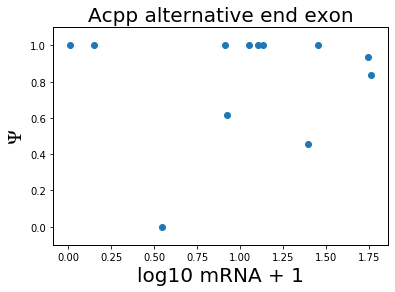

In [62]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Acpp_AE']+1), shalek_PSI.loc['Acpp_AE', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Acpp alternative end exon', fontsize = 20)
plt.ylim(-0.1, 1.1)
plt.show()

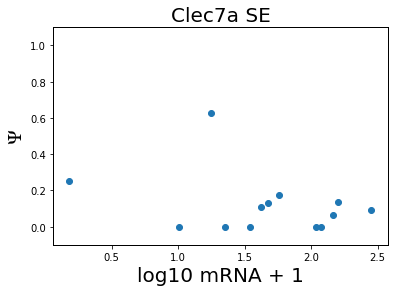

In [63]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Clec7a_other_1']+1), 
            shalek_PSI.loc['Clec7a_other_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Clec7a SE', fontsize = 20)
plt.ylim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()



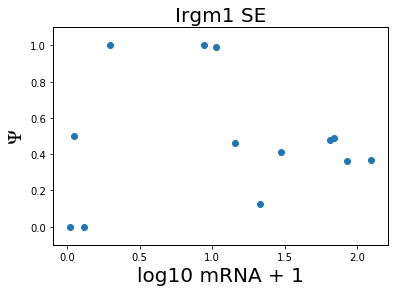

In [64]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Irgm1_1']+1), 
            shalek_PSI.loc['Irgm1_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irgm1 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()


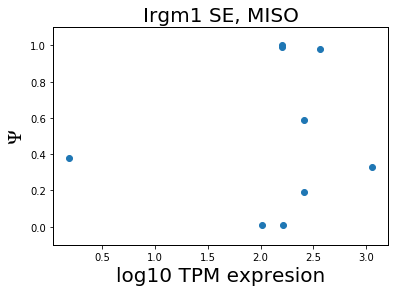

In [65]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['IRGM1', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Irgm1', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irgm1 SE, MISO', fontsize = 20)
plt.ylim(-0.1, 1.1)
plt.show()

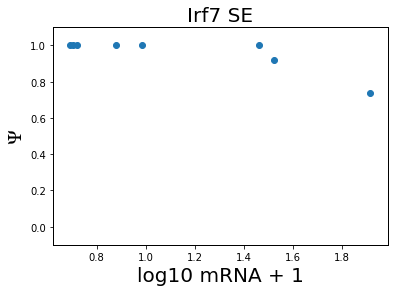

In [66]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Irf7_1']+1), 
            shalek_PSI.loc['Irf7_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irf7 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()


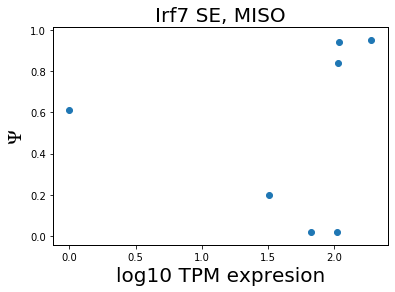

In [67]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['IRF7', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Irf7', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irf7 SE, MISO', fontsize = 20)
plt.show()

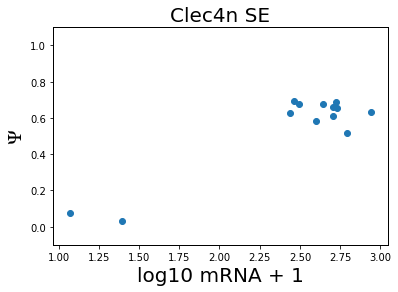

In [68]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Clec4n_2']+1), 
            shalek_PSI.loc['Clec4n_2', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Clec4n SE', fontsize = 20)
plt.show()


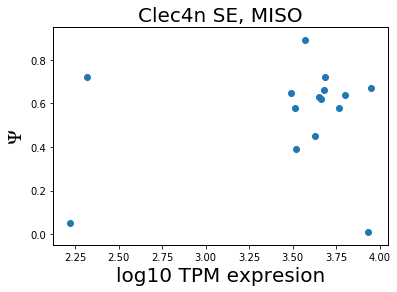

In [69]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['CLEC4N', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Clec4n', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Clec4n SE, MISO', fontsize = 20)
plt.show()

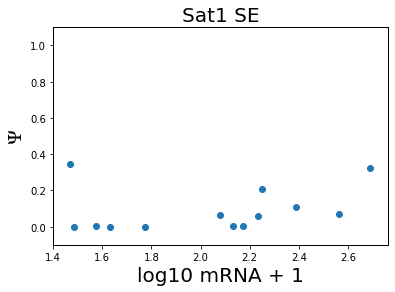

In [70]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Sat1_nmdSE_1']+1), 
            shalek_PSI.loc['Sat1_nmdSE_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Sat1 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()



In [71]:
# Not in their paper

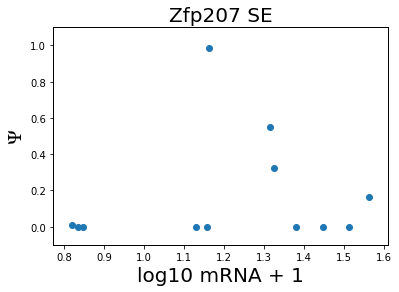

In [72]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Zfp207_2']+1), 
            shalek_PSI.loc['Zfp207_2', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Zfp207 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()


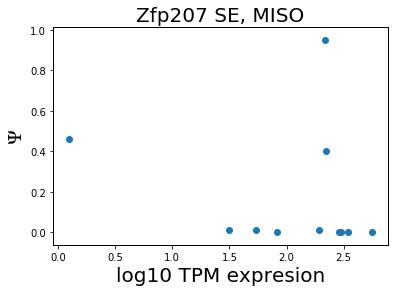

In [73]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['ZFP207', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Zfp207', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Zfp207 SE, MISO', fontsize = 20)
plt.show()

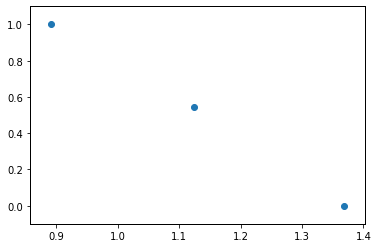

In [74]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Psmg4_1']+1), 
            shalek_PSI.loc['Psmg4_1', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)

plt.show()

In [75]:
# not in their paper

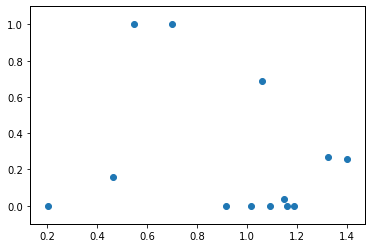

In [76]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Abi1_1']+1), 
            shalek_PSI.loc['Abi1_1', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)

plt.show()

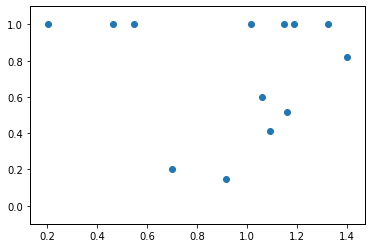

In [77]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Abi1_3']+1), 
            shalek_PSI.loc['Abi1_3', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)

plt.show()

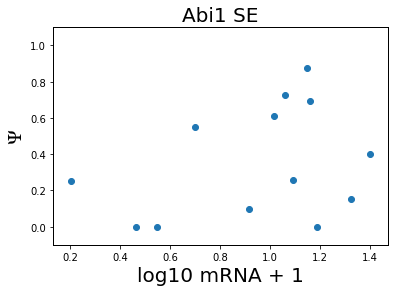

In [78]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Abi1_7']+1), 
            shalek_PSI.loc['Abi1_7', mrna_per_event_shalek.columns])

plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Abi1 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()

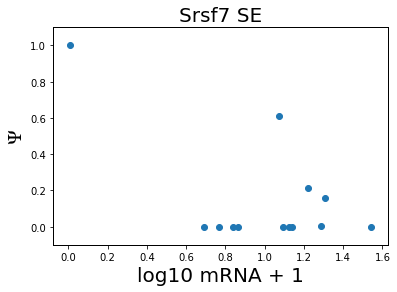

In [79]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Srsf7_nmdSE_1']+1), 
            shalek_PSI.loc['Srsf7_nmdSE_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Srsf7 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

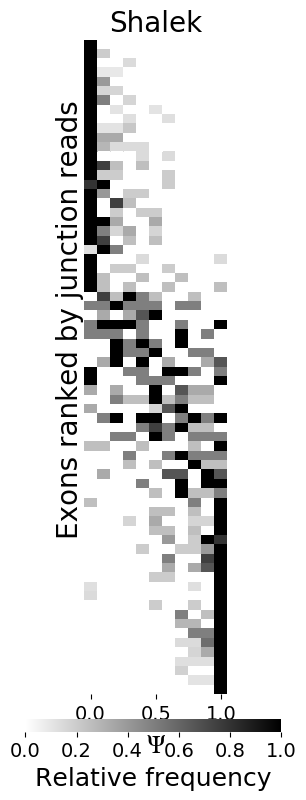

In [80]:
shalek_int_genes, shalek_int_exons = spu.get_int_events(shalek_PSI, shalek_mrna_counts, 0.05)
shalek_int_exons = [x for x in shalek_int_exons if x in mrna_per_event_shalek.index]
shalek_PSI_filtered, shalek_PSI_mrna_filtered, shalek_good_exons, mrna_filtered, reads_filtered = filter_psi(shalek_PSI, 
                                            shalek_int_exons, mrna_per_event_shalek, shalek_coverage_tab['SJ_coverage'], 
                                                                        shalek_read_counts, 10,
                                                                       cell_min=0.5)

good_cells = shalek_PSI_filtered.columns[shalek_PSI_filtered.isna().mean() <= 0.5]
shalek_PSI_good = shalek_PSI_filtered[good_cells]

shalek_hist_complete_f, shalek_hist_intermediate_f = scp.get_bins_table2(shalek_PSI_filtered, mrna_filtered, 11)


import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

hist_list = [shalek_hist_complete_f]

dset_name_list = ['Shalek']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_shalek',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

In [81]:
shalek_PSI_filtered.index

Index(['Abi1_7', 'Aldoa_2', 'Anxa4_1', 'Anxa4_2', 'Anxa6_1', 'Ap2m1_1',
       'Atp5j2_2', 'Atp5j_1', 'Capg_1', 'Cd300lf_2', 'Cd40_2', 'Cd44_1',
       'Cd68_1', 'Cd74_1', 'Ciapin1_2', 'Cish_1', 'Cldnd1_3', 'Clec4a2_1',
       'Clec4n_2', 'Clec5a_1', 'Clec7a_other_1', 'Csde1_4', 'Dab2_5',
       'Dnajc8_3', 'Dpep2_2', 'Eef1d_3', 'Eif4g2_1', 'Ergic2_3',
       'Ergic2_nmdSE_1', 'Fcgr2b_1', 'Fcgr2b_2', 'Hnrnpa1_1', 'Hnrnpa2b1_1',
       'Hnrnpa2b1_2', 'Hnrnpa2b1_3', 'Ifi35_1', 'Igf1_1', 'Il2rg_1', 'Irgm1_1',
       'Lat2_1', 'Lcp1_1', 'Ly6e_3', 'Mbnl1_10', 'Mbnl1_2', 'Mbnl1_4',
       'Mbnl1_6', 'Mbnl1_8', 'Mbnl1_9', 'Mndal_1', 'Morf4l1_3', 'Ndufa7_1',
       'Ndufv3_1', 'Prr13_1', 'Ptprc_1', 'Rsu1_1', 'Samhd1_1', 'Sat1_nmdSE_1',
       'Slamf7_1', 'Sp100_1', 'Sp100_2', 'Sp100_4', 'Srsf3_nmdSE_1',
       'Srsf7_nmdSE_1', 'Tank_other_2', 'Tarm1_1', 'Tmbim6_1', 'Tpm3_1',
       'U2surp_2', 'Vps29_1', 'Zfp207_2'],
      dtype='object')

In [82]:
shalek_paper_bin_exon = ['Acpp_AE', 'Clec7a_other_1', 'Irgm1_1', 'Irf7_1', 'Clec4n_2', 'Sat1_nmdSE_1', 'Zfp207', 
                         'Abi1_7', 'Srsf7_nmdSE_1', 'Psmg4_1']

In [83]:
for event in [x for x in shalek_paper_bin_exon if x in shalek_PSI_filtered.index]:
    print(event)
    print(shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.25))
    print(shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.75))

Clec7a_other_1
0.0
0.13411938098747234
Irgm1_1
0.3618864292589028
0.5
Clec4n_2
0.5853566009104704
0.6755955139493929
Sat1_nmdSE_1
0.0014144271570014145
0.11048371917937136
Abi1_7
0.0995260663507109
0.6094674556213018
Srsf7_nmdSE_1
0.0
0.1562189054726368


In [84]:
shalek_PSI.loc['Abi1_7', mrna_per_event_shalek.columns].quantile(0.75)

0.6094674556213018

In [85]:
for event in shalek_PSI_filtered.index:
    q25 = shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.25)
    q75 = shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.75)
    
    if (q25 <= 0.25) and (q75 >= 0.75):
        print(event)
        print(q25)
        print(q75)

Slamf7_1
0.18222222222222226
0.7975543478260869


In [86]:
shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Clec4n', shalek_cells].index[0],
                                         shalek_cells].quantile(0.25)


0.515

In [87]:
len(shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Clec4n', shalek_cells].index)

1

In [88]:
for event in shalek_paper_bin_exon:
    gen = event.split('_')[0]
    if len(shalek_PSI_paper.loc[shalek_PSI_paper.gene==gen, shalek_cells].index) >= 1:
        print(event)
        print(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene==gen, shalek_cells].index[0],
                                         shalek_cells].quantile(0.25))
        print(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene==gen, shalek_cells].index[0],
                                         shalek_cells].quantile(0.75))

Irgm1_1
0.19
0.98
Irf7_1
0.11
0.8899999999999999
Clec4n_2
0.515
0.665
Zfp207
0.0
0.20500000000000002
Abi1_7
0.395
0.9


In [89]:
# Add: PCA on gene expression ofonly cells of certain type or cluster. See if it separates PSI.

In [90]:
[x for x in chen_PSI.index if 'Rbm4' in x]

['Rbm41_1',
 'Rbm41_3',
 'Rbm42_1',
 'Rbm43_1',
 'Rbm44_1',
 'Rbm47_2',
 'Rbm47_5',
 'Rbm48_1',
 'Rbm4_1']

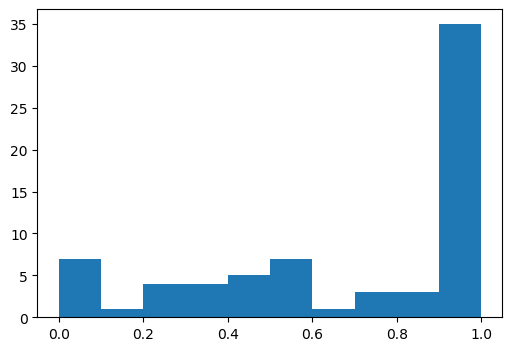

In [91]:
figsize(6, 4)
plt.hist(chen_PSI.loc['Rbm4_1', chen_MN].dropna())
plt.show()

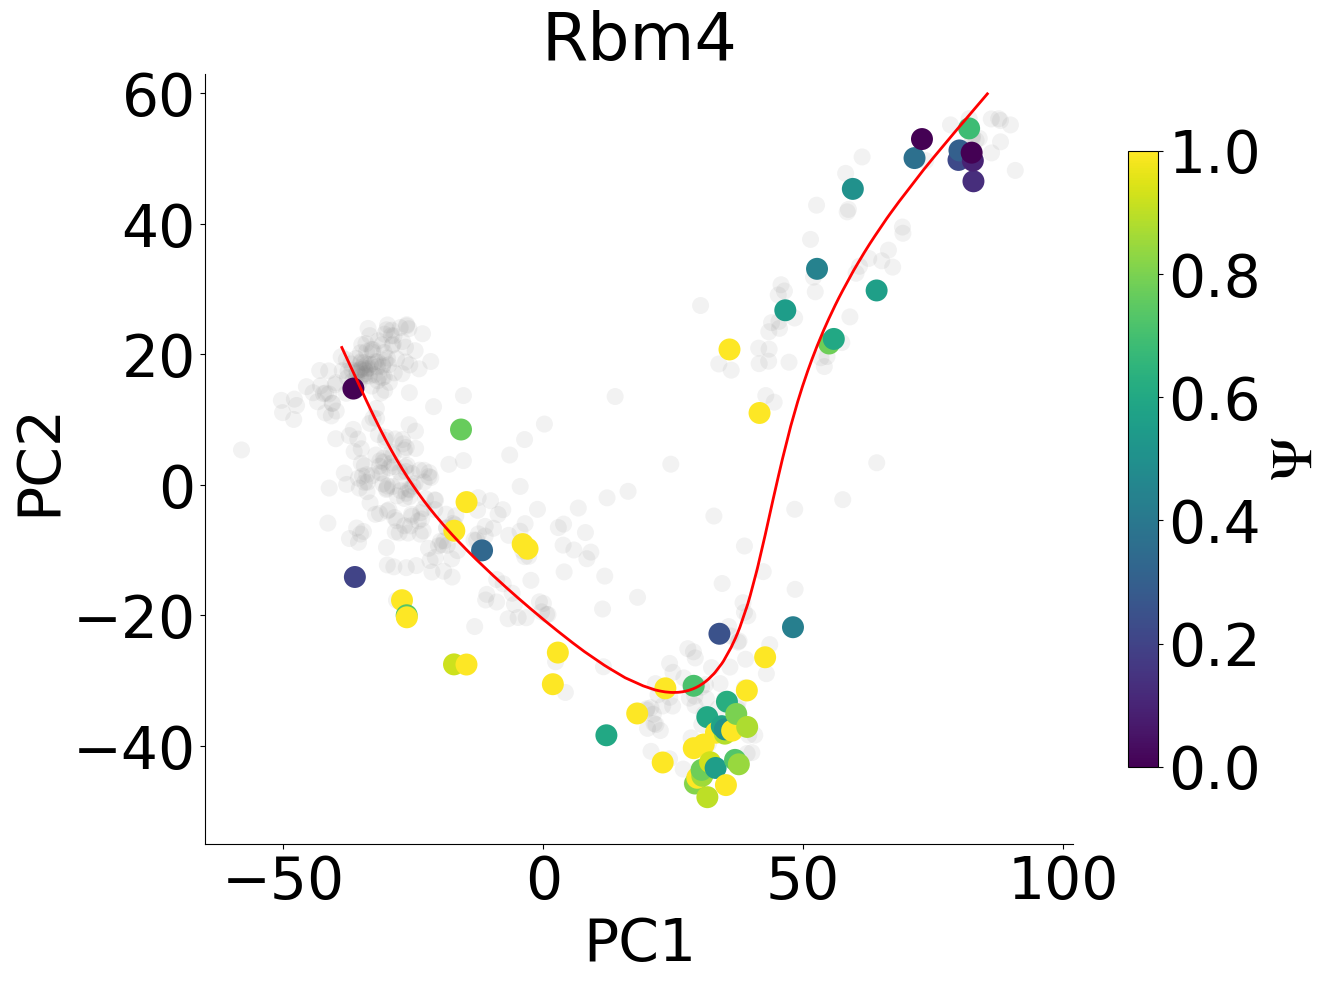

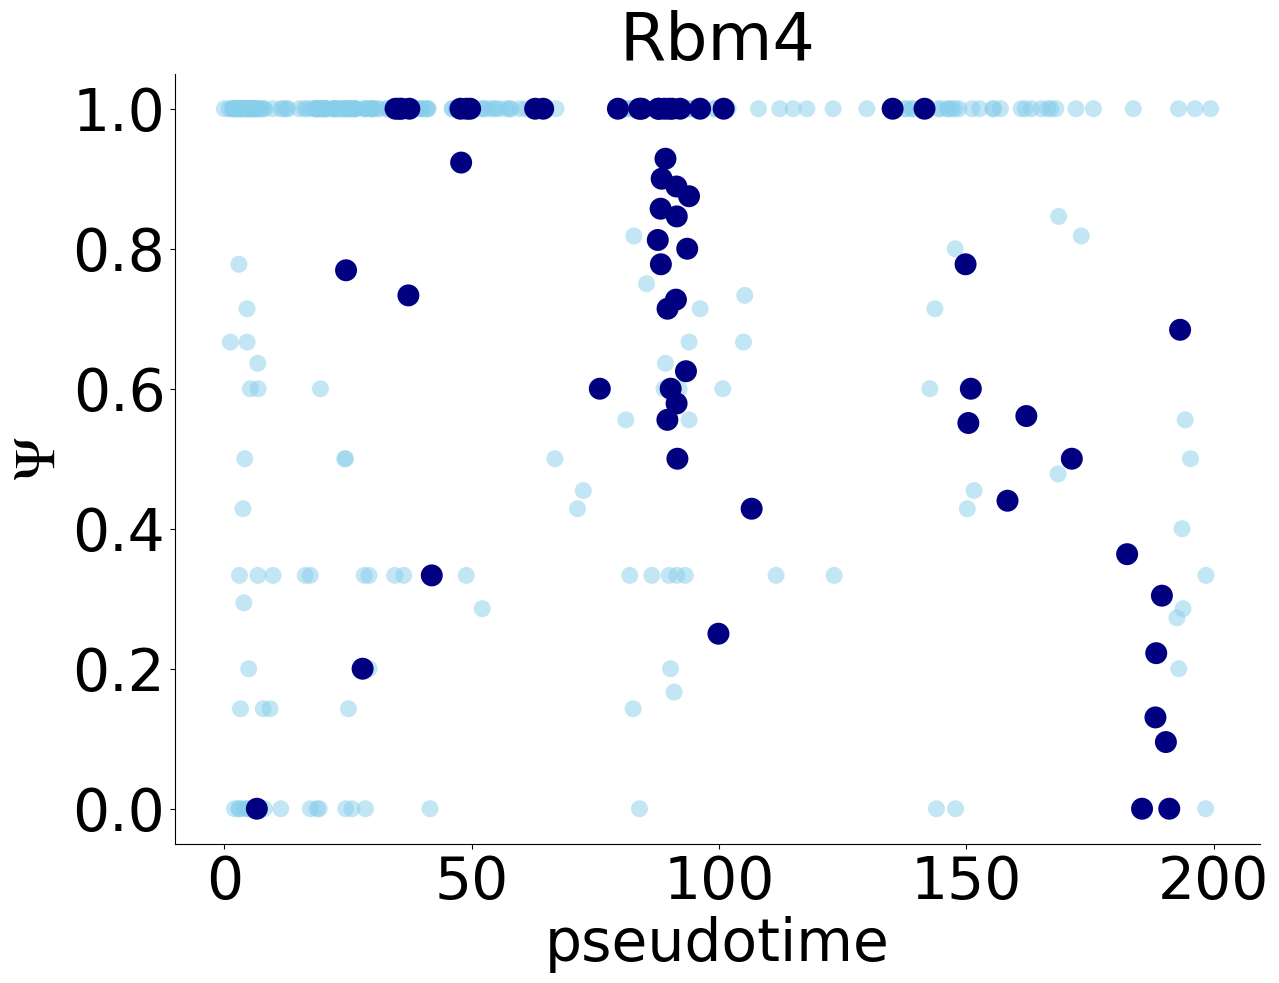

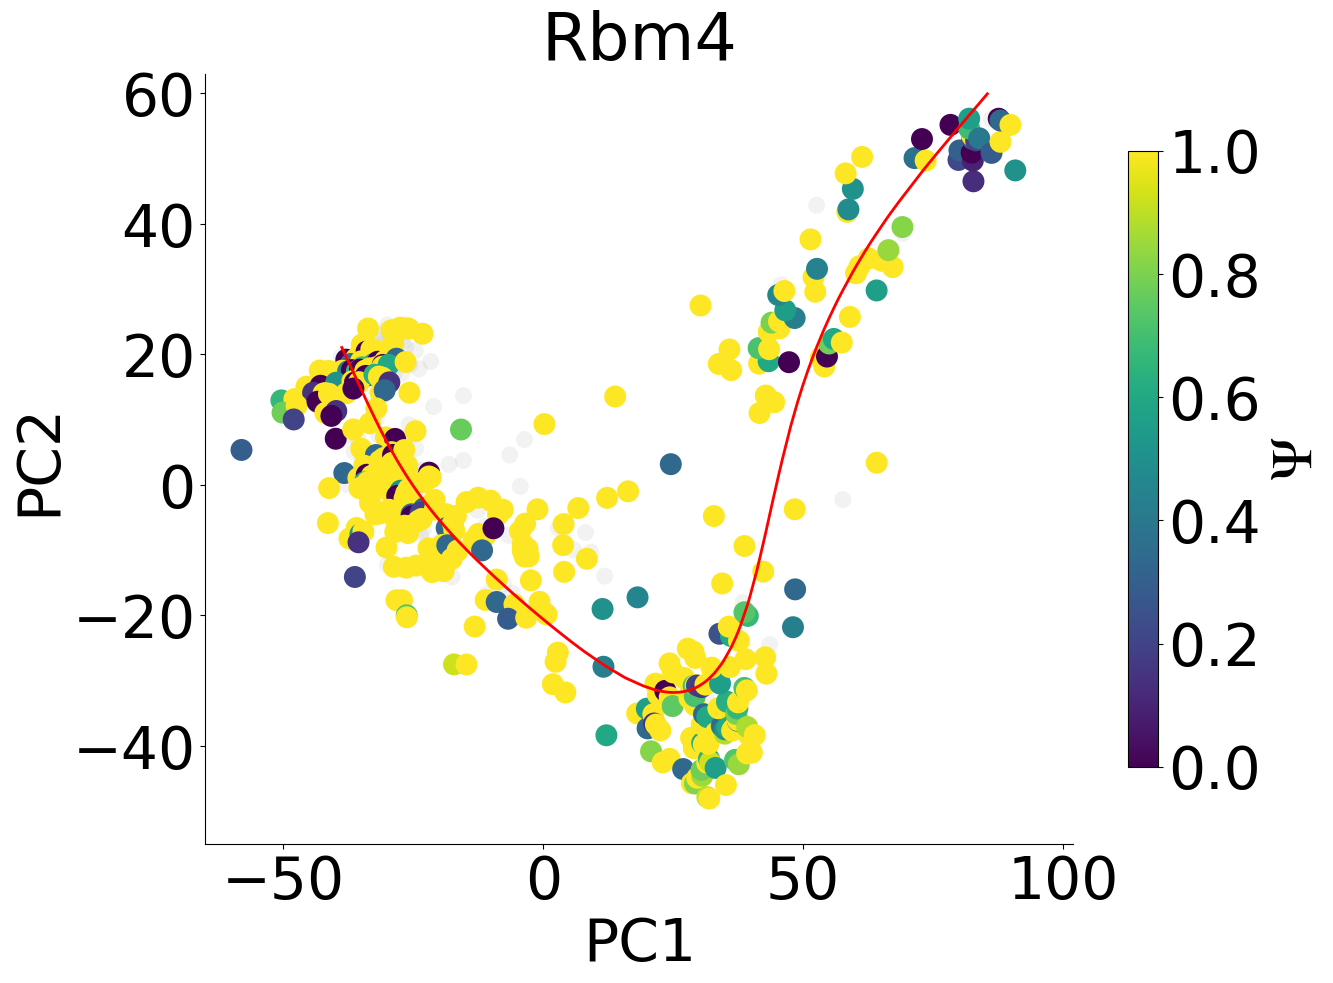

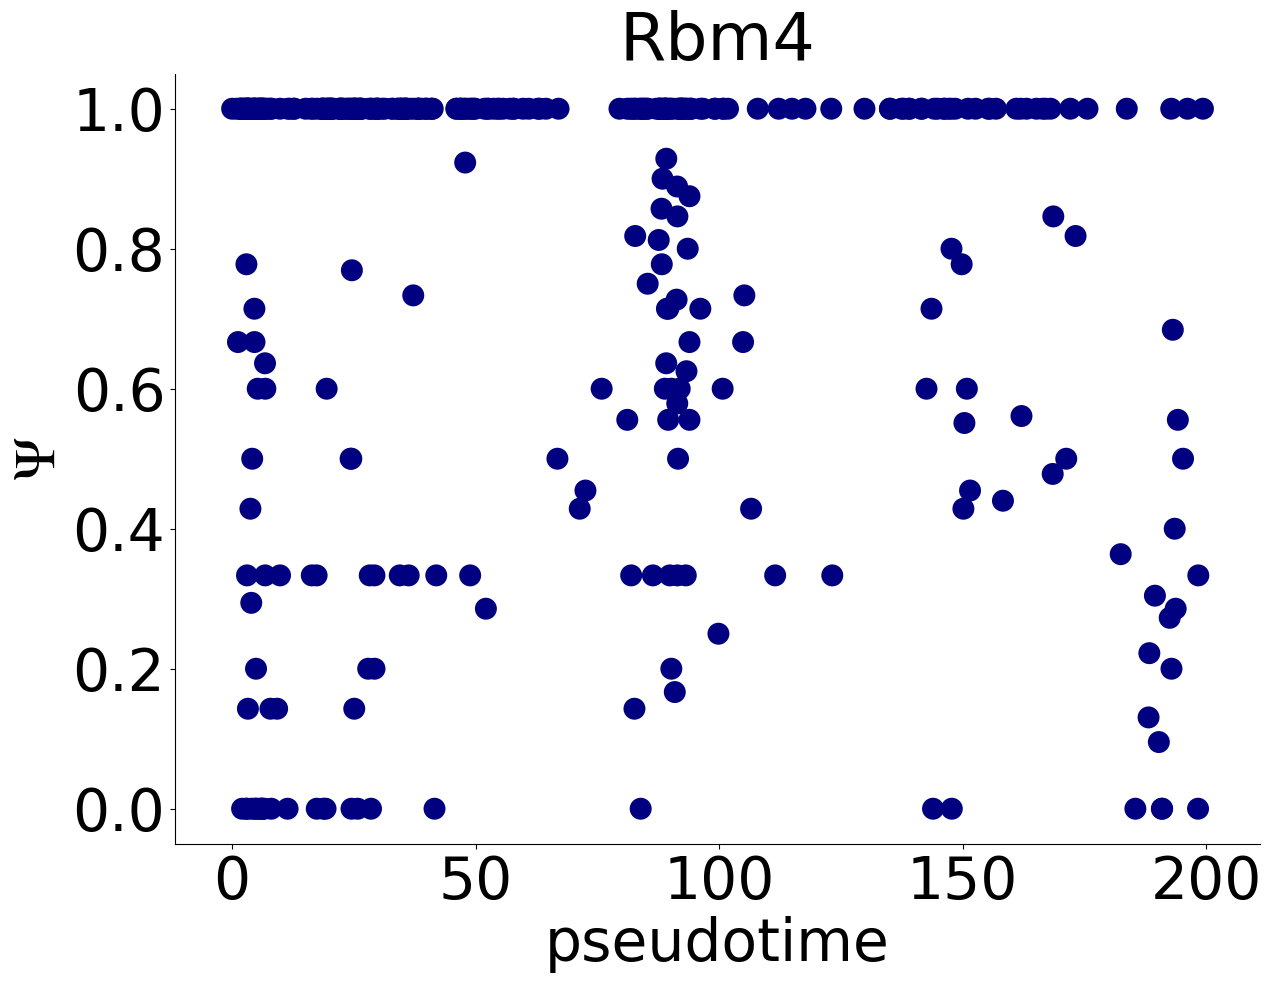

In [92]:
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Rbm4_1', 10, plot_dir='plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Rbm4_1', 10, plot_dir='plots_review/figure3/events/', filter_cells=False)



In [93]:
def plot_pca(pca_tab, psi_tab, mrna_tab, reads_tab, cj, event, mrna_min, plot_dir, cmap='viridis', filter_cells=True):
    
    #pass_cells = psi_tab.columns[(mrna_tab.loc[event] > mrna_min) & (rpm_tab.loc[event] >= rpm_tab.mean(axis=1).quantile(0.1))]
    
    
    if filter_cells:
        read_min = mrna_min*cj*(1+psi_tab.loc[event])

        pass_cells = psi_tab.columns[(mrna_tab.loc[event] > mrna_min) & (reads_tab.loc[event] >= read_min)]
        
    else:
        pass_cells = psi_tab.columns[(mrna_tab.loc[event] > -1) & (reads_tab.loc[event] >= -1)]


    figsize(14,10)
    fig = plt.figure()
    ax  = plt.subplot(1,1,1)
    ax.scatter(pca_tab.PC1, pca_tab.PC2, c='gray', s=150, edgecolors='none', alpha=0.1)
    sc = ax.scatter(pca_tab.loc[pass_cells, 'PC1'], pca_tab.loc[pass_cells, 'PC2'], 
                c=psi_tab.loc[event, pass_cells], s=250, edgecolors='none', vmin=0, vmax=1, cmap=cmap)
    
    ax.plot(pca_tab.line_1, -pca_tab.line_2, c='red',linewidth=2)

    #plt.plot(chen_pca.line_1, -chen_pca.line_2, c='red',linewidth=3, label='lineage')
    
#     ax.set_xlim([-65, 102])
#     ax.set_ylim([-55, 63])
    
    cb = plt.colorbar(sc, shrink = 0.8)
    cb.set_label(label='$\Psi$',size=42)
    cb.ax.tick_params(labelsize=42)
    
    #plt.legend(frameon=False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
    ax.tick_params(labelsize=42)

    plt.ylabel('PC2', fontsize=42)
    plt.xlabel('PC1', fontsize=42)
    plt.title(event.split('_')[0], fontsize=48)
    
    if filter_cells:

        plt.savefig(plot_dir+event+'.pca.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.png', dpi=300, bbox_inches='tight')
        
    else:
        
        plt.savefig(plot_dir+event+'.pca.no_filter.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.no_filter.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.no_filter.png', dpi=300, bbox_inches='tight')

        
    
    
    #plt.show()
    
    figsize(14,10)
    fig = plt.figure()
    ax  = plt.subplot(1,1,1)
    ax.scatter(pca_tab.pseudotime, psi_tab.loc[event], c='skyblue', s=150, edgecolors='none', alpha=0.5)
    ax.scatter(pca_tab.loc[pass_cells, 'pseudotime'], psi_tab.loc[event, pass_cells], 
                c='navy', s=250, edgecolors='none')
    
    ax.set_ylim((-0.05,1.05))
    
    #plt.plot(chen_pca.line_1, -chen_pca.line_2, c='red',linewidth=3, label='lineage')
    #plt.legend(frameon=False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.tick_params(labelsize=42)

    plt.ylabel('$\Psi$', fontsize=42)
    plt.xlabel('pseudotime', fontsize=42)
    plt.title(event.split('_')[0], fontsize=48)

    if filter_cells:
    
        plt.savefig(plot_dir+event+'.pseudotime.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.png', dpi=300, bbox_inches='tight')
        
    else:
        plt.savefig(plot_dir+event+'.pseudotime.no_filter.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.no_filter.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.no_filter.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    


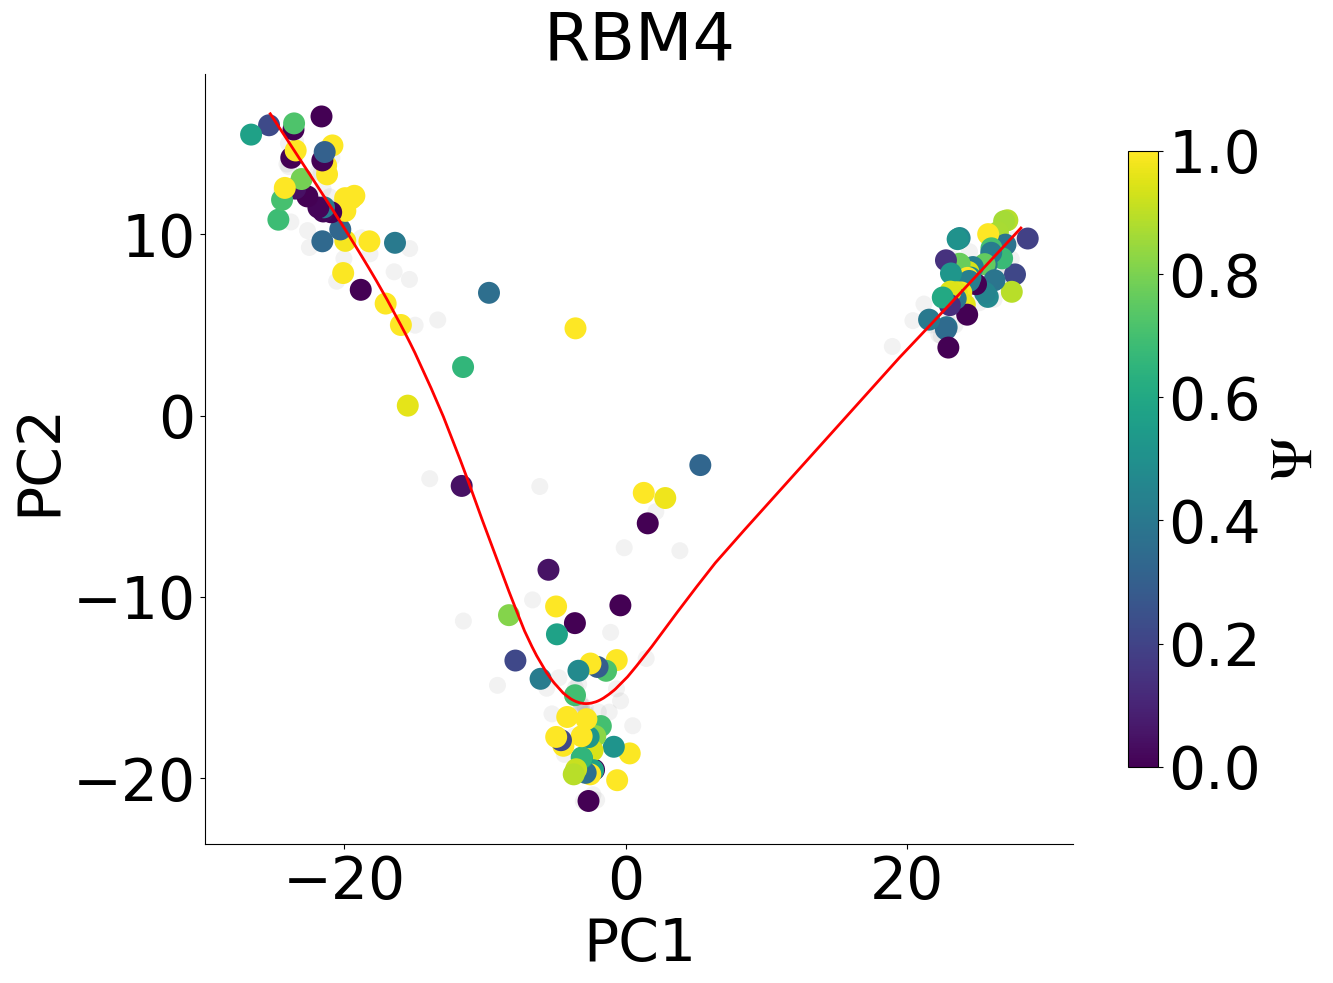

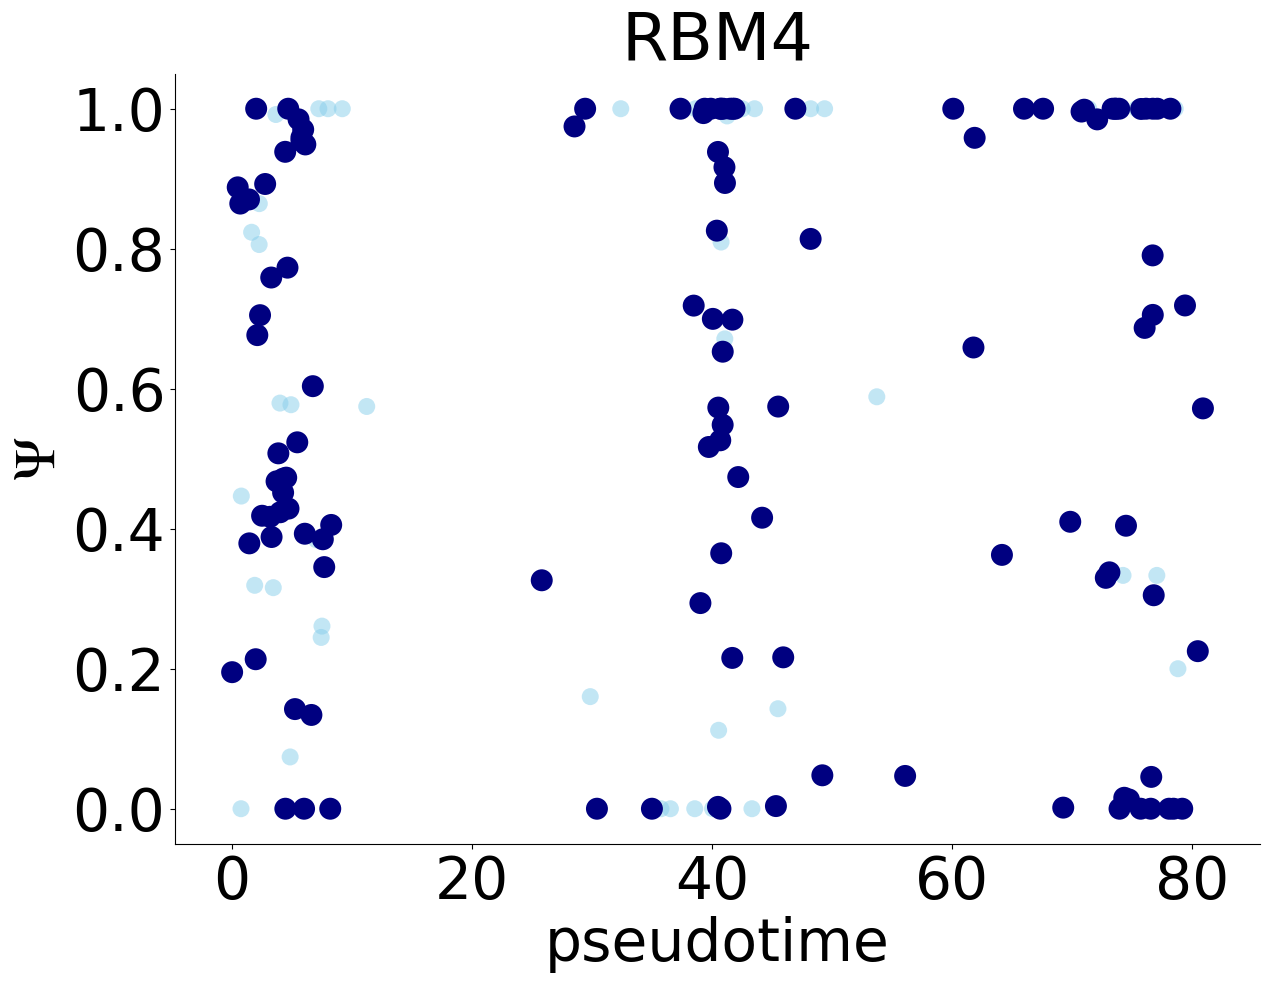

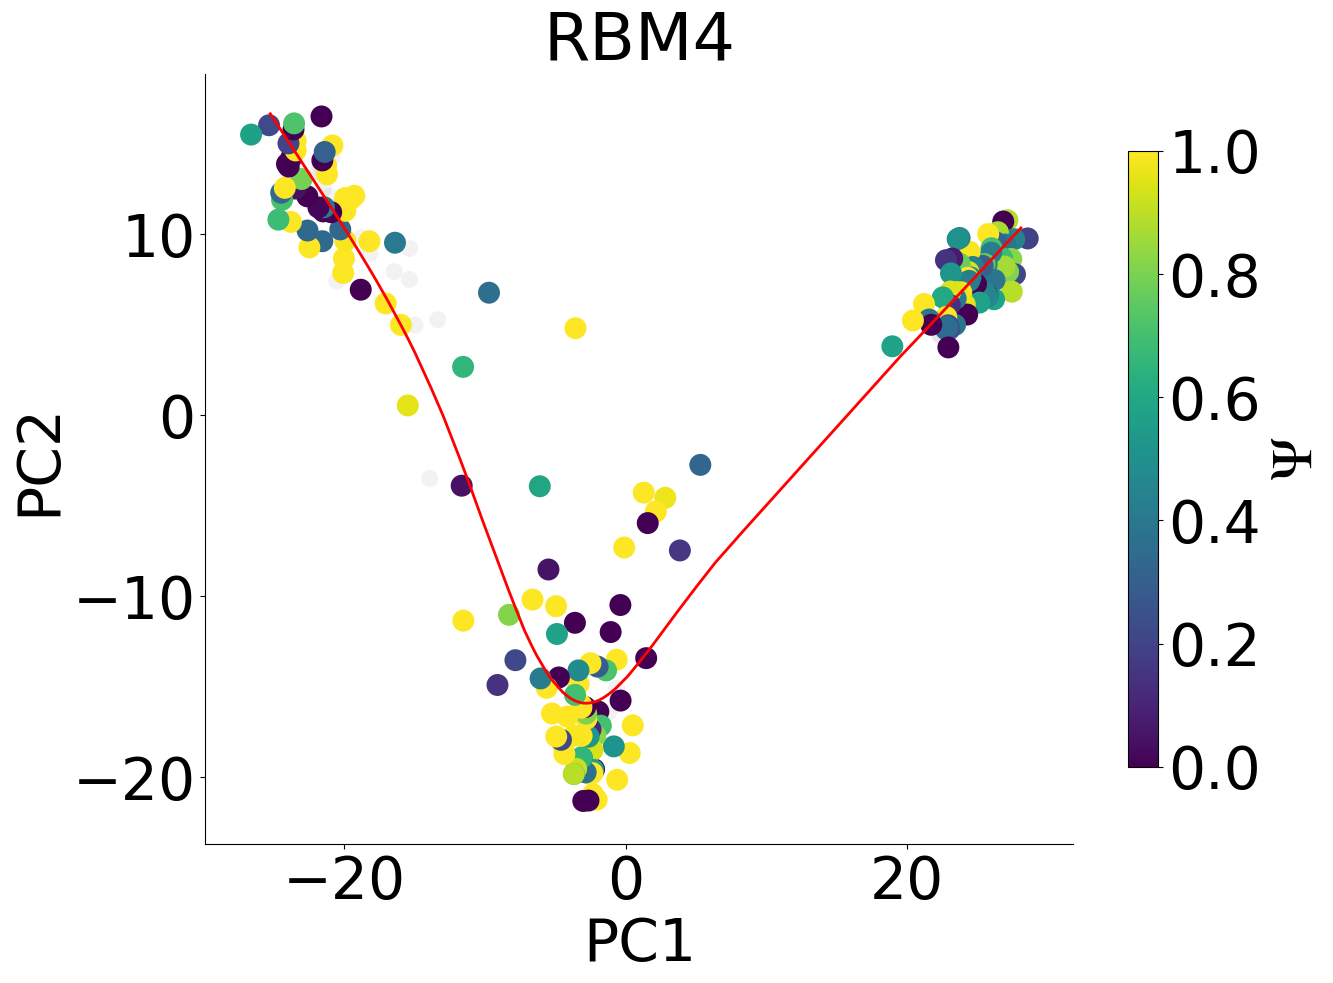

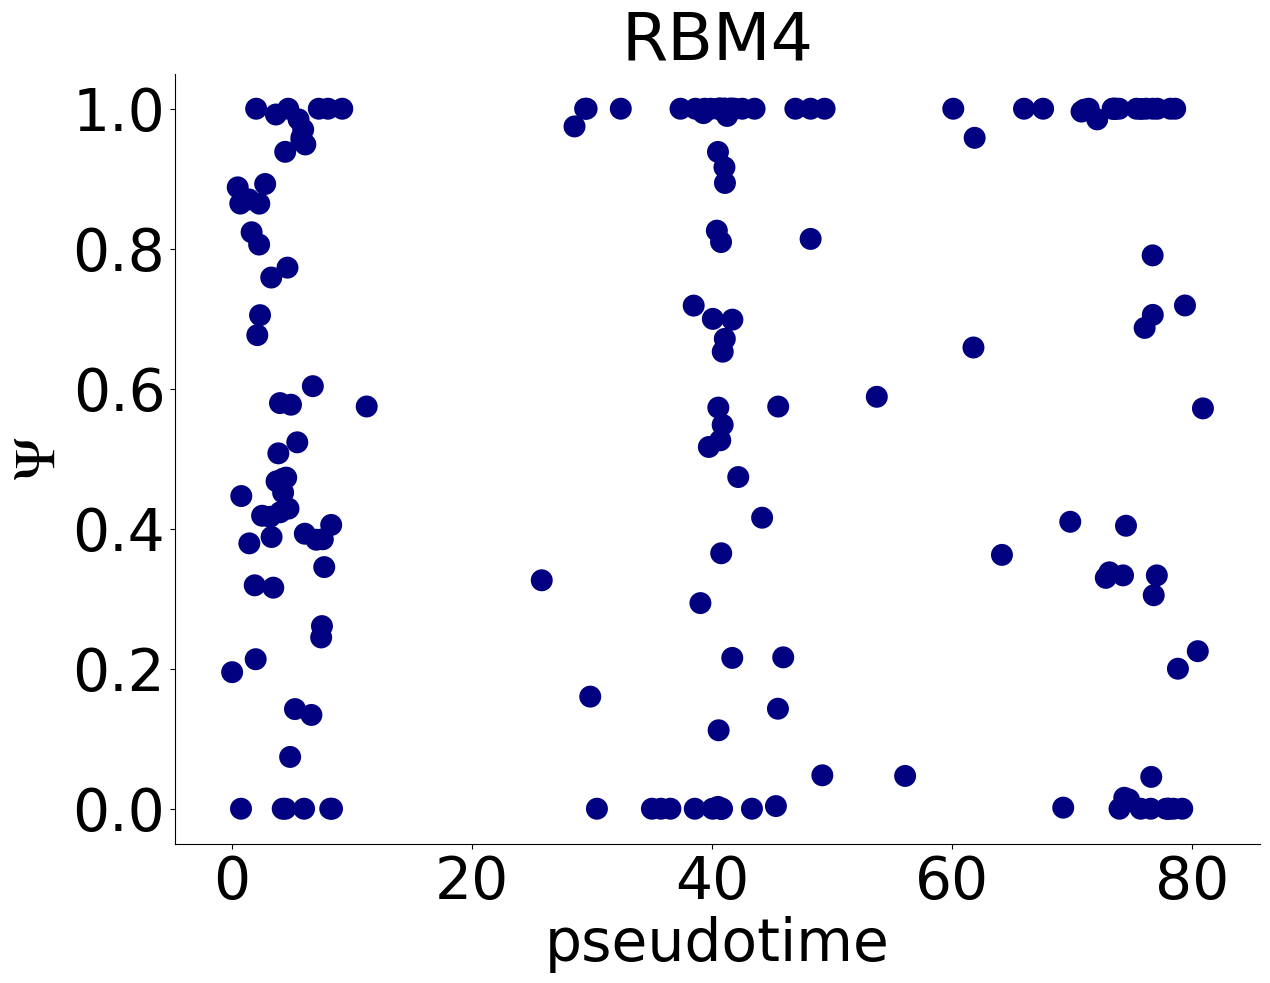

In [94]:
plot_pca(song_pca, song_PSI, mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 
             'RBM4_2', 10, plot_dir='plots_review/figure3/events/')
plot_pca(song_pca, song_PSI, mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 
             'RBM4_2', 10, plot_dir='plots_review/figure3/events/', filter_cells=False)



In [95]:
# Check bam alignments for RBM4
# Regression for bursts kinetics and bimodalty
# COntrol by expression, see of there are differences high freq low size, viceversa

In [96]:
chen_selected_exons = []
for clust in chen_clust_filter:
    chen_selected_exons.extend(list(clust[0].index))
    
chen_selected_exons = sorted(set(chen_selected_exons))

In [97]:
len(chen_selected_exons)

319

In [98]:
aver = filter_psi(chen_PSI.loc[chen_selected_exons], chen_selected_exons, mrna_per_event_chen, chen_coverage_tab['SJ_coverage'],
          chen_read_counts, 10, 0, 0)

In [99]:
aver_total = aver[0].T.corr().dropna().index
# aver[0].loc[aver_total].T.corr()

In [100]:
aver_total_ = aver[0].T.corr().index
aver_total_ = aver_total_[aver[0].loc[aver_total_].T.corr().isna().mean(axis=1) <= 0.01]
#aver[0].loc[aver_total_]

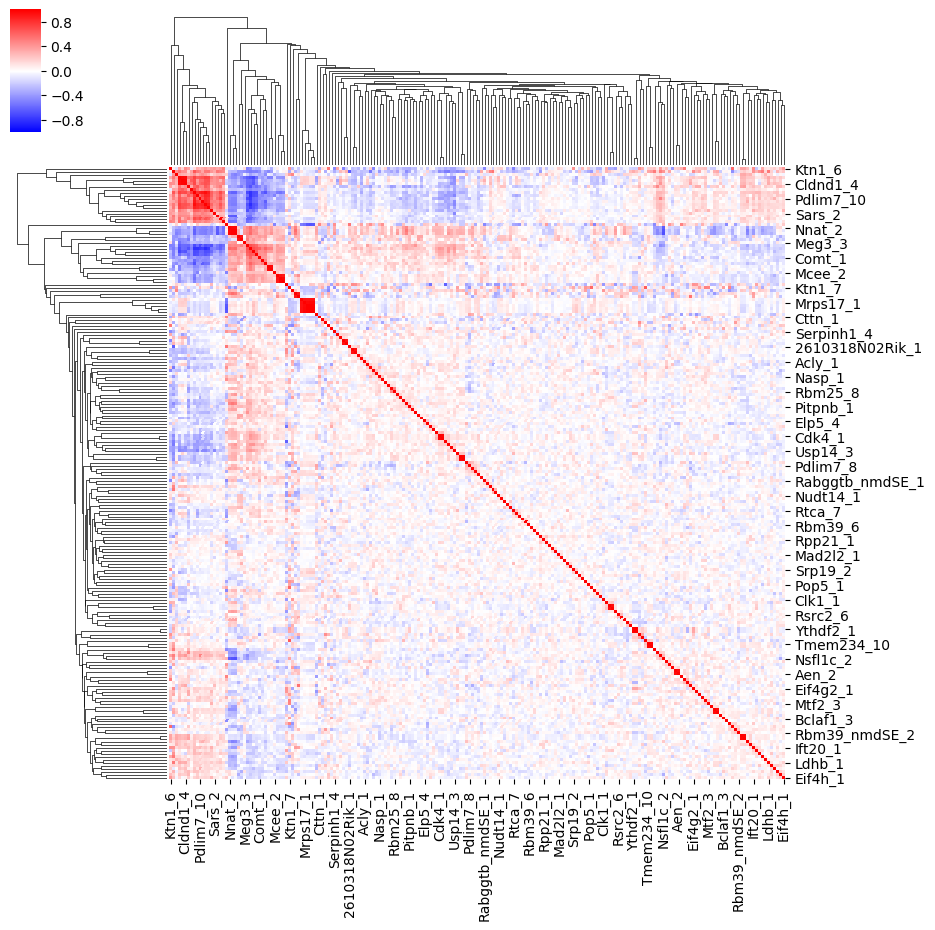

In [101]:
sns.clustermap(aver[0].loc[aver_total_].T.corr().fillna(0), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

In [102]:
aver = filter_psi(chen_PSI.loc[chen_selected_exons], chen_selected_exons, mrna_per_event_chen, chen_coverage_tab['SJ_coverage'],
          chen_read_counts, 10, 0, 0)

aver_total_ = aver[0].T.corr().index
aver_total_ = aver_total_[aver[0].loc[aver_total_].T.corr().isna().mean(axis=1) <= 0.01]
#aver[0].loc[aver_total_]


aver_filtered_ = []
aver_filtered_basura_ = []
for x in aver_total_:
    if x.split('_')[:-1] not in aver_filtered_basura_:
        aver_filtered_.append(x)
        aver_filtered_basura_.append(x.split('_')[:-1])

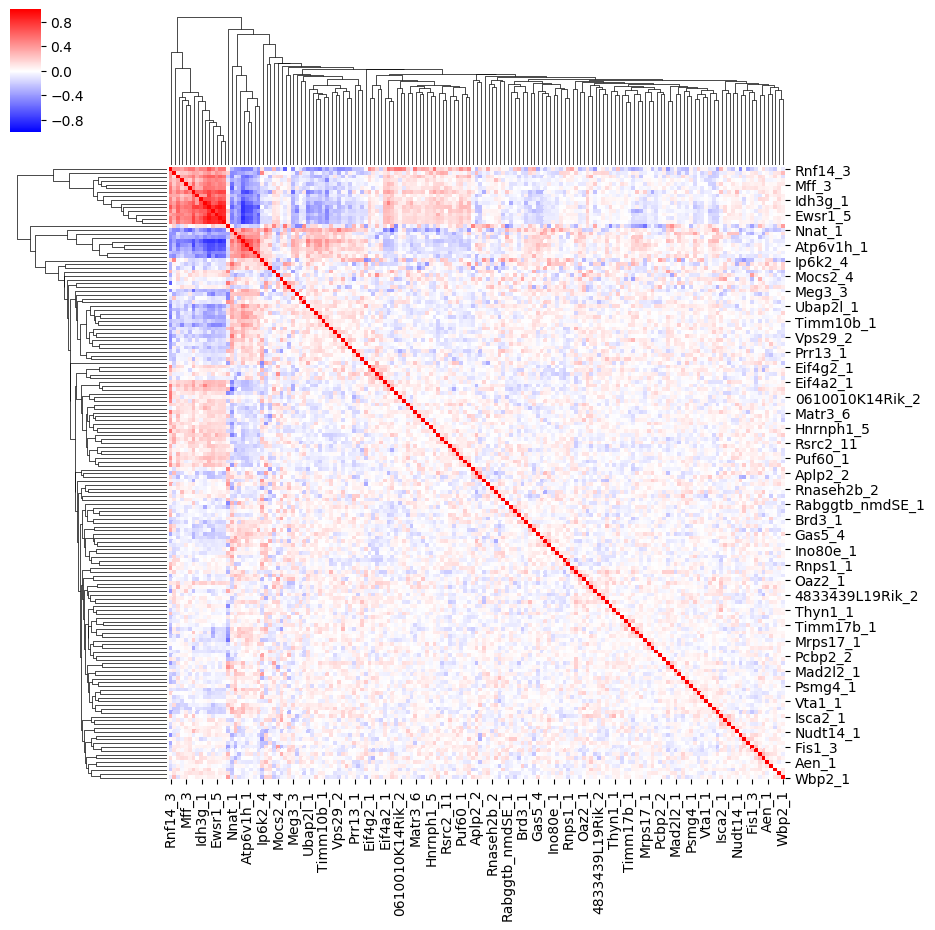

In [103]:
figsize(4,4)
sns.clustermap(aver[0].loc[aver_filtered_].T.corr().fillna(0), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

In [104]:
# figsize(4,4)
# sns.clustermap(aver[0].loc[aver_filtered_].T.corr(method='spearman').fillna(0), cmap=cm.bwr, vmin=-1, vmax=1)
# plt.show()

In [105]:
len(aver_filtered_)

161

In [106]:
# figsize(4,4)
# sns.clustermap(aver[0].loc[aver_filtered_].corr(method='spearman').fillna(0), cmap=cm.bwr)
# plt.show()

In [107]:
from scipy.stats import zscore
# zscore(aver[0].loc[aver_filtered_])

In [108]:
aver_finale = aver[0].loc[aver_filtered_]#
aver_finale = pd.DataFrame(zscore(aver_finale.T.fillna(aver_finale.T.mean()).T))
aver_finale.columns = aver[0].columns
aver_finale.index = aver_filtered_

In [109]:
# sns.clustermap(aver_finale.corr(method='spearman'), cmap=cm.viridis)
# plt.show()

In [110]:
# sns.clustermap(aver_finale.T.corr(method='spearman'), cmap=cm.bwr, vmin=-1, vmax=1)
# plt.show()

In [111]:
chen_coverage_tab['zero'] = [0]*len(chen_coverage_tab.index)

In [112]:
song_coverage_tab['zero'] = [0]*len(song_coverage_tab.index)
trapnell_coverage_tab['zero'] = [0]*len(trapnell_coverage_tab.index)
lescroart_coverage_tab['zero'] = [0]*len(lescroart_coverage_tab.index)

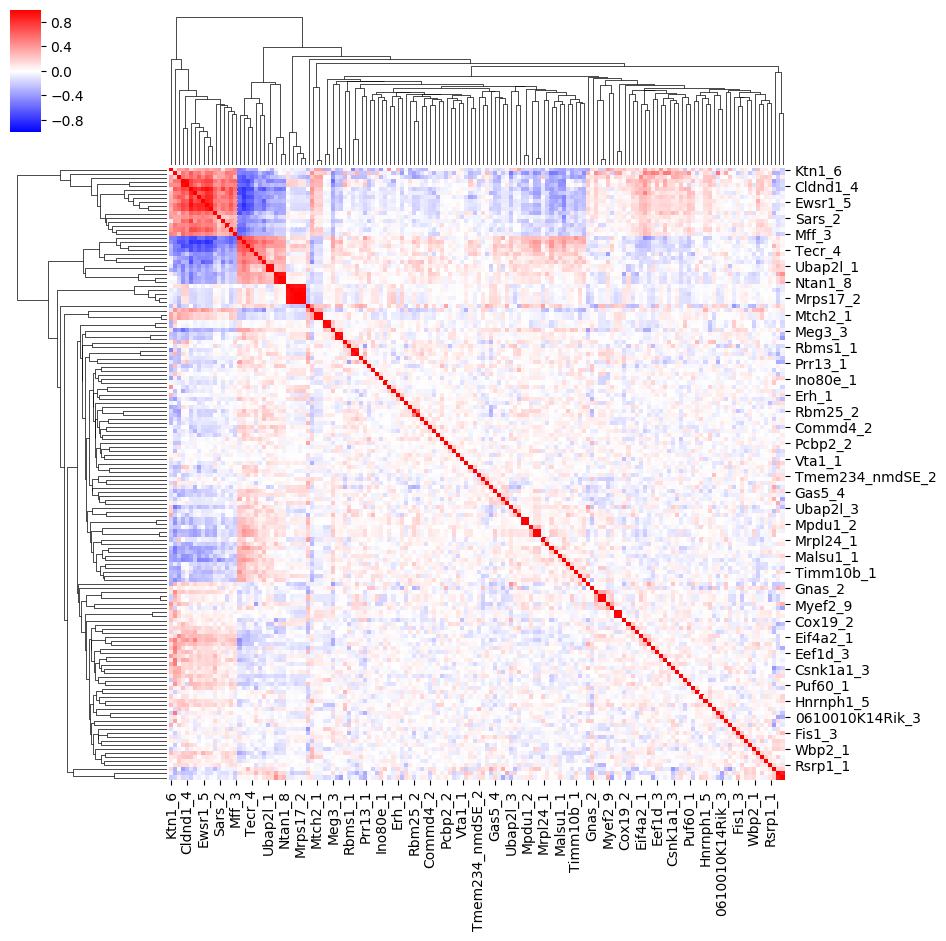

In [113]:
sns.clustermap(aver[0].loc[aver_total].T.corr(), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

In [114]:
aver_filtered = []
aver_filtered_basura = []
for x in aver_total:
    if x.split('_')[:-1] not in aver_filtered_basura:
        aver_filtered.append(x)
        aver_filtered_basura.append(x.split('_')[:-1])

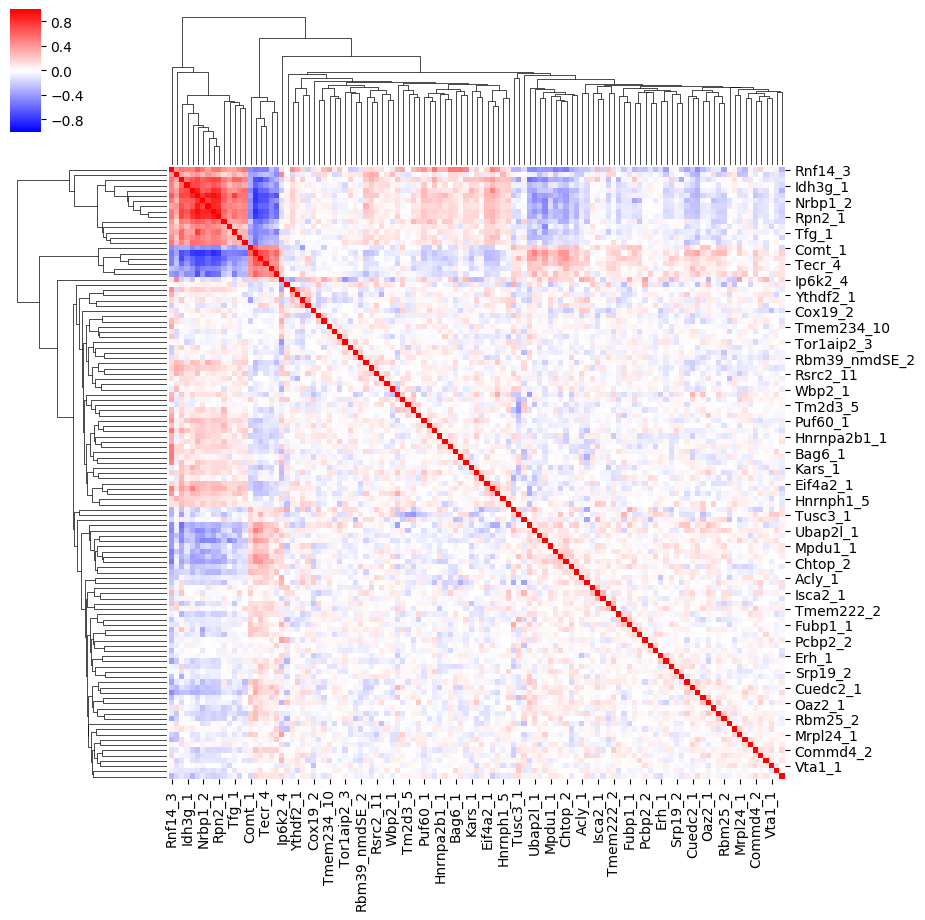

In [115]:
figsize(4,4)
sns.clustermap(aver[0].loc[aver_filtered].T.corr(), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

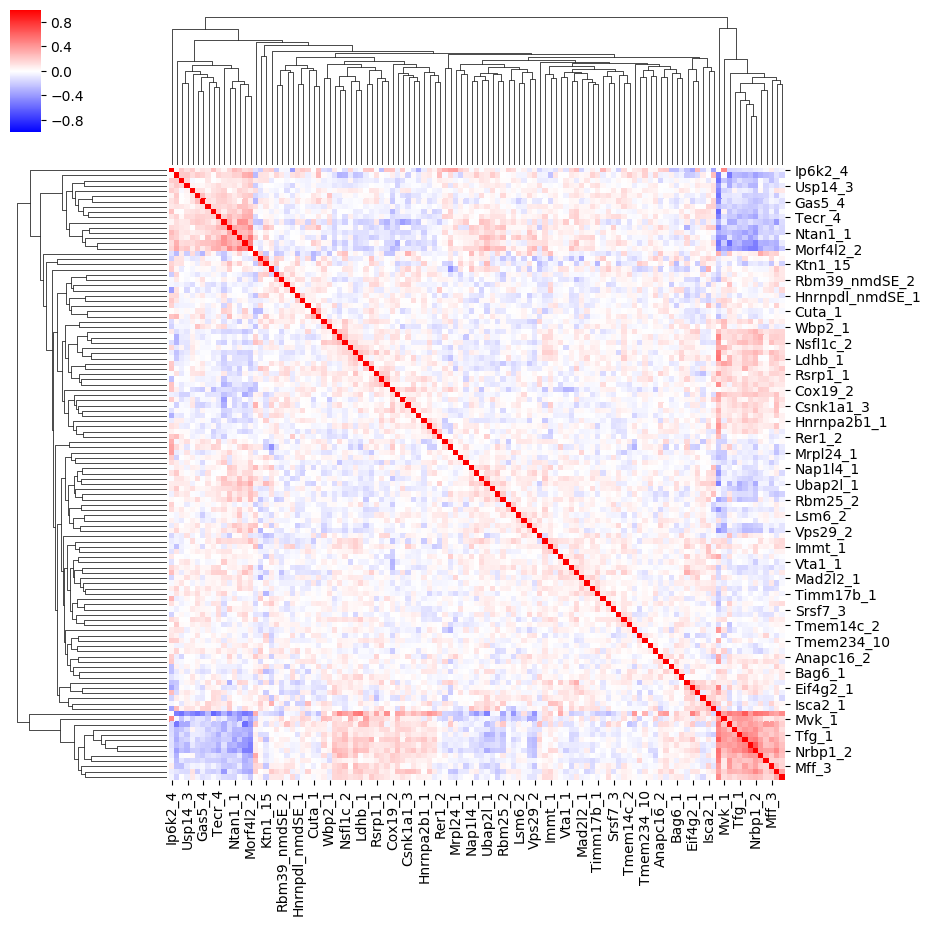

In [116]:
figsize(4,4)
sns.clustermap(aver[0].loc[aver_filtered].T.corr(method='spearman'), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

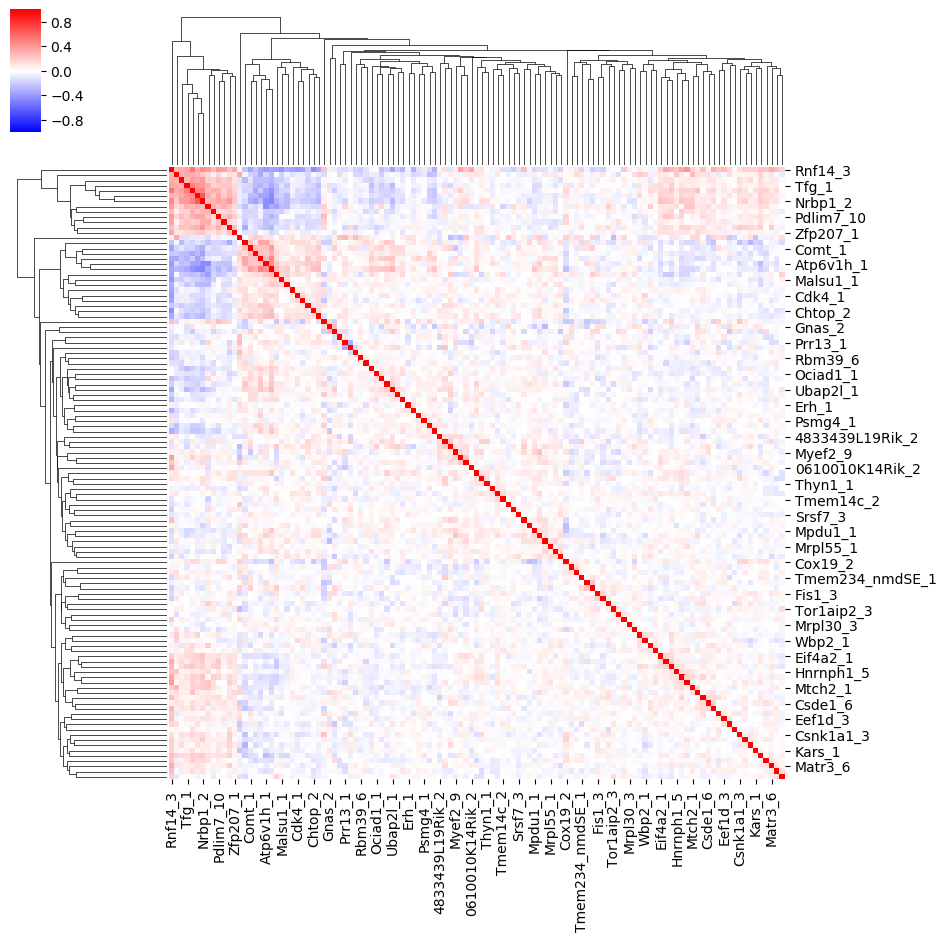

In [117]:
figsize(4,4)
sns.clustermap(aver[0].loc[aver_filtered].T.corr(method='kendall'), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

In [118]:
chen_selected_exons = list(chen_clust_filter[0][0].index)
for clust in chen_clust_filter:
    chen_selected_exons = [x for x in list(clust[0].index) if x in chen_selected_exons]
    
chen_selected_exons = sorted(set(chen_selected_exons))

In [119]:
aver = filter_psi(chen_PSI.loc[chen_selected_exons], chen_selected_exons, mrna_per_event_chen, chen_coverage_tab['SJ_coverage'],
          chen_read_counts, 10, 0, 0)

In [120]:
def best_friends(psi_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, method = 'best_friend',
                 na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, quant=0.9, top_friends=5):

    int_genes, int_exons = spu.get_int_events(psi_tab[subpop], mrna_counts, psi_min)
    int_exons = [x for x in int_exons if x in mrna_per_event.index]


    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'SJ_coverage'],
              read_counts[subpop], mrna_min, 0, cell_min)

    aver_total_ = aver[0].T.corr().index
    aver_total_ = aver_total_[aver[0].loc[aver_total_].T.corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    aver_filtered_ = []
    aver_filtered_basura_ = []
    for x in aver_total_:
        if x.split('_')[:-1] not in aver_filtered_basura_:
            aver_filtered_.append(x)
            aver_filtered_basura_.append(x.split('_')[:-1])

    best_friends = []
    aver_filtered_cor = aver[0].loc[aver_filtered_].T.corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0].loc[aver_filtered_].isna().mean().mean())
    print(len(aver_filtered_))


    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'SJ_coverage'],
              read_counts[subpop], 0, read_min, cell_min)

    aver_total_ = aver[0].T.corr().index
    aver_total_ = aver_total_[aver[0].loc[aver_total_].T.corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    aver_filtered_ = []
    aver_filtered_basura_ = []
    for x in aver_total_:
        if x.split('_')[:-1] not in aver_filtered_basura_:
            aver_filtered_.append(x)
            aver_filtered_basura_.append(x.split('_')[:-1])

    best_friends_2 = []
    aver_filtered_cor = aver[0].loc[aver_filtered_].T.corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends_2.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends_2.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends_2.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0].loc[aver_filtered_].isna().mean().mean())
    print(len(aver_filtered_))


    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'zero'],
              read_counts[subpop], mrna_min, 0, cell_min)

    aver_total_ = aver[0].T.corr().index
    aver_total_ = aver_total_[aver[0].loc[aver_total_].T.corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    aver_filtered_ = []
    aver_filtered_basura_ = []
    for x in aver_total_:
        if x.split('_')[:-1] not in aver_filtered_basura_:
            aver_filtered_.append(x)
            aver_filtered_basura_.append(x.split('_')[:-1])

    best_friends_3 = []
    aver_filtered_cor = aver[0].loc[aver_filtered_].T.corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends_3.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends_3.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends_3.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0].loc[aver_filtered_].isna().mean().mean())
    print(len(aver_filtered_))


    figsize(6,4)
    plt.hist(best_friends, alpha=0.5, density=True)
    plt.hist(best_friends_2, alpha=0.5, density=True)
    plt.hist(best_friends_3, alpha=0.5, density=True)
    plt.show()
    
    return np.mean(best_friends), np.mean(best_friends_2), np.mean(best_friends_3)

0.12499999999999993
60
0.14212488350419386
58
0.13203828828828829
96


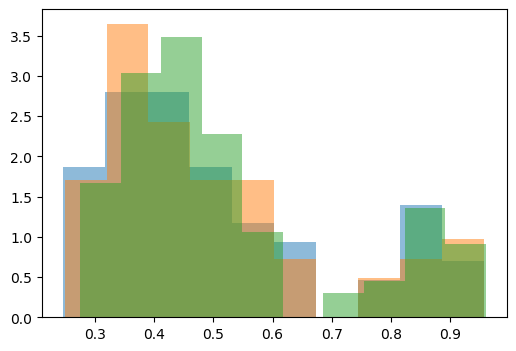

(0.509198590757557, 0.49716631990219295, 0.5210334167551819)

In [121]:
best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'best_friend', na_tolerance = 0, mrna_min=5, read_min = 5, cell_min = 0.75, psi_min=0.1, 
             quant=0.9, top_friends=5)

0.2743725868725869
112
0.30326838466373357
129
0.2586753420086753
162


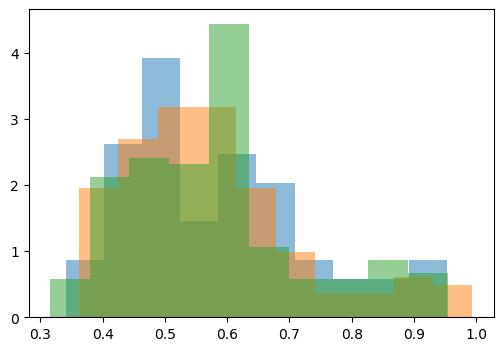

(0.5820423571579099, 0.5733626913357549, 0.5815112861019438)

In [122]:
best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'best_friend', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.2743725868725869
112
0.30326838466373357
129
0.2586753420086753
162


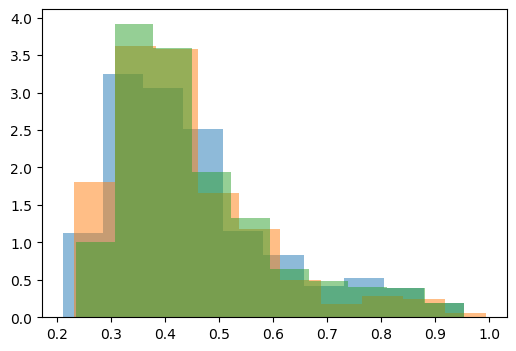

(0.45159021592897797, 0.43509211831440814, 0.4564747554422489)

In [123]:
best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'top_friends', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=10)

0.2743725868725869
112
0.30326838466373357
129
0.2586753420086753
162


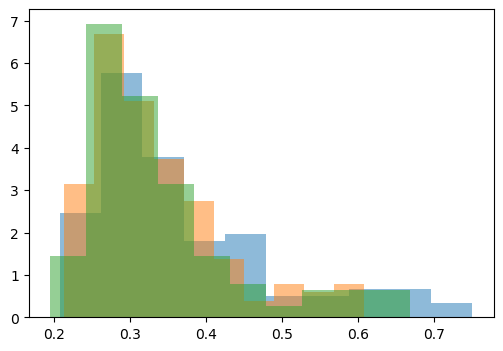

(0.367966748853307, 0.336091358015884, 0.3372912382528018)

In [124]:
best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.25005464480874323
200
0.28276291822452315
114
0.23457368375401155
315


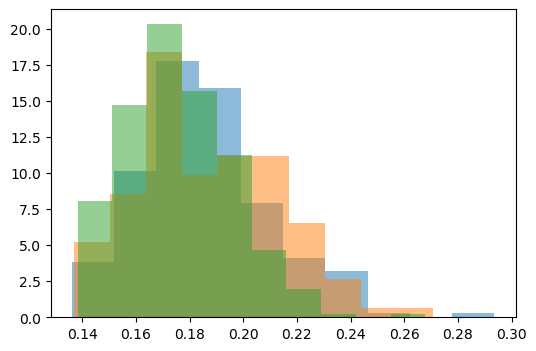

(0.1856167941218958, 0.18775415069634224, 0.17606602195470747)

In [125]:
best_friends(chen_PSI, chen_Epi, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.22582949308755765
200
0.2652999698522761
107
0.21305827124337823
321


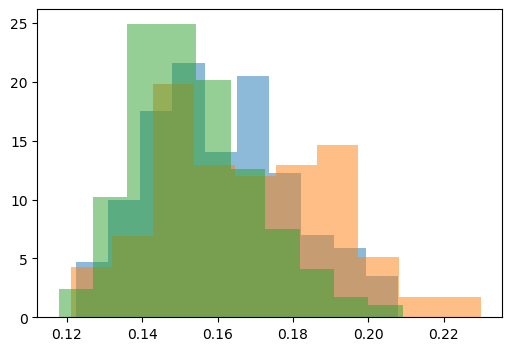

(0.16085517148240416, 0.16766484859554928, 0.15364387117347117)

In [126]:
best_friends(chen_PSI, chen_clusters[0], chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.2615610472229019
67
0.26805840163934425
32
0.2513661202185795
117


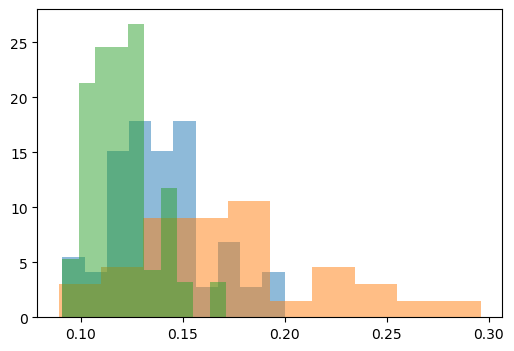

(0.13900603312155624, 0.1734903063519559, 0.12027894618920314)

In [127]:
best_friends(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.2, 
             quant=0.9, top_friends=5)

0.25367741935483873
125
0.026315789473684213
190
0.15491675338189384
124


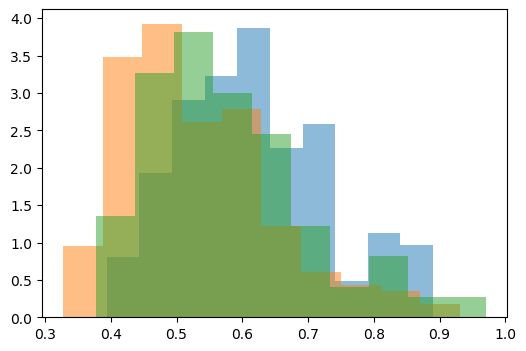

(0.6163365309215243, 0.5308572698460957, 0.5758033383539524)

In [128]:
best_friends(song_PSI, song_iPSC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'best_friend', na_tolerance = 0, mrna_min=10, read_min = 5, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.32266377322663786
73
0.3168316831683168
373
0.3080515598729686
106


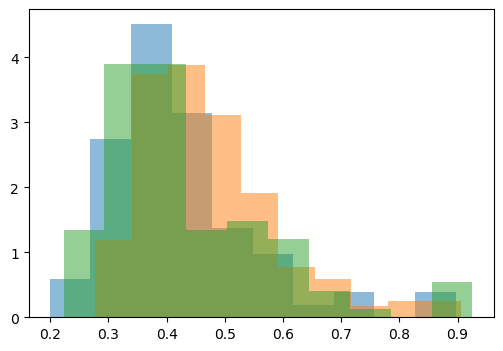

(0.42531786826742146, 0.47240068236464, 0.43426383147459857)

In [129]:
best_friends(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'best_friend', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [130]:
def best_friends_cells(psi_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, method = 'best_friend',
                 na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, quant=0.9, top_friends=5):

    int_genes, int_exons = spu.get_int_events(psi_tab[subpop], mrna_counts, psi_min)
    int_exons = [x for x in int_exons if x in mrna_per_event.index]


    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'SJ_coverage'],
              read_counts[subpop], mrna_min, 0, cell_min)

    aver_total_ = aver[0].corr().index
    aver_total_ = aver_total_[aver[0][aver_total_].corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    best_friends = []
    aver_filtered_cor = aver[0][aver_total_].corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0][aver_total_].isna().mean().mean())
    print(len(aver_total_))
    print(aver[0][aver_total_].shape)


    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'SJ_coverage'],
              read_counts[subpop], 0, read_min, cell_min)

    aver_total_ = aver[0].corr().index
    aver_total_ = aver_total_[aver[0][aver_total_].corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    best_friends_2 = []
    aver_filtered_cor = aver[0][aver_total_].corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends_2.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends_2.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends_2.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0][aver_total_].isna().mean().mean())
    print(len(aver_total_))
    print(aver[0][aver_total_].shape)

    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'zero'],
              read_counts[subpop], mrna_min, 0, cell_min)

    aver_total_ = aver[0].corr().index
    aver_total_ = aver_total_[aver[0][aver_total_].corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    best_friends_3 = []
    aver_filtered_cor = aver[0][aver_total_].corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends_3.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends_3.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends_3.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0][aver_total_].isna().mean().mean())
    print(len(aver_total_))
    print(aver[0][aver_total_].shape)


    figsize(6,4)
    plt.hist(best_friends, alpha=0.5, density=True)
    plt.hist(best_friends_2, alpha=0.5, density=True)
    plt.hist(best_friends_3, alpha=0.5, density=True)
    plt.show()
    
    return np.mean(best_friends), np.mean(best_friends_2), np.mean(best_friends_3)

0.11902286902286899
74
(26, 74)
0.08407738095238095
64
(21, 64)
0.13169949610627574
74
(59, 74)


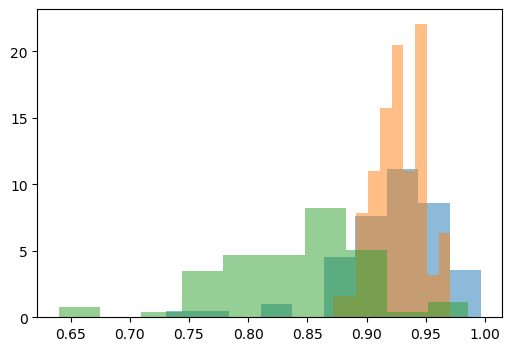

(0.9227831517332664, 0.9275614950127342, 0.8411185513166338)

In [131]:
best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'best_friend', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.75, psi_min=0.1, 
             quant=0.9, top_friends=5)

0.11902286902286899
74
(26, 74)
0.08407738095238095
64
(21, 64)
0.13169949610627574
74
(59, 74)


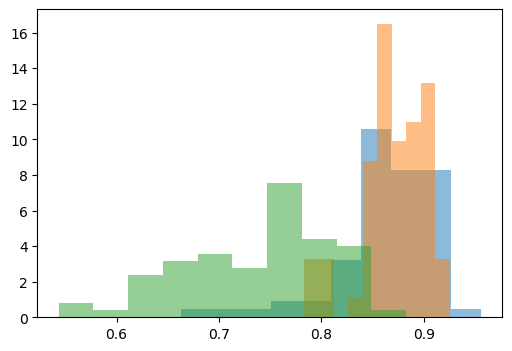

(0.8621205326603041, 0.8713280614248432, 0.7379657401959879)

In [132]:
best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.75, psi_min=0.1, 
             quant=0.9, top_friends=5)

0.11902286902286899
74
(26, 74)
0.08407738095238095
64
(21, 64)
0.13169949610627574
74
(59, 74)


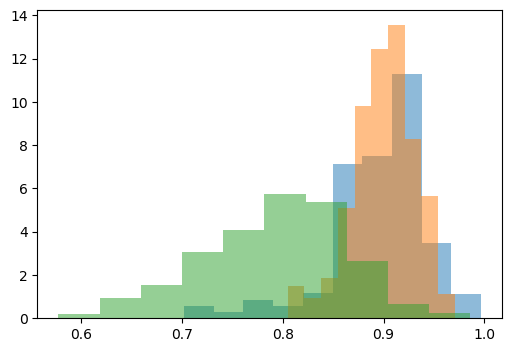

(0.8959666674219842, 0.9001514484332468, 0.7916522074693253)

In [133]:
best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'top_friends', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.75, psi_min=0.1, 
             quant=0.9, top_friends=5)

0.22994741953849762
111
(269, 111)
0.2525752844477946
111
(251, 111)
0.21554281554281543
111
(495, 111)


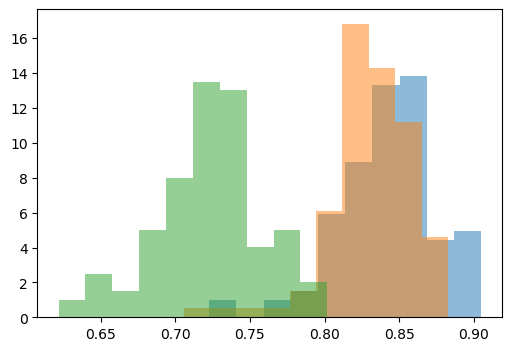

(0.8416240765283342, 0.8299251342859658, 0.7226894854444266)

In [134]:
best_friends_cells(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 5, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.2273088023088023
120
(231, 120)
0.25338888888888894
120
(300, 120)
0.21223051409618582
120
(402, 120)


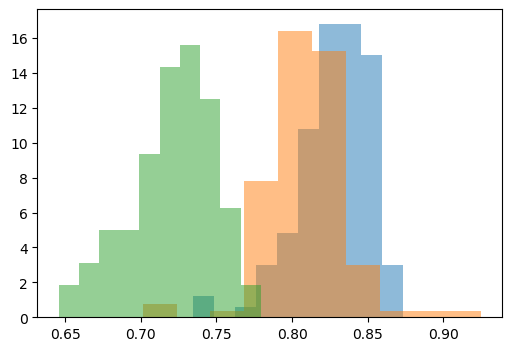

(0.8284240867068476, 0.8085081124514129, 0.721386505732356)

In [135]:
best_friends_cells(chen_PSI, chen_ES, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 5, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.23792653365653552
62
(173, 62)
0.26663472798892796
62
(1515, 62)
0.2513709677419355
62
(400, 62)


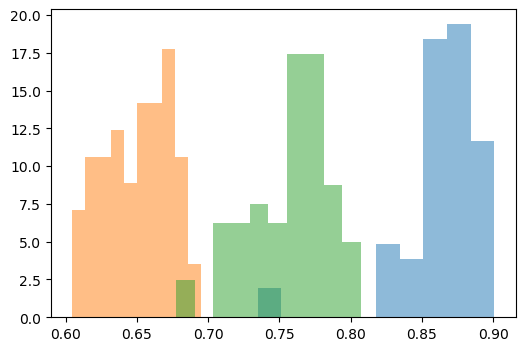

(0.8646488657303791, 0.6501668228121948, 0.7563051708310237)

In [136]:
best_friends_cells(song_PSI, song_iPSC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.3035294117647056
70
(85, 70)
0.3082479784366579
70
(530, 70)
0.29813258636788026
70
(153, 70)


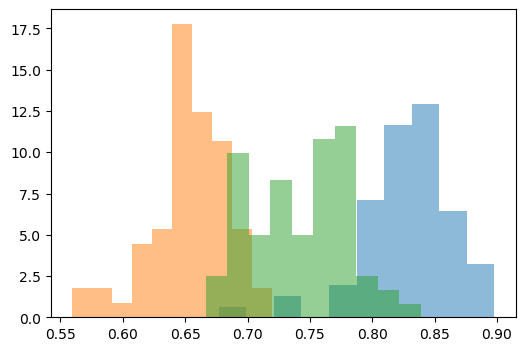

(0.8280424688470428, 0.6528072119754392, 0.7426116818815618)

In [137]:
best_friends_cells(song_PSI, song_NPC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.24970131421744315
27
(93, 27)
0.33131428571428584
70
(375, 70)
0.3244087038789025
70
(151, 70)


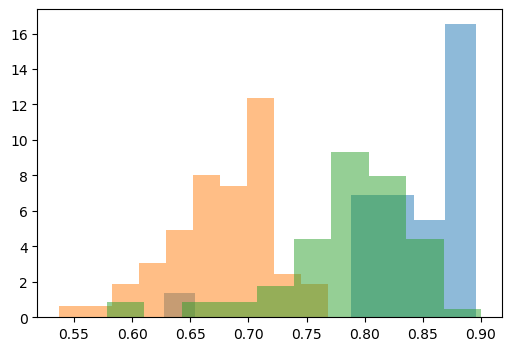

(0.8442624434208854, 0.6774134310186554, 0.7846147061459159)

In [138]:
best_friends_cells(song_PSI, song_MN, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.26153817752178427
488
(222, 488)
0.28332437516796555
488
(122, 488)
0.2556800095495781
488
(412, 488)


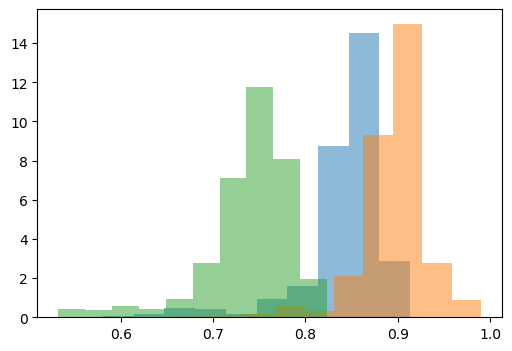

(0.8424747656961571, 0.8958541108494301, 0.740436180081799)

In [139]:
best_friends_cells(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.29791352438411256
195
(204, 195)
0.31800803842760517
202
(606, 202)
0.3247275844902925
202
(358, 202)


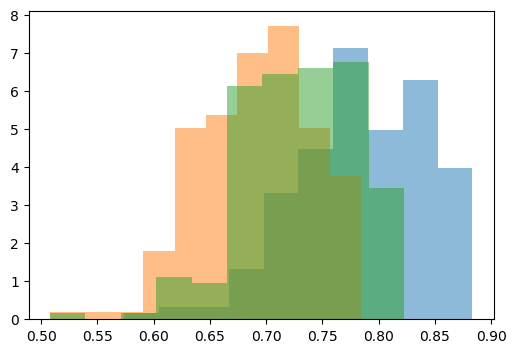

(0.785471565331848, 0.6919854756402379, 0.7288628593791848)

In [140]:
best_friends_cells(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=5, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.2954429083461344
231
(93, 231)
0.2865800865800866
231
(375, 231)
0.2793481028775146
231
(153, 231)


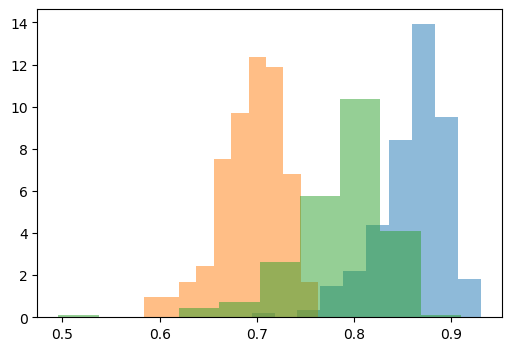

(0.8602665252149845, 0.693923412098178, 0.7868790638636924)

In [141]:
best_friends_cells(trapnell_PSI, trapnell_PSI.columns, trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, trapnell_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.26209041121321824
513
(252, 513)
0.30406901131741293
509
(284, 509)
0.2593026739082301
513
(449, 513)


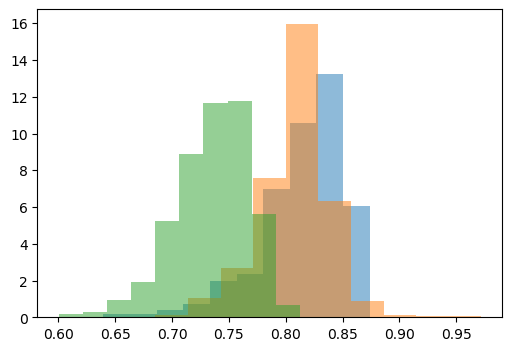

(0.8153889887262075, 0.8081906281050464, 0.7351366546820345)

In [142]:
best_friends_cells(lescroart_PSI, lescroart_PSI.columns, lescroart_mrna_counts, mrna_per_event_lescroart, lescroart_read_counts, lescroart_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=5, read_min = 5, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.3005656819610307
74
(645, 74)
0.3009762750798608
74
(753, 74)
0.29885211916461907
74
(704, 74)


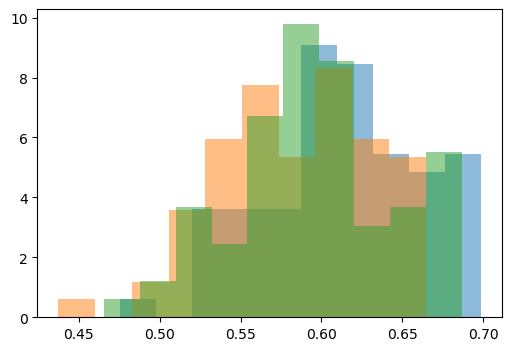

0.30169704588309243
74
(473, 74)
0.3108366987677334
74
(522, 74)
0.29729729729729737
74
(615, 74)


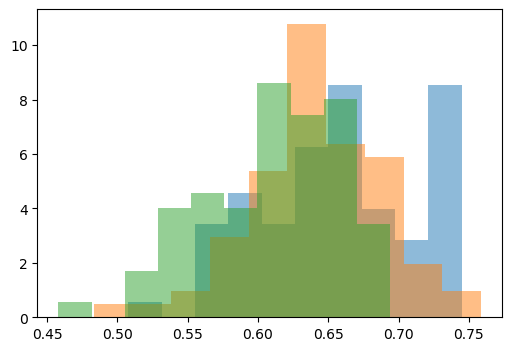

0.30313990461049284
74
(340, 74)
0.3126126126126126
74
(375, 74)
0.29586645468998407
74
(510, 74)


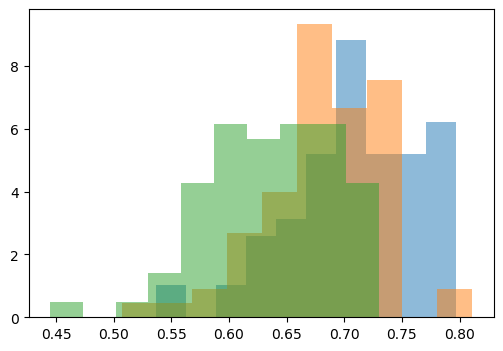

0.30598088582879446
74
(263, 74)
0.31682742813484877
74
(283, 74)
0.2997398807257963
74
(426, 74)


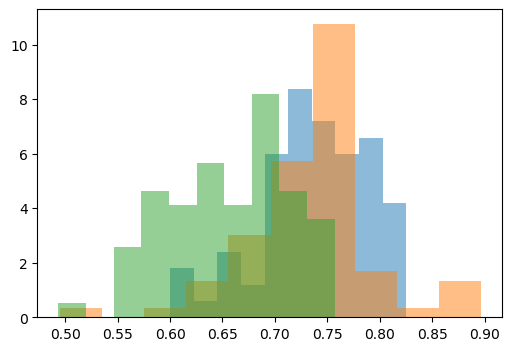

0.3007933306440769
74
(201, 74)
0.3226130060191196
74
(229, 74)
0.2976070626500428
74
(349, 74)


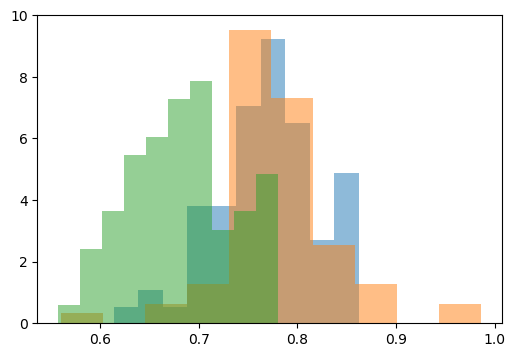

0.3051520270270269
74
(160, 74)
0.3203673286546216
74
(181, 74)
0.29317211948790906
74
(285, 74)


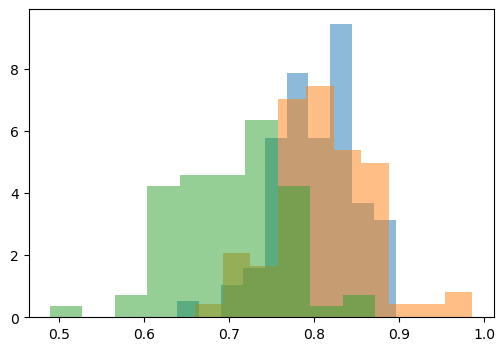

0.29675675675675683
74
(125, 74)
0.30835197613721094
72
(149, 72)
0.2986595466434176
74
(248, 74)


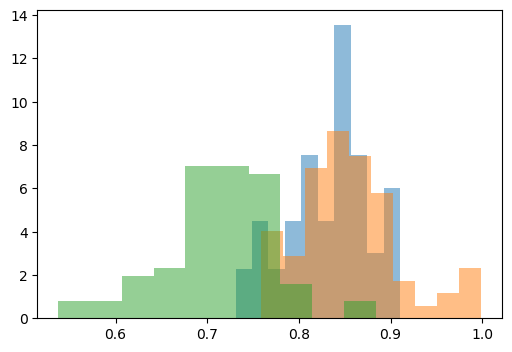

0.2975546975546974
74
(105, 74)
0.2958900946663588
71
(122, 71)
0.29625779625779625
74
(208, 74)


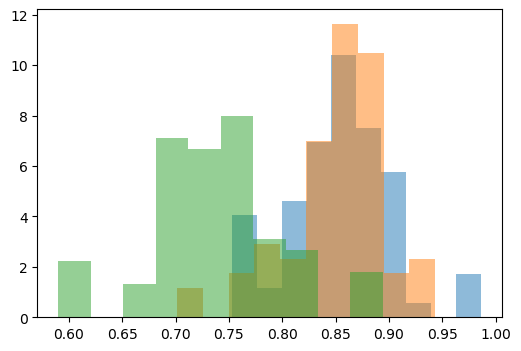

0.2969936228363194
74
(89, 74)
0.2859903381642511
69
(105, 69)
0.28203497615262313
74
(170, 74)


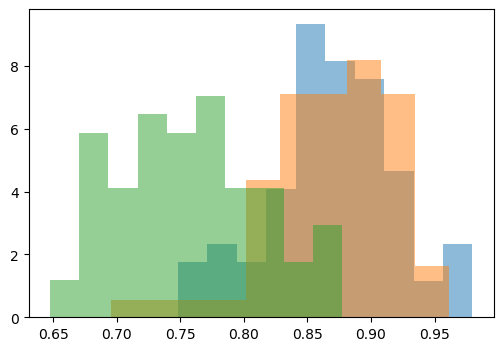

0.2942745376955902
74
(76, 74)
0.2824586743700851
67
(93, 67)
0.2921328972284387
74
(157, 74)


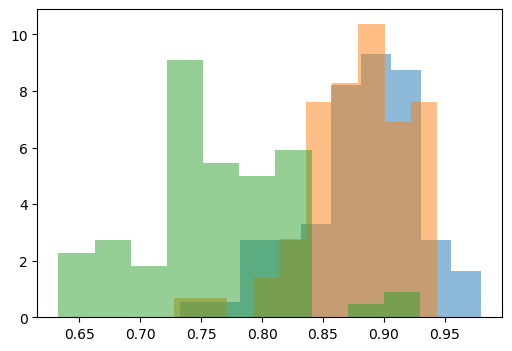

0.310049486105824
74
(71, 74)
0.2329059829059829
52
(81, 52)
0.2926948687818254
74
(138, 74)


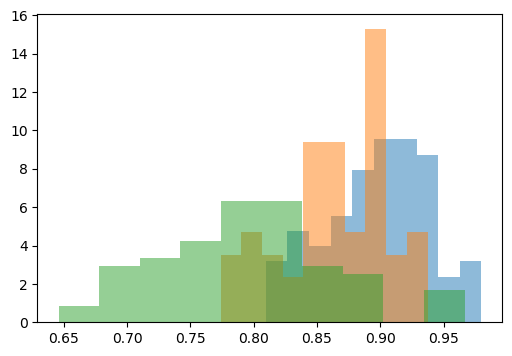

0.30698198198198207
74
(60, 74)
nan
0
(74, 0)
0.2875809693991512
74
(121, 74)


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


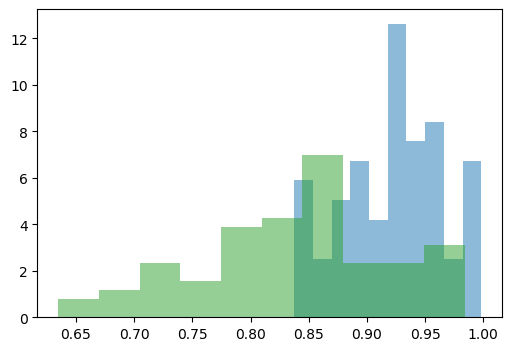

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.30301455301455305
74
(52, 74)
nan
0
(66, 0)
0.2915943466402181
74
(109, 74)


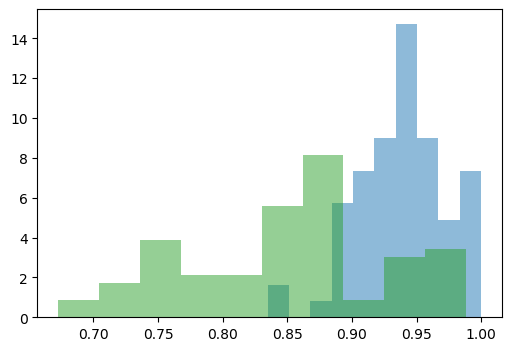

0.31784909909909914
74
(48, 74)
nan
0
(62, 0)
0.2993243243243244
74
(100, 74)


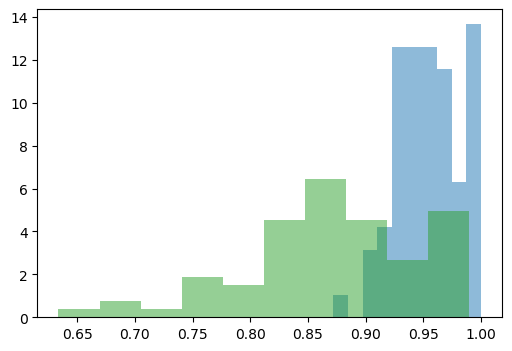

In [143]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])

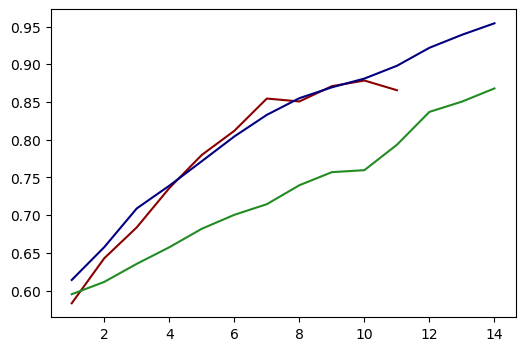

In [144]:
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

0.24674537174537176
111
(728, 111)
0.2502963489805595
111
(760, 111)
0.2493659879718861
111
(746, 111)


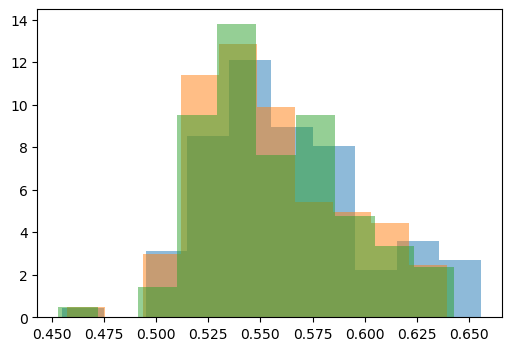

0.23457447595378628
111
(609, 111)
0.24848053795422226
111
(418, 111)
0.2410857882555995
111
(689, 111)


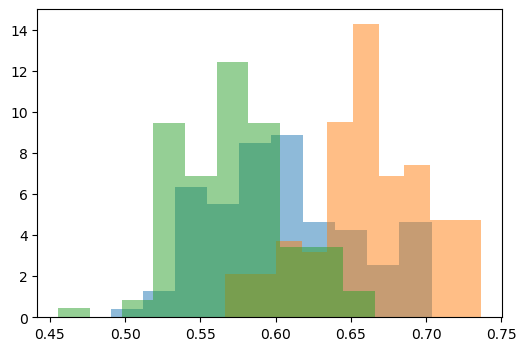

0.22832325996882952
111
(474, 111)
0.26442067067067065
111
(288, 111)
0.23671064429358277
111
(633, 111)


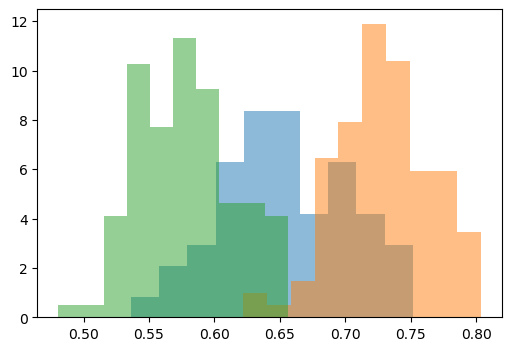

0.2290350051544081
111
(402, 111)
0.2686164425294859
111
(207, 111)
0.23026013711426718
111
(569, 111)


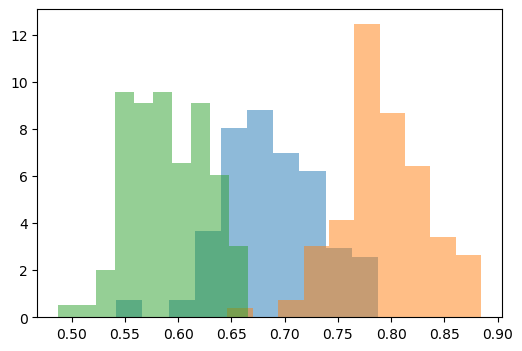

0.2392074155079937
111
(346, 111)
0.25727069351230425
111
(149, 111)
0.22184239575543924
111
(506, 111)


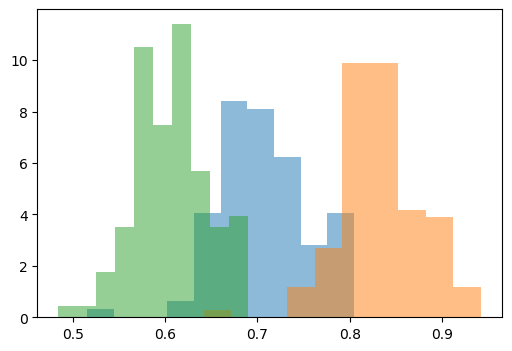

0.24145378254967298
111
(292, 111)
0.25377920293174555
111
(118, 111)
0.22545573291841942
111
(469, 111)


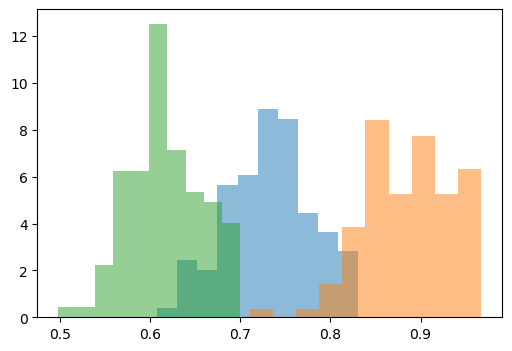

0.24363649363649362
111
(252, 111)
0.23553838725253493
109
(95, 109)
0.22388977212506622
111
(425, 111)


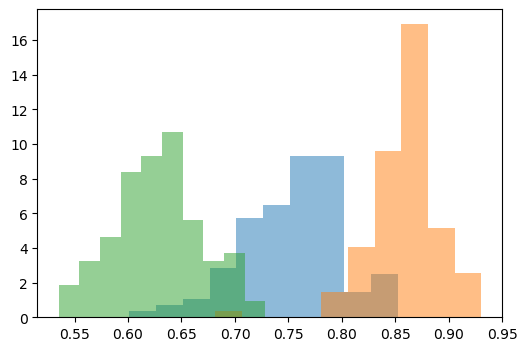

0.23079211286758466
111
(212, 111)
0.24382716049382722
108
(84, 108)
0.21948580434220114
111
(383, 111)


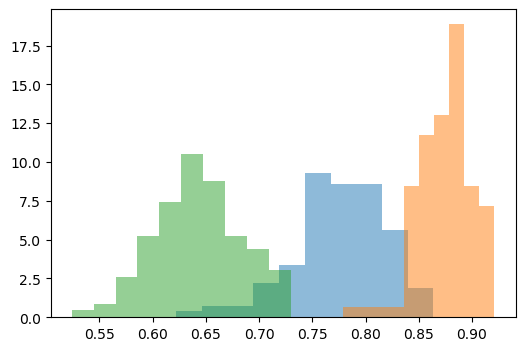

0.22662234426940311
111
(187, 111)
0.2553272450532724
108
(73, 108)
0.21057900005268426
111
(342, 111)


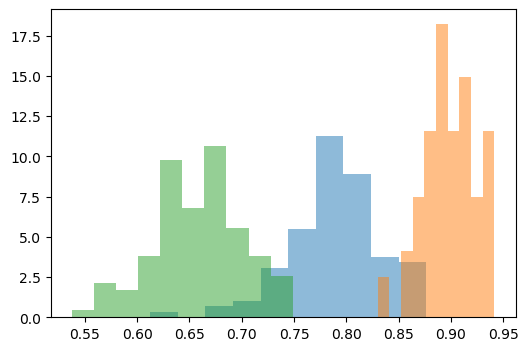

0.2313384813384814
111
(168, 111)
0.2524707996406107
106
(63, 106)
0.21660791226008608
111
(322, 111)


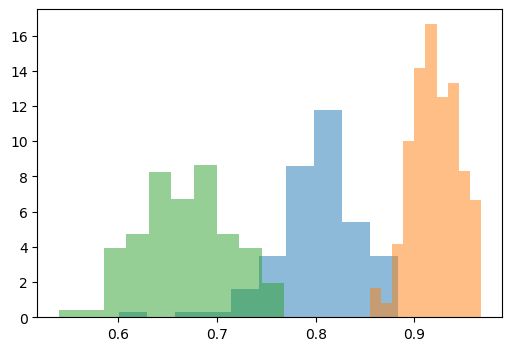

0.21954831543872633
111
(146, 111)
0.21250971250971248
99
(52, 99)
0.2149683467251036
111
(296, 111)


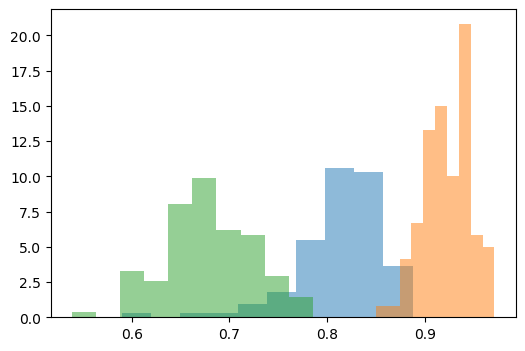

0.21328146328146327
111
(132, 111)
nan
0
(47, 0)
0.21147814481147822
111
(270, 111)


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


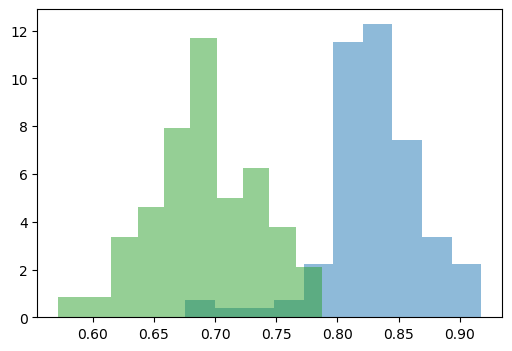

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.2076652924110552
111
(118, 111)
nan
0
(41, 0)
0.20074582779500819
111
(244, 111)


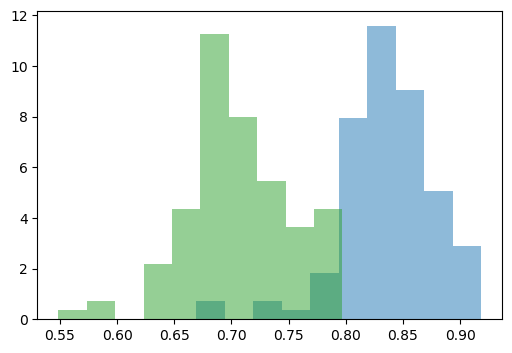

0.21158996834672514
111
(111, 111)
nan
0
(39, 0)
0.20827607268285236
111
(236, 111)


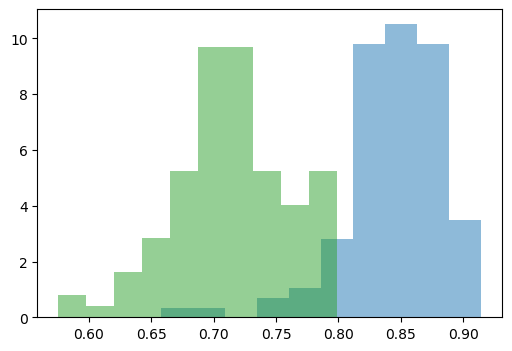

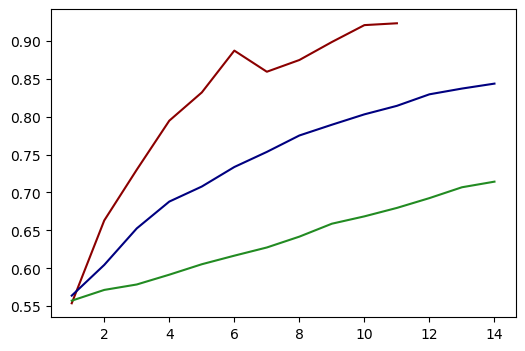

In [145]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

0.33372781065088764
70
(169, 70)
0.34472591362126237
70
(344, 70)
0.34368358913813474
70
(242, 70)


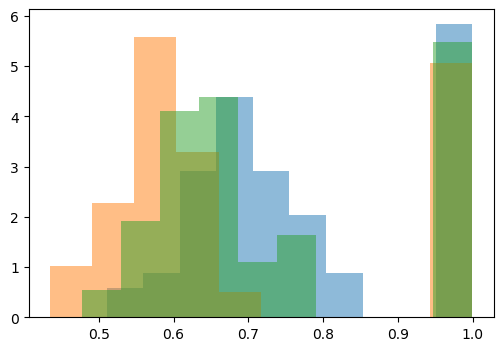

0.3351145038167939
70
(131, 70)
0.34525407478427617
70
(298, 70)
0.3374079528718704
70
(194, 70)


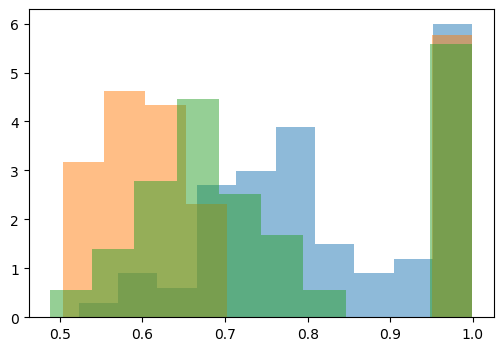

0.33577981651376154
70
(109, 70)
0.3428036383092562
70
(267, 70)
0.33468158347676424
70
(166, 70)


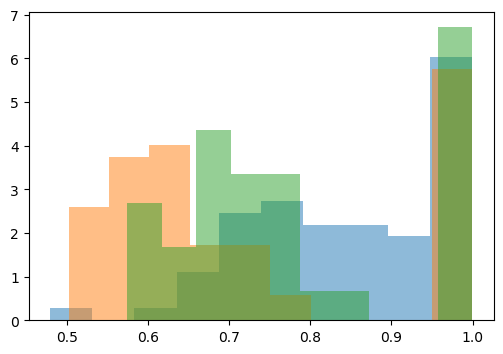

0.3390577507598785
70
(94, 70)
0.3405048766494549
70
(249, 70)
0.33586005830903803
70
(147, 70)


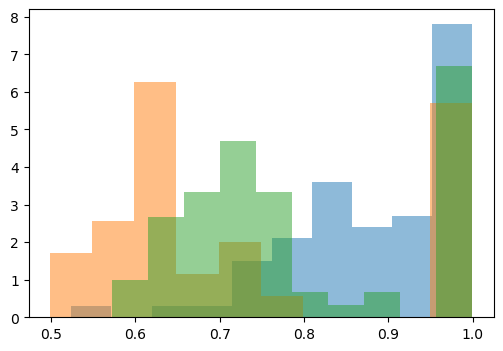

0.34387755102040807
70
(84, 70)
0.3368742368742368
70
(234, 70)
0.3386680988184746
70
(133, 70)


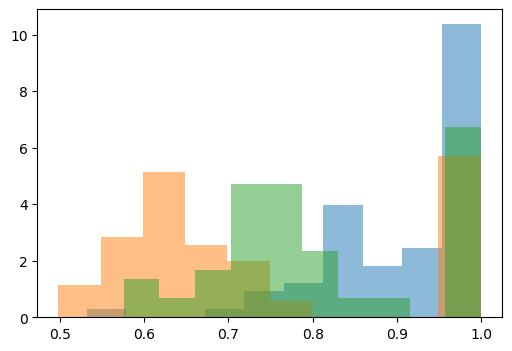

0.3562271062271063
70
(78, 70)
0.33679846938775515
70
(224, 70)
0.3363858363858361
70
(117, 70)


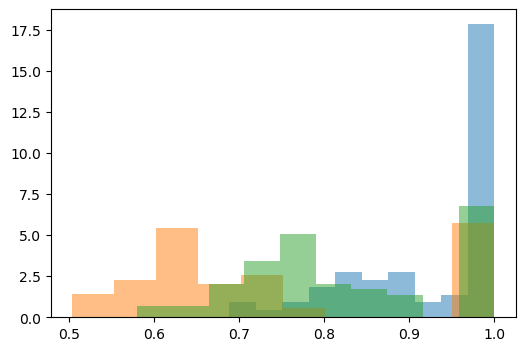

0.35527950310558987
70
(69, 70)
0.33511348464619484
70
(214, 70)
0.3200577200577201
70
(99, 70)


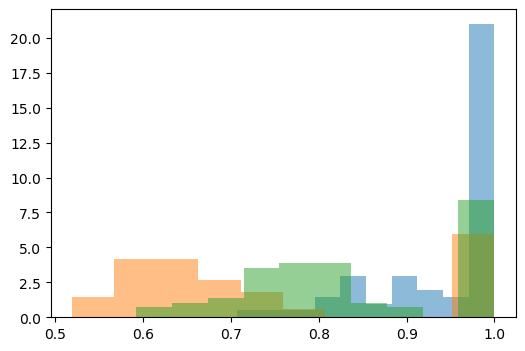

0.3065913370998116
45
(59, 45)
0.3333797909407665
70
(205, 70)
0.32624223602484476
70
(92, 70)


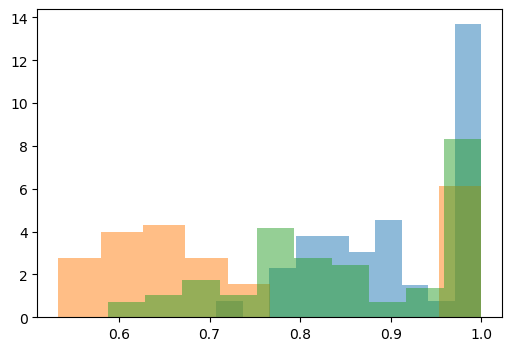

0.19331983805668015
19
(52, 19)
0.33435714285714285
70
(200, 70)
0.3337815126050418
70
(85, 70)


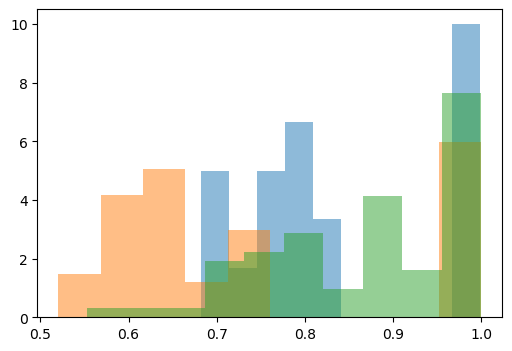

0.20345744680851063
16
(47, 16)
0.3386934673366835
70
(199, 70)
0.34494773519163763
70
(82, 70)


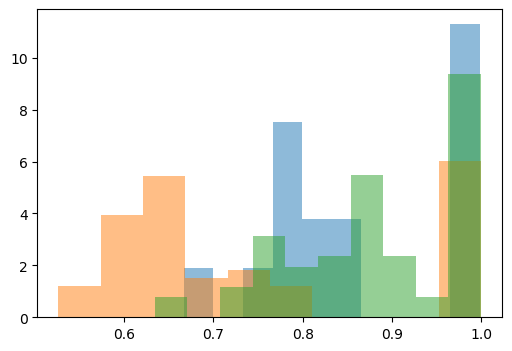

nan
0
(45, 0)
0.3371576609918583
70
(193, 70)
0.3517625231910945
70
(77, 70)


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


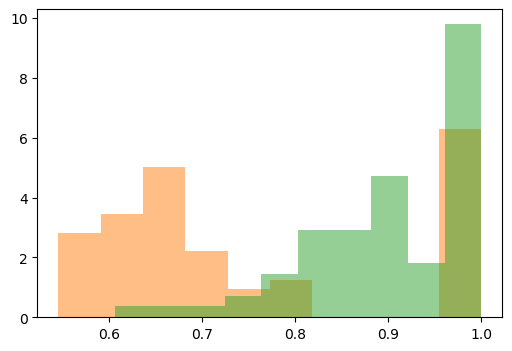

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan
0
(38, 0)
0.33847316704459557
70
(189, 70)
0.35907335907335913
70
(74, 70)


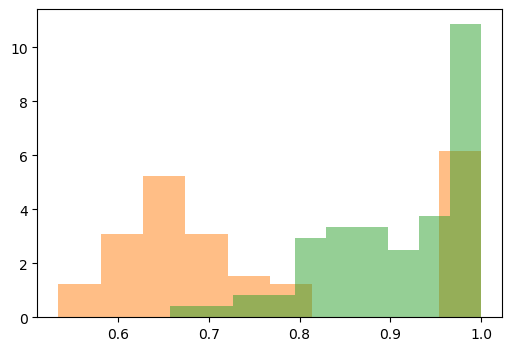

nan
0
(35, 0)
0.3383540372670807
70
(184, 70)
0.3686507936507937
70
(72, 70)


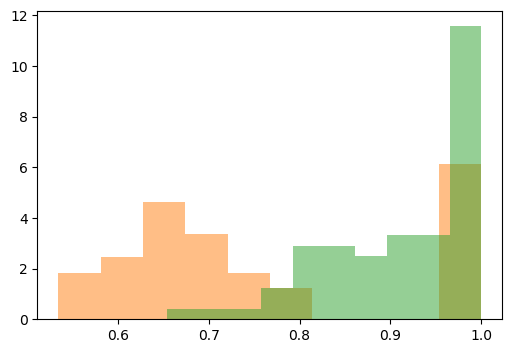

nan
0
(33, 0)
0.3412177985948478
70
(183, 70)
0.37230769230769195
70
(65, 70)


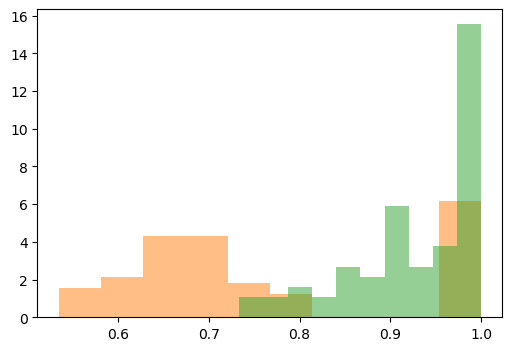

In [146]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(song_PSI, song_MN, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])

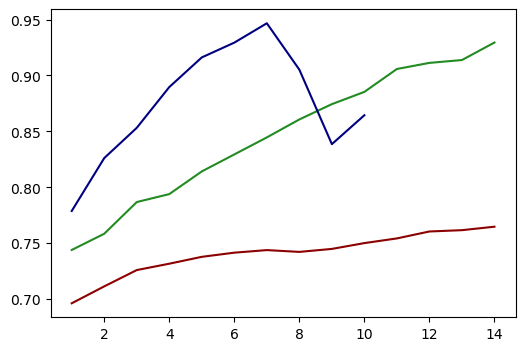

In [147]:
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

0.2619055842082643
488
(1068, 488)
0.26889567302330725
488
(1176, 488)
0.2672501415731316
488
(1129, 488)


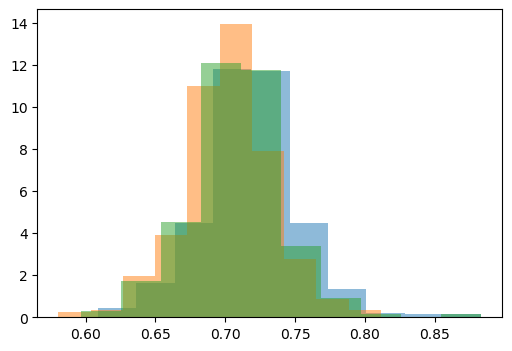

0.26079723999545673
488
(866, 488)
0.2695692410272919
488
(713, 488)
0.2607259261649671
488
(1016, 488)


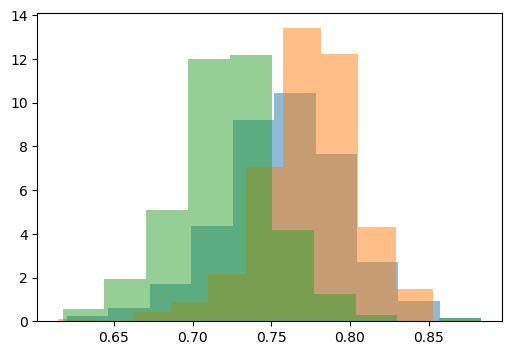

0.26033643979816046
488
(679, 488)
0.2820584656762295
488
(512, 488)
0.257524298400773
488
(899, 488)


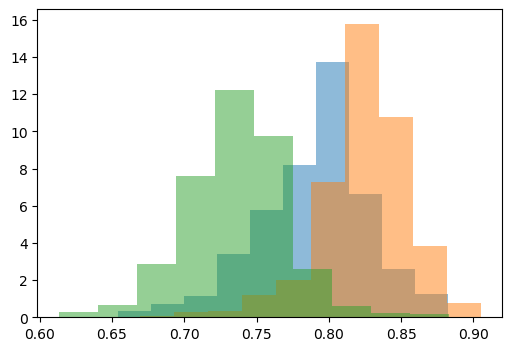

0.26496776734146216
488
(562, 488)
0.28012625594923296
488
(372, 488)
0.25397613797120744
488
(788, 488)


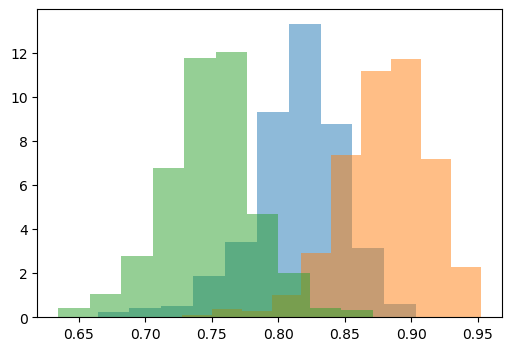

0.26592771982116237
488
(462, 488)
0.2804673269581055
488
(288, 488)
0.2537989102353329
488
(698, 488)


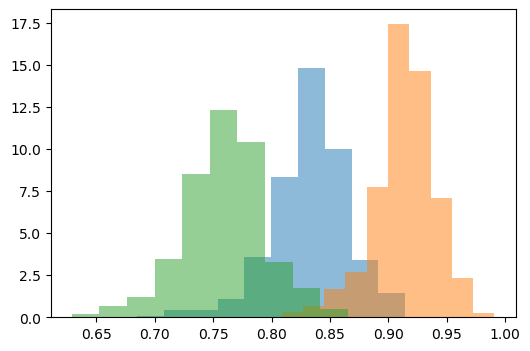

0.2601969822150714
488
(377, 488)
0.27739100866203736
488
(229, 488)
0.2546509486093202
488
(623, 488)


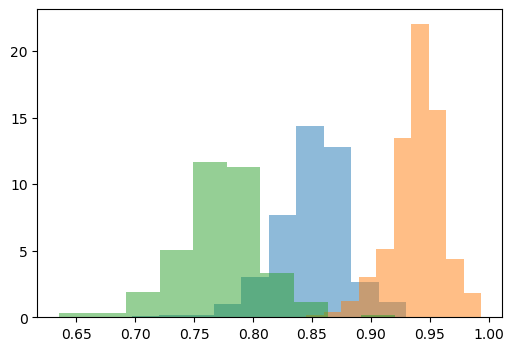

0.26007566204287536
488
(325, 488)
0.28295588980902486
488
(194, 488)
0.2536516024220943
488
(555, 488)


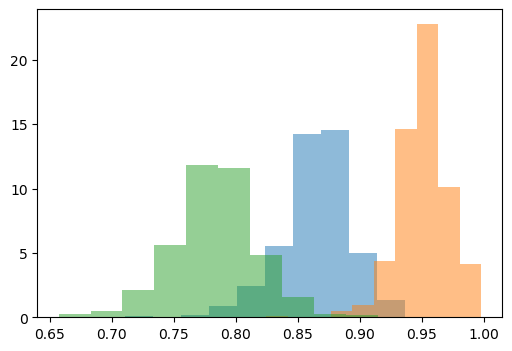

0.26066292781133144
488
(285, 488)
0.2829251734888866
488
(163, 488)
0.2550739664293646
488
(502, 488)


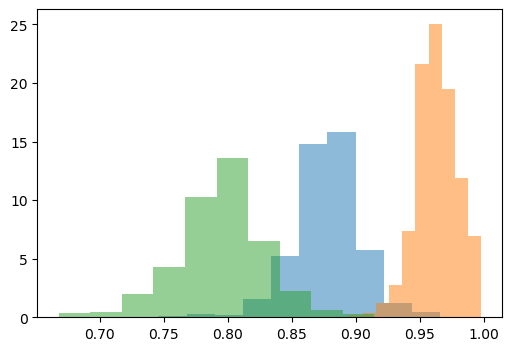

0.26486865883567845
488
(254, 488)
0.27935673556664303
488
(138, 488)
0.2557322885823643
488
(454, 488)


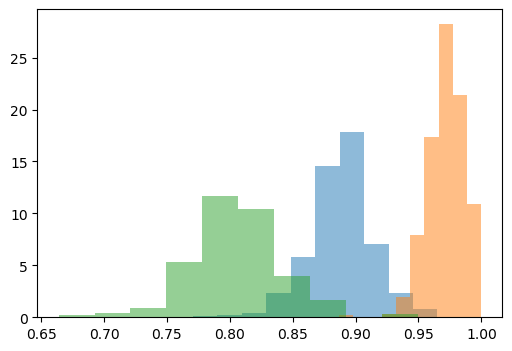

0.26153817752178427
488
(222, 488)
0.28332437516796555
488
(122, 488)
0.2556800095495781
488
(412, 488)


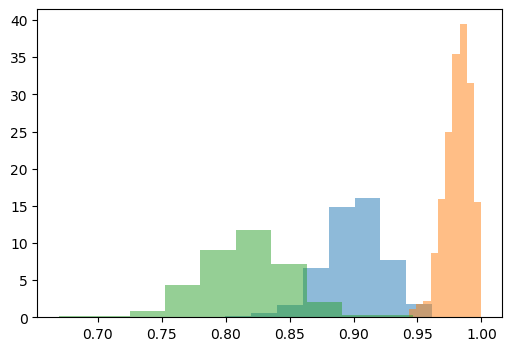

0.2584451068057626
488
(198, 488)
0.2802162244470668
482
(109, 482)
0.24967056774020605
488
(367, 488)


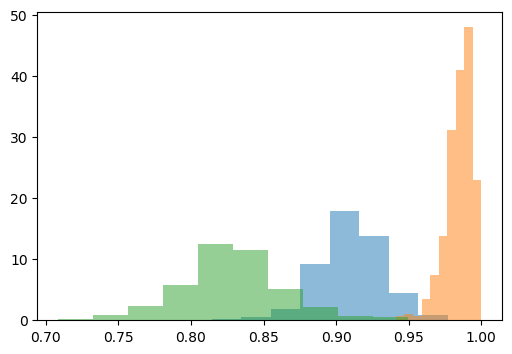

0.25976775956284137
488
(180, 488)
0.24995390855457225
452
(96, 452)
0.2498302454166264
488
(338, 488)


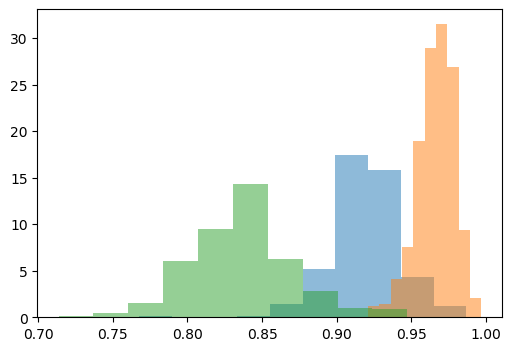

0.25572752265553417
488
(161, 488)
0.25091724419078654
446
(88, 446)
0.24688312377314453
488
(309, 488)


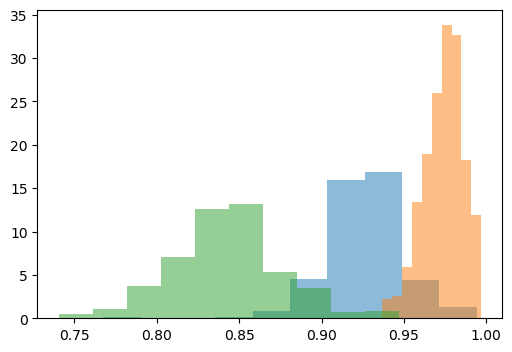

0.2527369189310577
488
(146, 488)
nan
0
(80, 0)
0.2542575875055384
488
(296, 488)


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


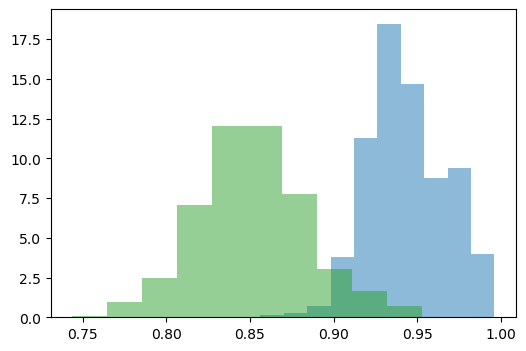

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


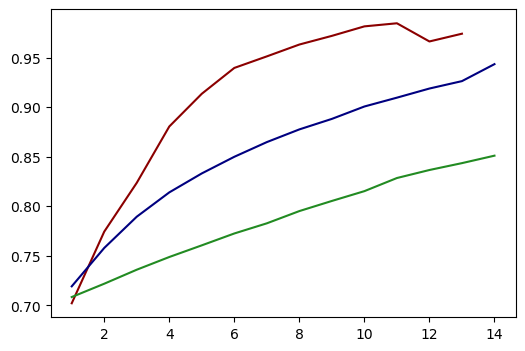

In [148]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

0.3170280493602597
202
(479, 202)
0.3149561652200462
202
(908, 202)
0.3201395482013954
202
(657, 202)


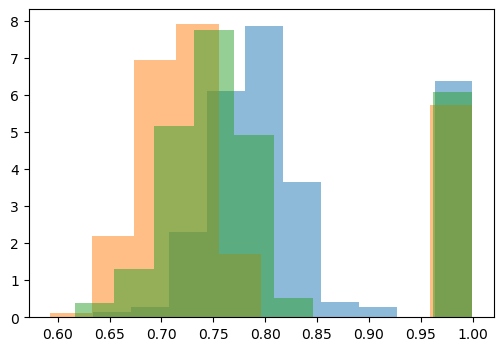

0.315163131912077
202
(359, 202)
0.3175354300135898
202
(816, 202)
0.31430477013545777
202
(527, 202)


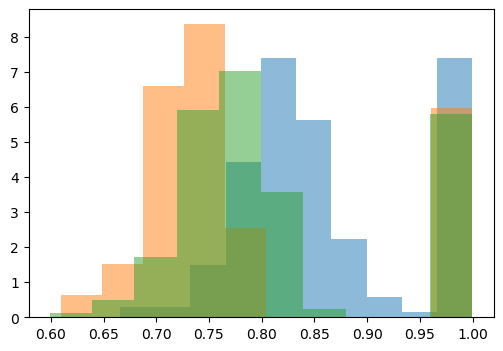

0.31438195365928323
202
(291, 202)
0.3204070407040704
202
(774, 202)
0.3153846153846152
202
(455, 202)


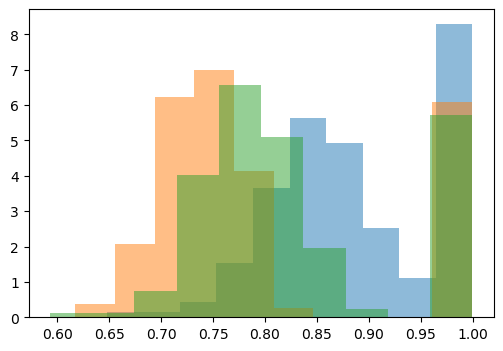

0.3139184288799251
202
(243, 202)
0.3219820636168597
202
(743, 202)
0.31754067366535654
202
(398, 202)


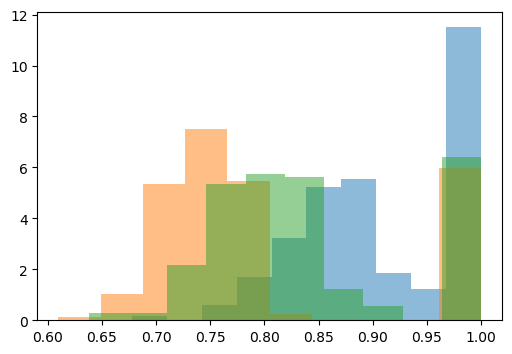

0.29791352438411256
195
(204, 195)
0.32135048947932787
202
(711, 202)
0.3247275844902925
202
(358, 202)


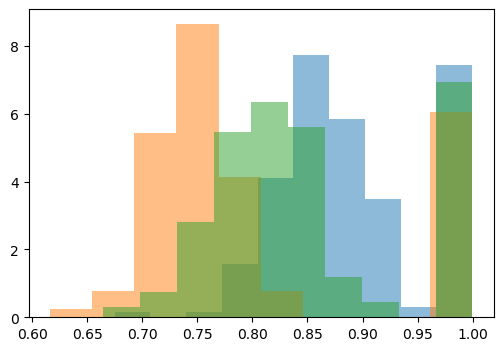

0.30368502171780853
195
(183, 195)
0.3187357197258186
202
(676, 202)
0.31694796996478186
202
(298, 202)


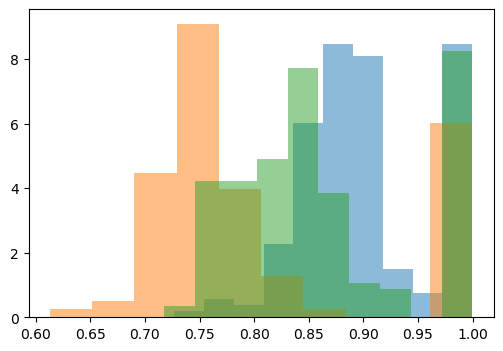

0.29282251548612986
188
(158, 188)
0.31822991459451294
202
(655, 202)
0.31681278814904384
202
(262, 202)


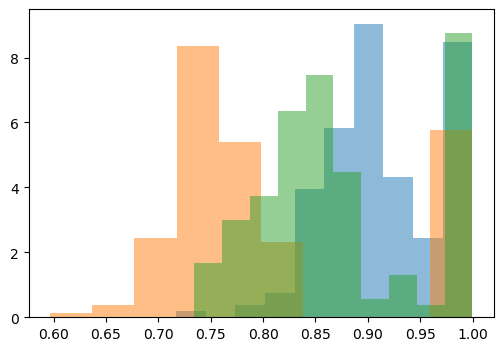

nan
0
(138, 0)
0.3173087450925188
202
(633, 202)
0.3063509053608064
202
(222, 202)


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


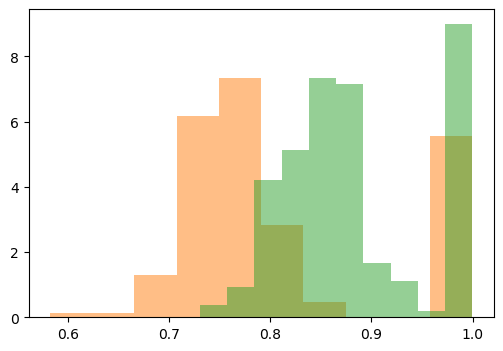

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan
0
(120, 0)
0.3164775014086776
202
(615, 202)
0.3079549334243769
202
(203, 202)


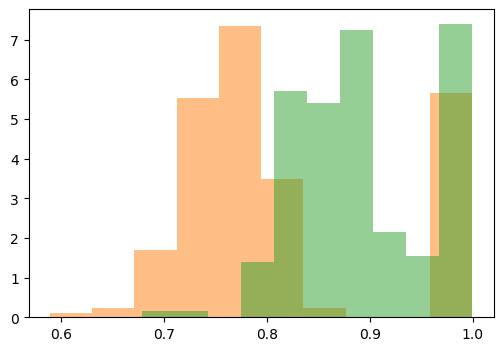

nan
0
(106, 0)
0.31800803842760517
202
(606, 202)
0.2997552564245189
202
(178, 202)


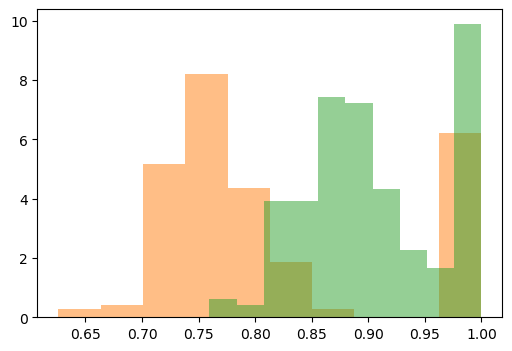

nan
0
(94, 0)
0.31822348901556824
202
(594, 202)
0.29399752475247515
202
(160, 202)


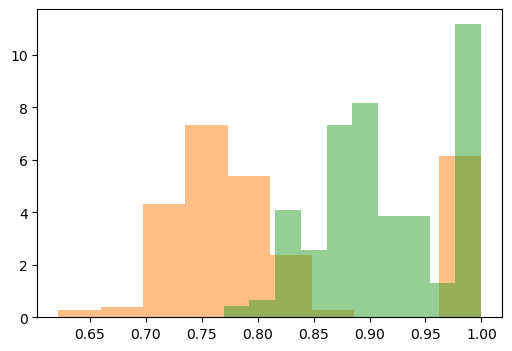

nan
0
(86, 0)
0.31631600660065995
202
(576, 202)
0.29598059143662725
202
(151, 202)


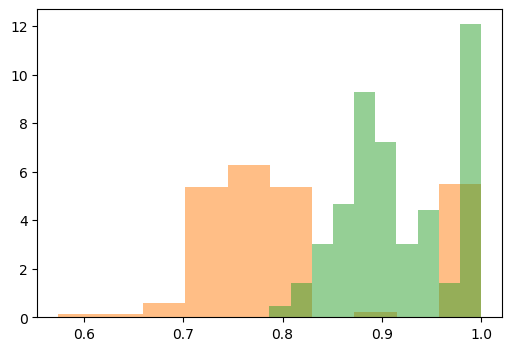

nan
0
(75, 0)
0.31569535957154443
202
(562, 202)
0.29835448333565734
202
(142, 202)


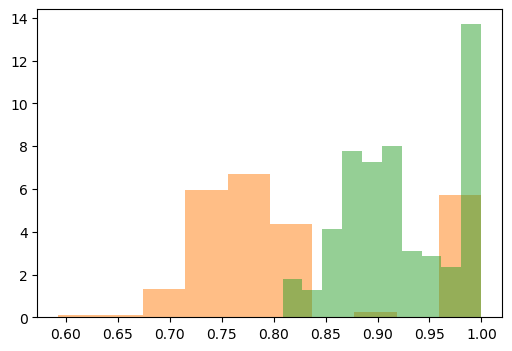

nan
0
(70, 0)
0.31643850305608195
202
(554, 202)
0.2918843065408902
202
(127, 202)


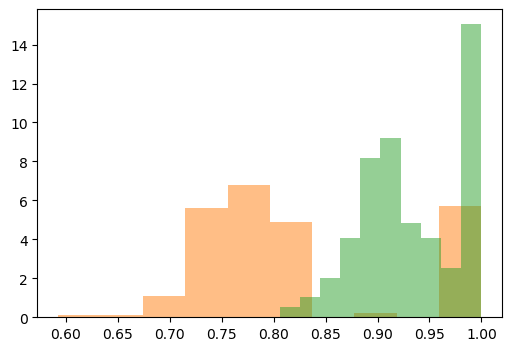

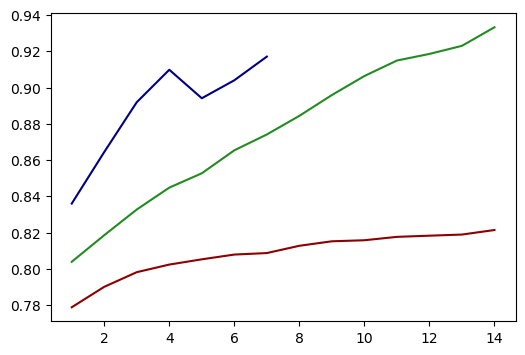

In [149]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

0.2619055842082643
488
(1068, 488)
0.26889567302330725
488
(1176, 488)
0.2672501415731316
488
(1129, 488)


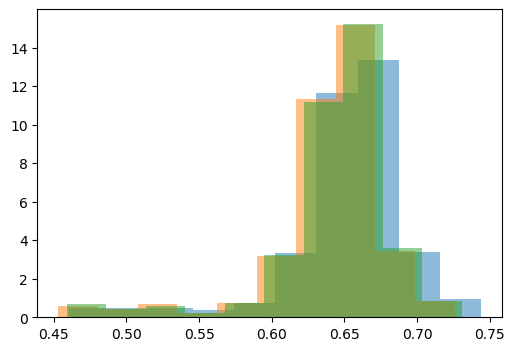

0.26079723999545673
488
(866, 488)
0.2695692410272919
488
(713, 488)
0.2607259261649671
488
(1016, 488)


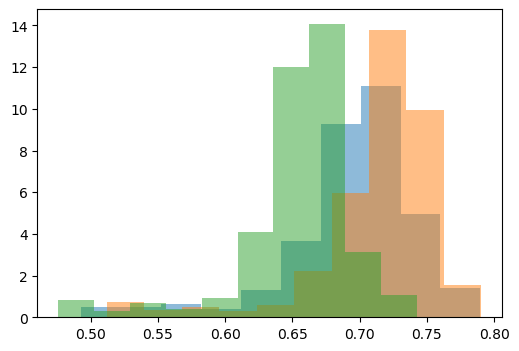

0.26033643979816046
488
(679, 488)
0.2820584656762295
488
(512, 488)
0.257524298400773
488
(899, 488)


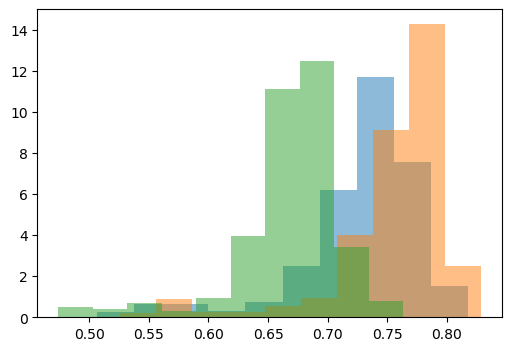

0.26496776734146216
488
(562, 488)
0.28012625594923296
488
(372, 488)
0.25397613797120744
488
(788, 488)


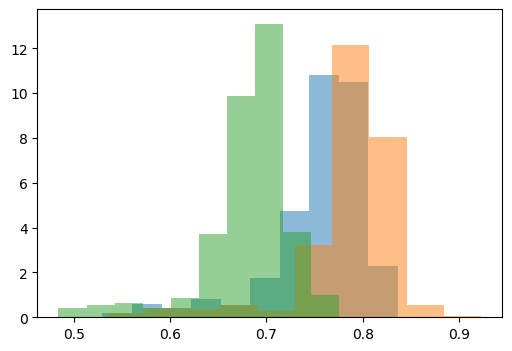

0.26592771982116237
488
(462, 488)
0.2804673269581055
488
(288, 488)
0.2537989102353329
488
(698, 488)


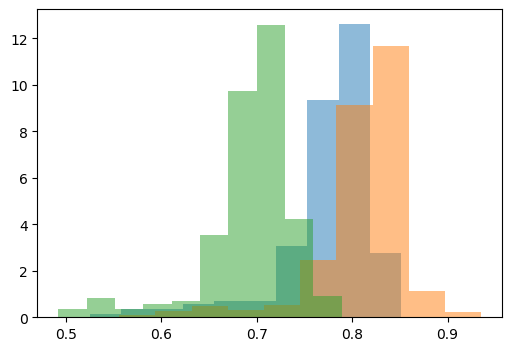

0.2601969822150714
488
(377, 488)
0.27739100866203736
488
(229, 488)
0.2546509486093202
488
(623, 488)


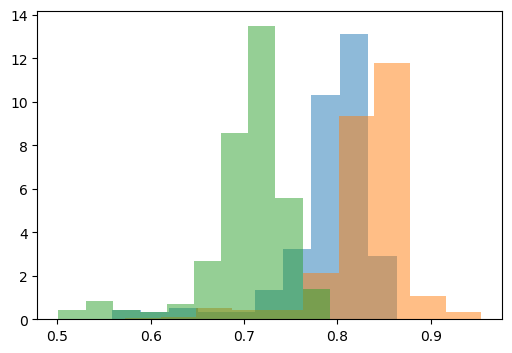

0.26007566204287536
488
(325, 488)
0.28295588980902486
488
(194, 488)
0.2536516024220943
488
(555, 488)


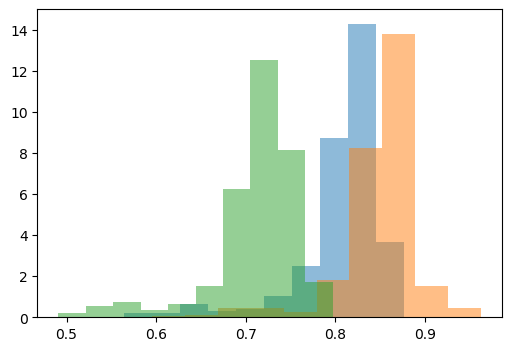

0.26066292781133144
488
(285, 488)
0.2829251734888866
488
(163, 488)
0.2550739664293646
488
(502, 488)


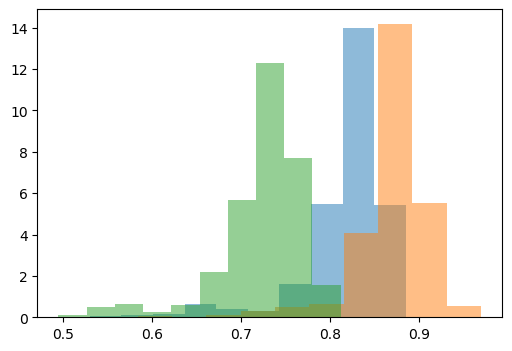

0.26486865883567845
488
(254, 488)
0.27935673556664303
488
(138, 488)
0.2557322885823643
488
(454, 488)


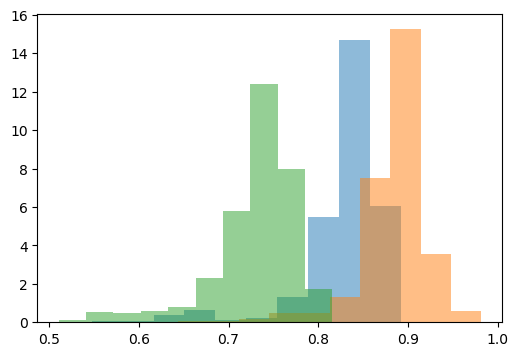

0.26153817752178427
488
(222, 488)
0.28332437516796555
488
(122, 488)
0.2556800095495781
488
(412, 488)


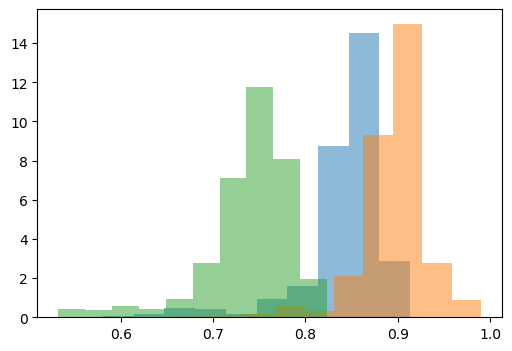

0.2584451068057626
488
(198, 488)
0.2802162244470668
482
(109, 482)
0.24967056774020605
488
(367, 488)


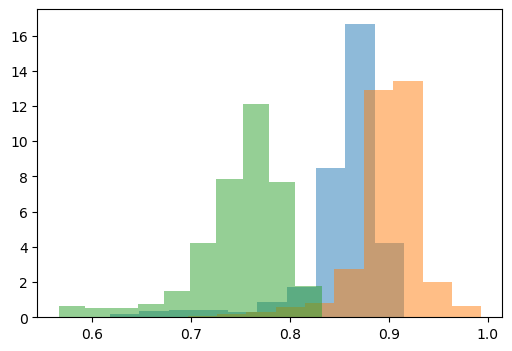

0.25976775956284137
488
(180, 488)
0.24995390855457225
452
(96, 452)
0.2498302454166264
488
(338, 488)


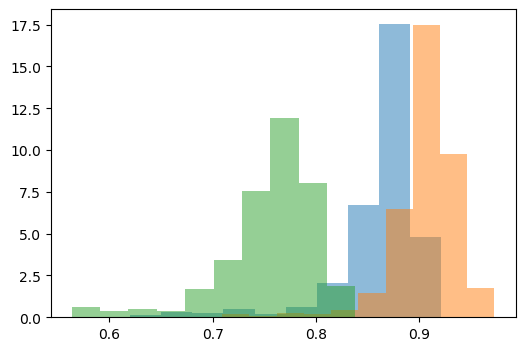

0.25572752265553417
488
(161, 488)
0.25091724419078654
446
(88, 446)
0.24688312377314453
488
(309, 488)


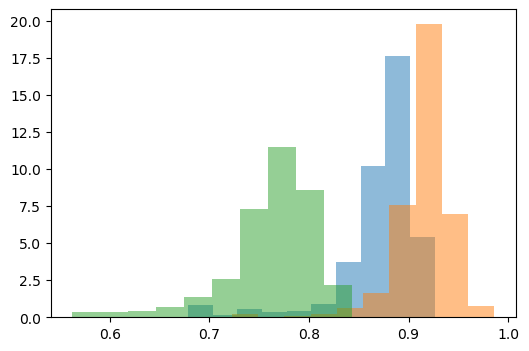

0.2527369189310577
488
(146, 488)
nan
0
(80, 0)
0.2542575875055384
488
(296, 488)


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


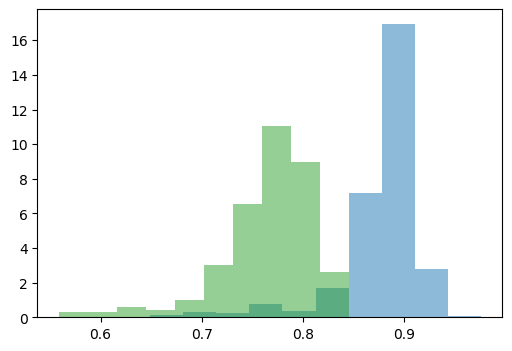

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


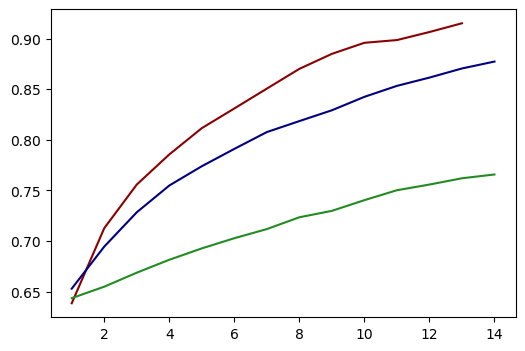

In [150]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

0.3170280493602597
202
(479, 202)
0.3149561652200462
202
(908, 202)
0.3201395482013954
202
(657, 202)


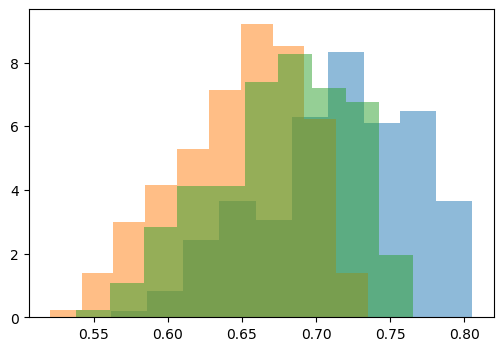

0.315163131912077
202
(359, 202)
0.3175354300135898
202
(816, 202)
0.31430477013545777
202
(527, 202)


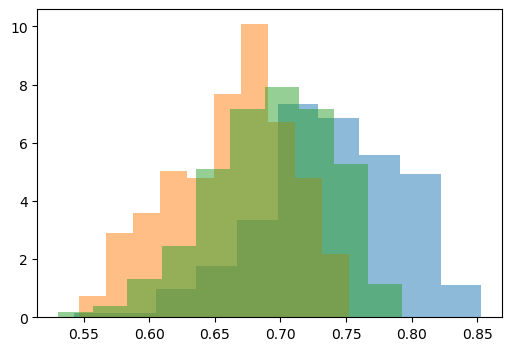

0.31438195365928323
202
(291, 202)
0.3204070407040704
202
(774, 202)
0.3153846153846152
202
(455, 202)


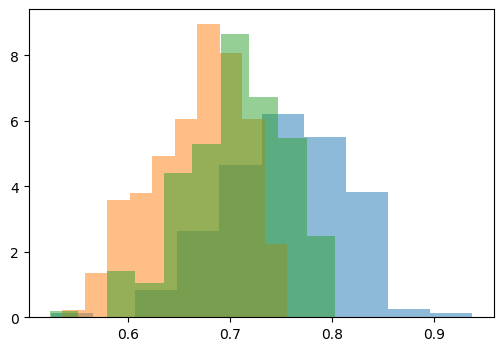

0.3139184288799251
202
(243, 202)
0.3219820636168597
202
(743, 202)
0.31754067366535654
202
(398, 202)


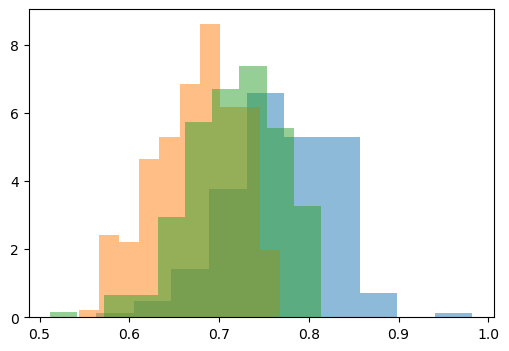

0.29791352438411256
195
(204, 195)
0.32135048947932787
202
(711, 202)
0.3247275844902925
202
(358, 202)


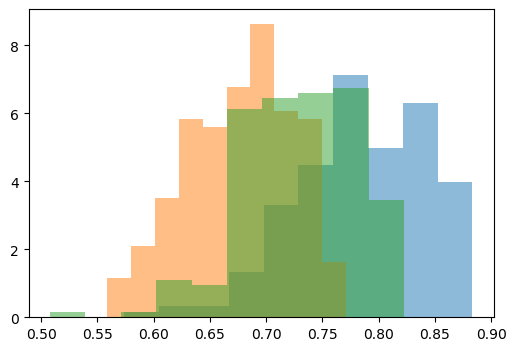

0.30368502171780853
195
(183, 195)
0.3187357197258186
202
(676, 202)
0.31694796996478186
202
(298, 202)


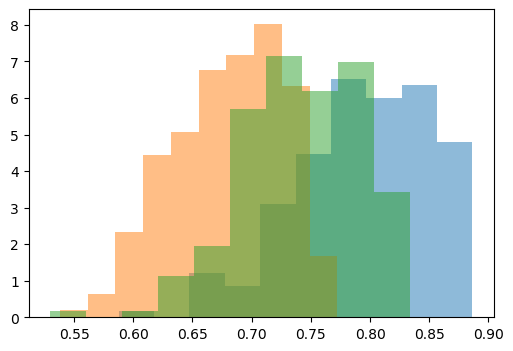

0.29282251548612986
188
(158, 188)
0.31822991459451294
202
(655, 202)
0.31681278814904384
202
(262, 202)


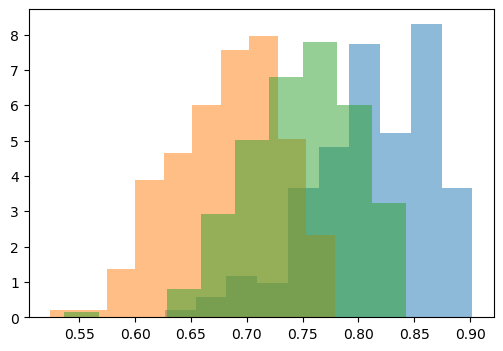

nan
0
(138, 0)
0.3173087450925188
202
(633, 202)
0.3063509053608064
202
(222, 202)


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


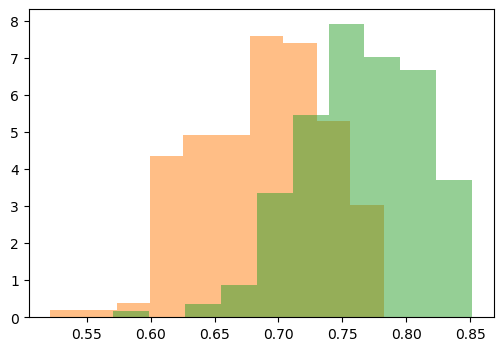

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan
0
(120, 0)
0.3164775014086776
202
(615, 202)
0.3079549334243769
202
(203, 202)


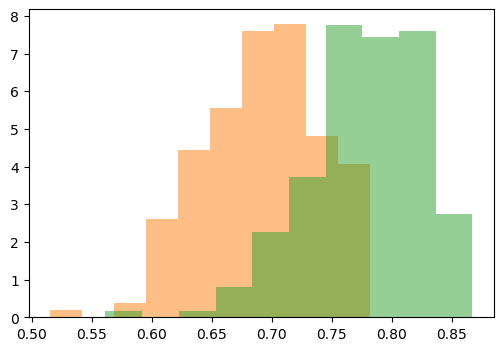

nan
0
(106, 0)
0.31800803842760517
202
(606, 202)
0.2997552564245189
202
(178, 202)


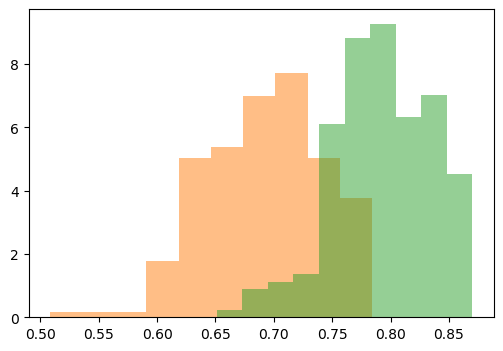

nan
0
(94, 0)
0.31822348901556824
202
(594, 202)
0.29399752475247515
202
(160, 202)


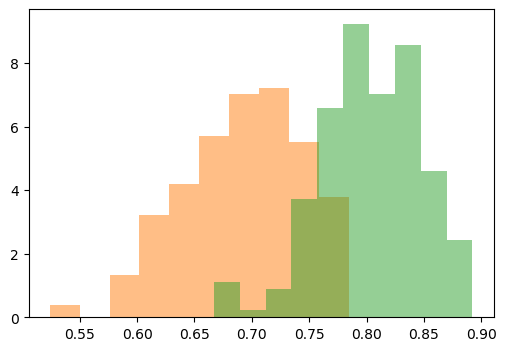

nan
0
(86, 0)
0.31631600660065995
202
(576, 202)
0.29598059143662725
202
(151, 202)


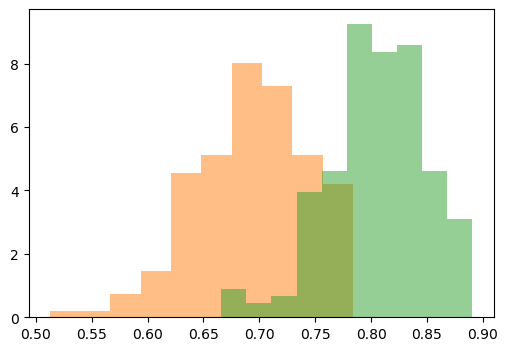

nan
0
(75, 0)
0.31569535957154443
202
(562, 202)
0.29835448333565734
202
(142, 202)


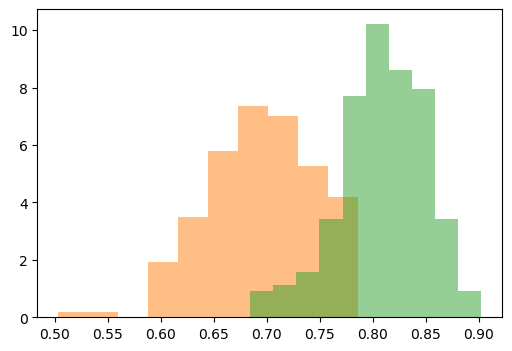

nan
0
(70, 0)
0.31643850305608195
202
(554, 202)
0.2918843065408902
202
(127, 202)


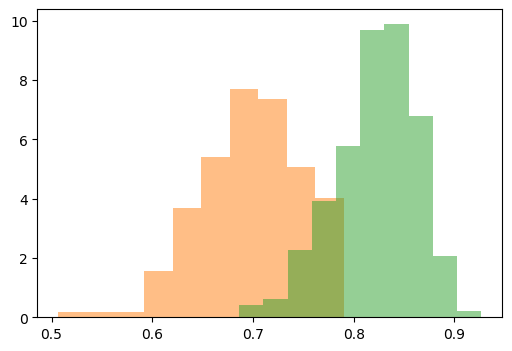

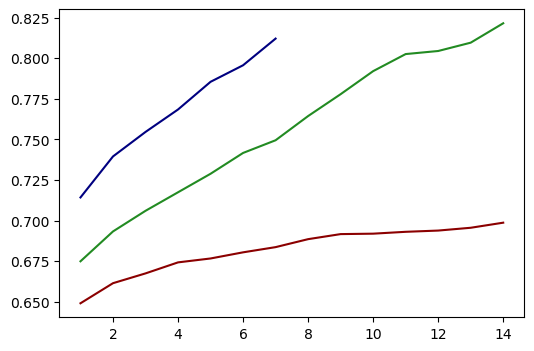

In [151]:
both_song = []
read_song = []
mrna_song = []
for limite in range(1, 15):
    output = best_friends_cells(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both_song.append(output[0])
    read_song.append(output[1])
    mrna_song.append(output[2])
    
    
plt.plot(range(1, 15), read_song, color = 'darkred')
plt.plot(range(1, 15), mrna_song, color = 'forestgreen')
plt.plot(range(1, 15), both_song, color = 'navy')
plt.show()

0.26497600441688596
772
0.27133087593365046
845
0.2700212507589559
810


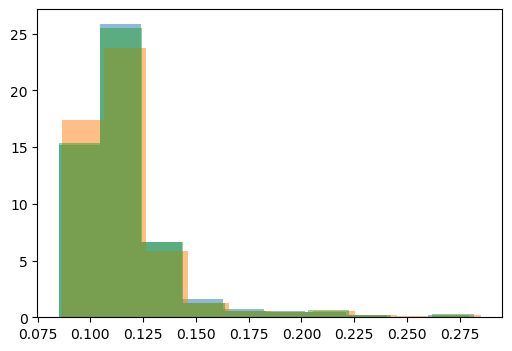

0.263946080335638
633
0.2751647004749505
535
0.2626929810600032
721


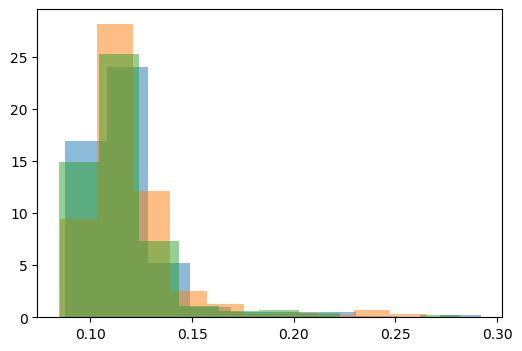

0.26371469484495363
498
0.28680622866534616
389
0.2597725150446151
632


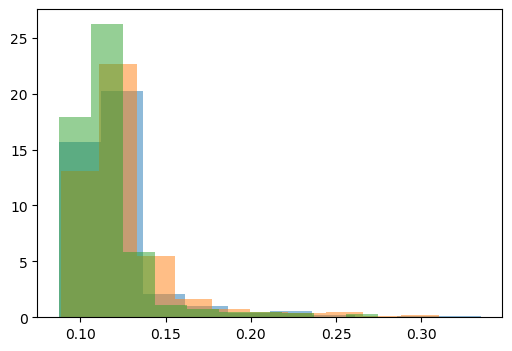

0.2678253999604981
415
0.28380793011515115
289
0.25535105300945315
548


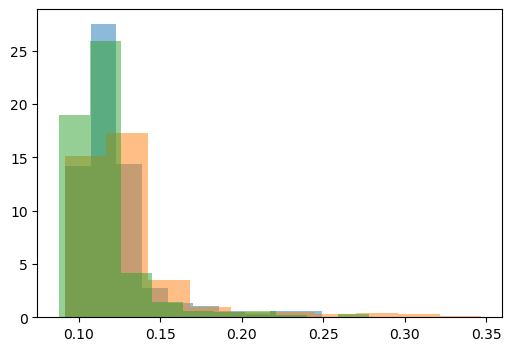

0.2690722261819911
345
0.2846713992974242
224
0.2553032617180872
483


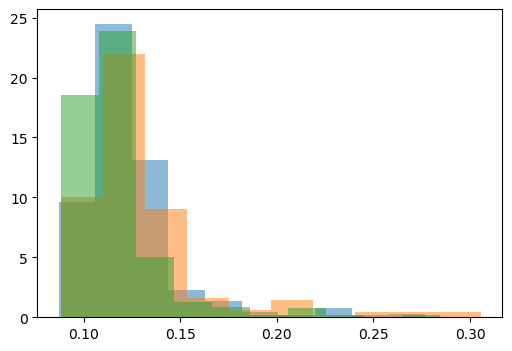

0.2593552684933094
283
0.2764541076224879
177
0.2569022507547098
429


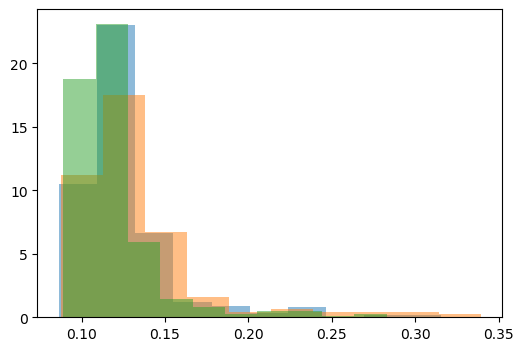

0.26014594162335064
246
0.2843642148403797
152
0.2557916307161347
380


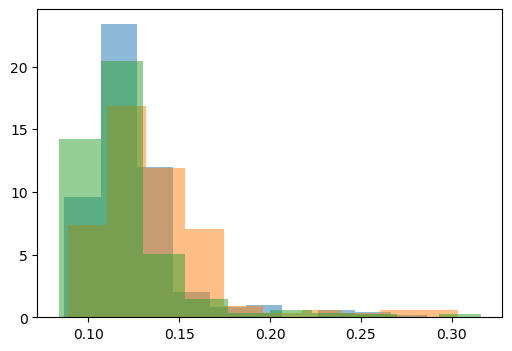

0.2607558359144821
217
0.2823019647102988
131
0.2534981569502376
338


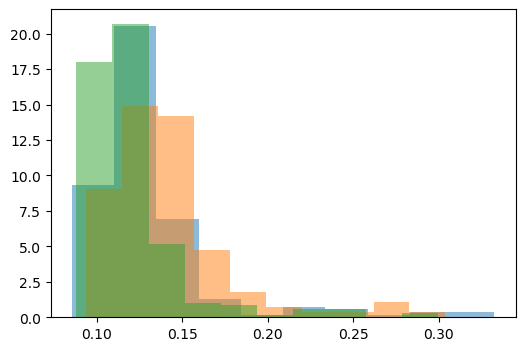

0.2655167314517491
194
0.2729135618479879
110
0.2517234827923133
302


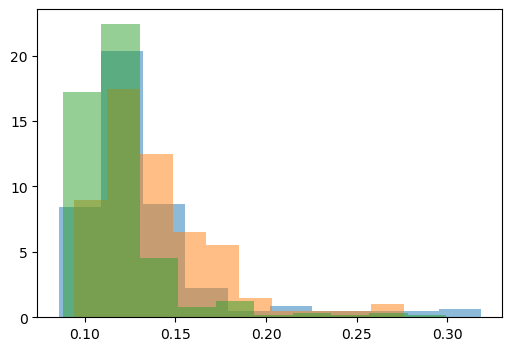

0.2603065282762634
169
0.2790740139587729
101
0.2555526176626125
279


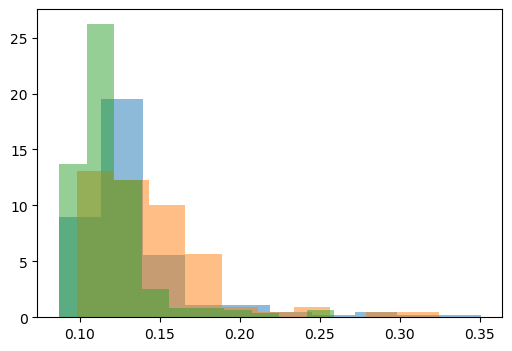

0.25914042277825716
152
0.28150333273284156
91
0.25068032786885214
250


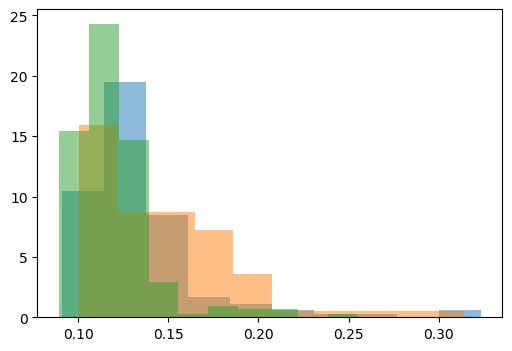

0.2615284821323268
139
0.2841941536638356
83
0.24930795225769362
228


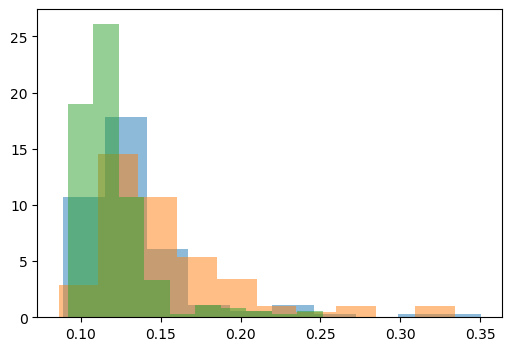

0.25213049700754636
126
0.2909836065573771
76
0.24571445460277452
208


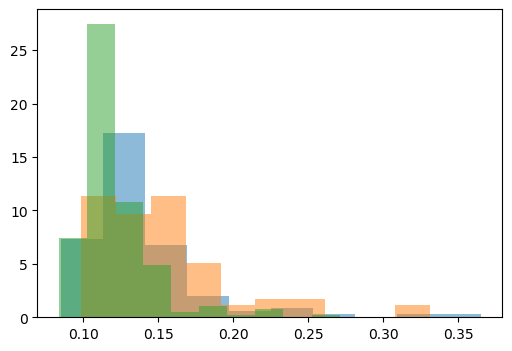

0.2445778325837806
113
0.2988103369763203
72
0.25060331197470254
197


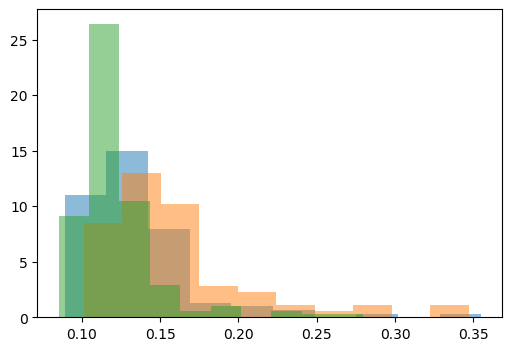

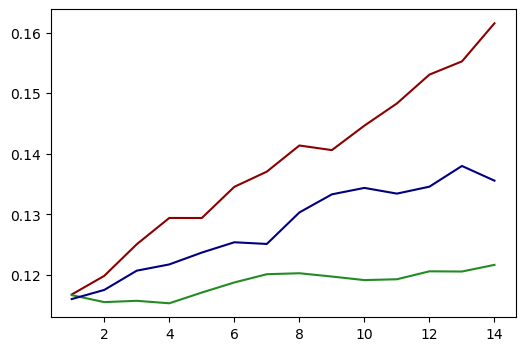

In [152]:
both_e = []
read_e = []
mrna_e = []
for limite in range(1, 15):
    output = best_friends(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both_e.append(output[0])
    read_e.append(output[1])
    mrna_e.append(output[2])
    
    
plt.plot(range(1, 15), read_e, color = 'darkred')
plt.plot(range(1, 15), mrna_e, color = 'forestgreen')
plt.plot(range(1, 15), both_e, color = 'navy')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (14,)

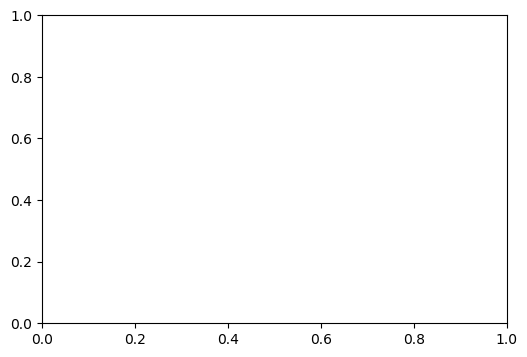

In [153]:
# both = []
# read = []
# mrna = []
# for limite in range(1, 11):
#     output = best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
#                  method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
#                  quant=0.9, top_friends=5)
#     both.append(output[0])
#     read.append(output[1])
#     mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred')
plt.plot(range(1, 11), mrna, color = 'forestgreen')
plt.plot(range(1, 11), both, color = 'navy')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred')
plt.plot(range(1, 11), mrna, color = 'forestgreen')
plt.plot(range(1, 11), both, color = 'navy')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred')
plt.plot(range(1, 11), mrna, color = 'forestgreen')
plt.plot(range(1, 11), both, color = 'navy')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred')
plt.plot(range(1, 11), mrna, color = 'forestgreen')
plt.plot(range(1, 11), both, color = 'navy')
plt.show()

In [ ]:
# both = []
# read = []
# mrna = []
# for limite in range(1, 11):
#     output = best_friends(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
#                  method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
#                  quant=0.9, top_friends=5)
#     both.append(output[0])
#     read.append(output[1])
#     mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, Motor neurons in Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, mES2i in Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('quantile best friends, Motor neurons in Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('cell best friends, Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('quantile best friends, Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('quantile best friends, mES2i in Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('cell best friends, MN in Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('cell best friends, mES2i in Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, song dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, cells in song dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(song_PSI, song_iPSC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, iPSC in song dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(song_PSI, song_MN, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, MN in song dataset')
plt.show()

In [ ]:
def mean_confidence_interval(data):
    m = np.median(data)
    #md = np.median(data)
    s = np.std(data)
    ci_up = np.min([m+(1.645*s), 1])
    ci_dn = np.max([m-(1.645*s), 0])
    
    return m, ci_up, ci_dn

In [ ]:
from scipy.special import logit
from scipy.special import expit

In [ ]:
chen_good_cells = chen_coverage_tab.loc[chen_coverage_tab['SJ_coverage'] >= chen_coverage_tab['SJ_coverage'].quantile(0.1)].index


In [ ]:
def get_curves_dataset(PSI_tab, subpop, mrna_counts, mrna_per_event, read_counts, 
                       coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5):
    
    int_ = PSI_tab[subpop].loc[np.abs(0.5 - PSI_tab[subpop].mean(axis=1)) <= (0.5-psi_min)]
    PSI_int = int_.loc[int_.isna().mean(axis=1) <= (1-cell_min)]

    curva_list = []
    for exon in PSI_int.index:

        curva = []
        for i in np.arange(0, 0.51, 0.01):
            curva.append(((PSI_int.loc[exon].dropna() <= (0+i)) | (PSI_int.loc[exon].dropna() >= (1-i))).mean())

        curva_list.append(curva)
#         print(exon)

    filtered_all = process_subpop(subpop, PSI_tab, mrna_counts, 
                                        mrna_per_event, read_counts, coverage_tab['SJ_coverage'], 
                                       psi_min, mrna_min, reads_min = reads_min)

    curva_list_filt = []
    curva_list_unfilt = []
    for exon in filtered_all[0].index:

        curva = []
        for i in np.arange(0, 0.51, 0.01):
            curva.append(((filtered_all[0].loc[exon].dropna() <= (0+i)) | (filtered_all[0].loc[exon].dropna() >= (1-i))).mean())

        curva_list_filt.append(curva)
        
        
        curva = []
        for i in np.arange(0, 0.51, 0.01):
            curva.append(((PSI_int.loc[exon].dropna() <= (0+i)) | (PSI_int.loc[exon].dropna() >= (1-i))).mean())

        curva_list_unfilt.append(curva)
#         print(exon)
        
    return curva_list, curva_list_filt, curva_list_unfilt

def plot_bimodality_curves(curva_list, curva_list_filt):


    for curva in curva_list:
        plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(curva), c='darkred', alpha=0.02)

    for curva in curva_list_filt:
        plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(curva), c='navy', alpha=0.02)

    mean_list = []
    ci_up_list = []
    ci_dn_list = []

    mean_list_filt = []
    ci_up_list_filt = []
    ci_dn_list_filt = []

    for i in range(len(curva_list[0])):
        m_list = mean_confidence_interval([x[i] for x in curva_list])
        m_list_filt = mean_confidence_interval([x[i] for x in curva_list_filt])

        mean_list.append(m_list[0])
        ci_up_list.append(m_list[1])
        ci_dn_list.append(m_list[2])

        mean_list_filt.append(m_list_filt[0])
        ci_up_list_filt.append(m_list_filt[1])
        ci_dn_list_filt.append(m_list_filt[2])

    plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(mean_list), c='darkred', linewidth=3) 
    plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(mean_list_filt), c='navy', linewidth=3) 

    plt.fill_between([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(ci_dn_list), [0]+list(ci_up_list),
                     color='darkred', alpha=0.1, linewidth=0.0)

    plt.fill_between([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(ci_dn_list_filt), [0]+list(ci_up_list_filt),
                     color='navy', alpha=0.1, linewidth=0.0)

    plt.show()

In [ ]:
def plot_bimodality_curves(curva_set, color_list, nameset, linestyles, linestyles2, 
                           alpha_list, title, plot_individual_events = False):

    for i in range(len(curva_set)):
        name = nameset[i]
        lsty = linestyles[i]
        lsty_2 = linestyles2[i]
        curva_list = curva_set[i]
        col = color_list[i]
        alph = alpha_list[i]

#         if plot_individual_events and (i!= 0):
        for curva in curva_list:
            plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(curva), c=col, alpha=alph, linestyle=lsty_2)

        mean_list = []
        ci_up_list = []
        ci_dn_list = []

        for i in range(len(curva_list[0])):
            m_list = mean_confidence_interval([x[i] for x in curva_list])

            mean_list.append(m_list[0])
            ci_up_list.append(m_list[1])
            ci_dn_list.append(m_list[2])

        plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(mean_list), c=col, linewidth=3, linestyle = lsty) 

#         plt.fill_between([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(ci_dn_list), [0]+list(ci_up_list),
#                          color=col, alpha=0.1, linewidth=0.0)

    plt.title(title)
    plt.xlabel('$\Psi$ cutoff')
    plt.ylabel('proportion of cells below cutoff')
#     plt.legend(('-', '-', '-'), ('label1', 'label2', 'label3'), loc='lower right', frameon=False)


    colors = color_list
    lines = [Line2D([0], [0], color=c, linewidth=3, linestyle=linestyles2[0]) for c in colors]
    labels = nameset
    plt.legend(lines, labels, loc='lower right', frameon=False)

    
    plt.show()

In [ ]:
chen_curva_list_ES2i, chen_curva_list_filt_ES2i, chen_curva_list_unfilt_ES2i = get_curves_dataset(chen_PSI, chen_ES2i, 
                                                                                                  chen_mrna_counts, 
                                                           mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)

# chen_curva_list_ES, chen_curva_list_filt_ES = get_curves_dataset(chen_PSI, chen_ES, chen_mrna_counts, 
#                                                            mrna_per_event_chen, chen_read_counts, 
#                        chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)

# chen_curva_list_Epi, chen_curva_list_filt_Epi = get_curves_dataset(chen_PSI, chen_Epi, chen_mrna_counts, 
#                                                            mrna_per_event_chen, chen_read_counts, 
#                        chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)

# chen_curva_list_MN, chen_curva_list_filt_MN = get_curves_dataset(chen_PSI, chen_MN, chen_mrna_counts, 
#                                                            mrna_per_event_chen, chen_read_counts, 
#                        chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)

# plot_bimodality_curves([chen_curva_list_filt_ES2i, chen_curva_list_filt_ES, chen_curva_list_filt_Epi, chen_curva_list_filt_MN], 
#                        ['darkred', 'darkorange', 'forestgreen', 'navy'],
#                       ['ES2i', 'ES', 'Epi', 'MN'], ['-', '-', '-', '-'], ['-', '-', '-', '-'], [0.1, 0.1, 0.1, 0.1],
#                       title='Chen dataset')

In [ ]:
song_curva_list_iPSC, song_curva_list_filt_iPSC, song_curva_list_unfilt_iPSC = get_curves_dataset(song_PSI, song_iPSC, 
                                                                                                  song_mrna_counts, 
                                                           mrna_per_event_song, song_read_counts, 
                       song_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

# song_curva_list_NPC, song_curva_list_filt_NPC = get_curves_dataset(song_PSI, song_NPC, song_mrna_counts, 
#                                                            mrna_per_event_song, song_read_counts, 
#                        song_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

# song_curva_list_MN, song_curva_list_filt_MN = get_curves_dataset(song_PSI, song_MN, song_mrna_counts, 
#                                                            mrna_per_event_song, song_read_counts, 
#                        song_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

# plot_bimodality_curves([song_curva_list_filt_iPSC, song_curva_list_filt_NPC, song_curva_list_filt_MN], 
#                        ['darkred', 'forestgreen', 'navy'])

In [ ]:
plot_bimodality_curves([curva_list_iPSC, curva_list_NPC, curva_list_MN, 
                        curva_list_filt_iPSC, curva_list_filt_NPC, curva_list_filt_MN], 
                       ['darkred', 'forestgreen', 'navy'] + ['darkred', 'forestgreen', 'navy'],
                      ['iPSC', 'NPC', 'MN', 'iPSC filt', 'NPC filt', 'MN filt'], linestyles=['--', '--', '--', '-', '-', '-'],
                      title='Song dataset')

In [ ]:
plot_bimodality_curves([curva_list_iPSC, curva_list_filt_iPSC], ['darkred', 'navy'], ['unfiltered', 'filtered'], ['', ''], 
                       ['-', '-'], [0.05, 0.2], 'Song iPSC',
                      plot_individual_events=True)

In [ ]:
plot_bimodality_curves([song_curva_list_unfilt_iPSC, song_curva_list_filt_iPSC], ['darkred', 'navy'], 
                       ['unfiltered', 'filtered'], 
                       ['', ''], 
                       ['-', '-'], [0.05, 0.2], 'Song iPSC',
                      plot_individual_events=True)

In [ ]:
plot_bimodality_curves([curva_list_MN, curva_list_filt_MN], ['darkred', 'navy'], ['unfiltered', 'filtered'], ['', ''], 
                       ['-', '-'], [0.05, 0.3], 'Song MN',
                      plot_individual_events=True)

In [ ]:
plot_bimodality_curves([curva_list_NPC, curva_list_filt_NPC], ['darkred', 'navy'], ['unfiltered', 'filtered'], ['', ''], 
                       ['-', '-'], [0.05, 0.3], 'Song NPC',
                      plot_individual_events=True)

In [ ]:
plot_bimodality_curves([chen_curva_list_ES2i, chen_curva_list_filt_ES2i], ['darkred', 'navy'], ['unfiltered', 'filtered'], 
                       ['', ''], ['-', '-'], [0.05, 0.3], 'Chen ES2i',
                      plot_individual_events=True)

In [ ]:
plot_bimodality_curves([curva_list_iPSC, curva_list_filt_iPSC], ['darkred', 'navy'], ['unfiltered', 'filtered'], ['--', ''], 
                       ['', '-'], [0.05, 0.2], 'Song iPSC',
                      plot_individual_events=True)

In [ ]:
plot_bimodality_curves([curva_list_MN, curva_list_filt_MN], ['darkred', 'navy'])

In [ ]:
# curva_list, curva_list_filt = get_curves_dataset(chen_PSI, chen_PSI.columns, chen_mrna_counts, 
#                                                  mrna_per_event_chen, chen_read_counts, 
#                        chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

# plot_bimodality_curves(curva_list, curva_list_filt)

In [ ]:
from sklearn.metrics import auc

In [ ]:
def compare_auc(curva_list, curva_list_2, names=['list1', 'list2'], plot=False):
    auc_list = []
    for i in range(len(curva_list)):
        auc_list.append(auc(list(np.arange(0, 0.51, 0.01)), curva_list[i]))

    auc_list_2 = []
    for i in range(len(curva_list_2)):
        auc_list_2.append(auc(list(np.arange(0, 0.51, 0.01)), curva_list_2[i]))
        
    if plot:
        plt.hist(auc_list, density=True, alpha=0.5, label=names[0])
        plt.hist(auc_list_2, density=True, alpha=0.5, label=names[1])
        plt.xlabel('AUC')
        plt.ylabel('')
        plt.legend()
        plt.show()
        
    return mannwhitneyu(auc_list, auc_list_2)

In [ ]:
plt.hist(auc_list, density=True, alpha=0.5)
plt.hist(auc_list_filt, density=True, alpha=0.5)
plt.show()

In [ ]:
from scipy.stats import kstest
from scipy.stats import ksone
from scipy.stats import f_oneway
from scipy.stats.mstats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import ranksums

In [ ]:
ksone(auc_list, auc_list_filt)

In [ ]:
f_oneway(auc_list, auc_list_filt)

In [ ]:
mannwhitneyu(auc_list, auc_list_filt)

In [ ]:
ranksums(auc_list, auc_list_filt)

In [ ]:
compare_auc(chen_curva_list_filt_MN, chen_curva_list_MN, plot=True)

In [ ]:
compare_auc(chen_curva_list_filt_ES2i, chen_curva_list_ES2i, plot=True)

In [ ]:
auc_list = []
for i in range(len(chen_curva_list_filt_ES2i)):
    auc_list.append(auc(list(np.arange(0, 0.51, 0.01)), chen_curva_list_filt_ES2i[i]))
    
auc_list_filt = []
for i in range(len(chen_curva_list_filt_ES)):
    auc_list_filt.append(auc(list(np.arange(0, 0.51, 0.01)), chen_curva_list_filt_ES[i]))
    
    

In [ ]:
from scipy.stats import probplot

In [ ]:
plt.scatter(probplot(auc_list)[0][0], probplot(auc_list)[0][1])
plt.scatter(probplot(auc_list_filt)[0][0], probplot(auc_list_filt)[0][1])
plt.show()

In [ ]:
plt.scatter(probplot(auc_list_filt)[0][0], probplot(auc_list_filt)[0][1])
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


cluster1 = KMeans(5)
# cluster2 = KMeans(len(dataset2.cell_types))

# def computeARI(latent1, latent, cluster1, cluster2, batch_indices):
#     c11 = cluster1.fit_predict(latent1)
#     c12 = cluster1.fit_predict(latent[batch_indices == 0])
#     c21 = cluster2.fit_predict(latent2)
#     c22 = cluster2.fit_predict(latent[batch_indices == 1])
#     return (adjusted_rand_score(c11, c12), adjusted_rand_score(c21, c22))

In [ ]:
# from sklearn.decomposition import PCA
# latent = PCA(n_components=10).fit_transform(chen_mrna_counts.T)

In [ ]:
# plt.scatter(latent.T[0], latent.T[1])
# plt.show()

In [ ]:
c11 = cluster1.fit_predict(chen_pca[['PC1', 'PC2']])
c12 = cluster1.fit_predict(chen_pca[['PC1', 'PC2']])

In [ ]:
[int(x in chen_clusters[4]) for x in chen_PSI.columns]

In [ ]:
adjusted_rand_score([1 if x == 'Motor neuron' else 0 for x in chen_pca_clust.cell_type], 
                    [int(x) for x in chen_PSI.loc['Clta_4'] >= 0.5])

In [ ]:
from scipy.stats import chisquare

In [ ]:
chisquare([10, 0, 1, 0, 30, 16], [10, 22, 10, 9, 25, 1])

In [ ]:
def test_exon_chi(PSI_tab, exon, clusters, psi_lim = 0.5):
    chi_pos = []
    chi_neg = []
    for clust in clusters.unique():
        cluster_cells = clusters.loc[clusters == clust].index
        
        pos_cases = (PSI_tab.loc[exon, cluster_cells] >= psi_lim).sum()
        missing = PSI_tab.loc[exon, cluster_cells].isna().sum()
        neg_cases = len(cluster_cells) - pos_cases - missing
        
        chi_pos.append(pos_cases)
        chi_neg.append(neg_cases)
        
    return chisquare(chi_pos, chi_neg)

In [ ]:
test_exon_chi(chen_filtered_all)
chen_pca_clust.loc[chen_pca_clust.cell_type == 'Motor neuron'].index

In [ ]:
chen_filter = process_subpop(chen_PSI.columns, chen_PSI, chen_mrna_counts, mrna_per_event_chen, 
                                 chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.05, 10, 0, cell_min=0.1)

In [ ]:
test_exon_chi(aver[0], 'Rpn2_1', chen_pca_clust.cell_type, psi_lim = 0.5)

In [ ]:
test_exon_chi(aver[0], 'Mff_3', chen_pca_clust.cell_type, psi_lim = 0.5)

In [ ]:
test_exon_chi(chen_filter[0], 'Cadm1_2', chen_pca_clust.AC, psi_lim = 0.5)

In [ ]:
aver[0].loc['Mff_3']

In [ ]:
# TO DO: run human metaclass in sc exons
# Get NTW table

In [ ]:
pearsonr([0, 1]*8, [0, 3]*8)

In [ ]:
chen_pca